### GPU 연결 체크

In [14]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17102472295114241774
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1728525108
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11050403737880896185
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
]


# **1. 이미지 유사도**

In [1]:
import os
import numpy as np
from PIL import Image
import shutil

# 이미지 변환해서 캐시값을 저장(csv 파일로)
def average_hash(fname, cache_dirs, size=192):
    cache_dir = cache_dirs
    fname2 = fname[len(search_dir):]
    # 이미지 캐시하기
    cache_file = cache_dir + "/" + fname2.replace('/', '_') + ".csv"
    if not os.path.exists(cache_file):  # 해시 생성하기
        img = Image.open(fname)
        img = img.convert("L").resize((size, size), Image.ANTIALIAS)
        pixels = np.array(img.getdata()).reshape((size, size))
        avg = pixels.mean()
        px = 1 * (pixels > avg)
        np.savetxt(cache_file, px, fmt="%.0f", delimiter=",")
        print(f"Saved cache file: {cache_file}")
    else:  # 캐시돼 있다면 읽지 않기
        px = np.loadtxt(cache_file, delimiter=",")
        print(f"Loaded cache file: {cache_file}")
    return px

alternativePath = "C:/jupyter/capston/bald/data/sebum" # 기존 search_dir, cache_dir, output_dir에서 맨 뒤에 경로만 합쳐주면 됨
categories = ['mild', 'moderate']
cache_categories = ['cache_mild', 'cache_moderate']
refine_categories = ['refine_mild', 'refine_moderate']


# 반복1: mild, 반복2: moderate 
def main():
    for i in range(2):
        global search_dir, cache_dir, output_dir
        search_dir = alternativePath + "/" + categories[i]
        cache_dir = alternativePath + "/" + cache_categories[i]
        output_dir = alternativePath + "/" + refine_categories[i]
        if not os.path.exists(cache_dir):
            os.mkdir(cache_dir)
        if not os.path.exists(output_dir):
            os.mkdir(output_dir)

        # 이미지 평균값 계산하기
        cache_files = os.listdir(cache_dir)
        average_values = []
        for cache_file in cache_files:
            px = np.loadtxt(cache_dir + "/" + cache_file, delimiter=",")
            average_value = np.mean(px)
            average_values.append(average_value)

        # 평균값 출력하기
        average = np.mean(average_values)
        print(f"The average value is: {average}")
        
        print("경로: " + search_dir)
        print(categories[i] + " 실행")
        # 평균값에 가까운 이미지 686장을 refine_moderate 폴더에 저장하기
        image_files = os.listdir(search_dir)
        image_distances = []
        for image_file in image_files:
            image_path = search_dir + "/" + image_file
            px = average_hash(image_path, cache_dir)
            distance = np.mean(np.abs(px - average))
            image_distances.append((image_file, distance))

        # 거리가 작은 순으로 이미지 정렬하기
        image_distances.sort(key=lambda x: x[1])

        # 상위 1500개 이미지를 refine_moderate 폴더에 저장하기
        for i in range(1500):
            image_file = image_distances[i][0]
            source_path = search_dir + "/" + image_file
            destination_path = output_dir + "/" + image_file
            shutil.copyfile(source_path, destination_path)
            print(f"Copied image: {image_file} to {destination_path}")

# 메인 프로그램 실행
# main() 함수를 실행하고 그 안에 있는 glob_files()함수를 통해 양호 경증 중증도 중증 순으로 함수를 다시 호출한다
# glob_files()함수를 통해 x, y배열에 데이터를 다 집어넣고
# np.savez를 통해 .npz형식의 데이터 배열 파일을 저장하게 된다.
if __name__ == '__main__':
    main()

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\USER\AppData\Local\Temp\ipykernel_2100\2769158067.py:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.convert("L").resize((size, size), Image.ANTIALIAS)


The average value is: nan
경로: C:/jupyter/capston/bald/data/sebum/mild
mild 실행
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0013_A2LEBJJDE00060O_1602578303771_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0013_A2LEBJJDE00060O_1602911366731_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0013_A2LEBJJDE00060O_1602911366731_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0013_A2LEBJJDE00060O_1602911366731_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0013_A2LEBJJDE00060O_1603096790519_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0013_A2LEBJJDE00060O_1603096790519_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0013_A2LEBJJDE00060O_1603096790519_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0013_A2LEBJJDE00060O_1603096790519_6_BH.jpg.csv
Saved cache file: 

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0013_A2LEBJJDE00060O_1605534203575_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0013_A2LEBJJDE00060O_1605534218448_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0013_A2LEBJJDE00060O_1605585800852_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0013_A2LEBJJDE00060O_1605585800852_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0013_A2LEBJJDE00060O_1605856090780_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0013_A2LEBJJDE00060O_1605856090780_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0013_A2LEBJJDE00060O_1605943787774_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0013_A2LEBJJDE00060O_1605943787774_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0013_A2LEBJJDE00060O_1605949144

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0131_A2LEBJJDE00166C_1604637311267_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0131_A2LEBJJDE00166C_1604637311267_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0131_A2LEBJJDE00166C_1604637311267_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0131_A2LEBJJDE00166C_1604637325791_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0131_A2LEBJJDE00166C_1604637325791_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0131_A2LEBJJDE00166C_1604637340699_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0131_A2LEBJJDE00166C_1604637340699_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0131_A2LEBJJDE00166C_1604637340699_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0131_A2LEBJJDE00166C_1604637455

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0131_A2LEBJJDE00166C_1604648614396_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0131_A2LEBJJDE00166C_1604648614396_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0131_A2LEBJJDE00166C_1604648614396_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0131_A2LEBJJDE00166C_1604648809811_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0131_A2LEBJJDE00166C_1604649156570_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0131_A2LEBJJDE00166C_1604649156570_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0131_A2LEBJJDE00166C_1604649156570_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0131_A2LEBJJDE00166C_1604649156570_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0131_A2LEBJJDE00166C_1604649156

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0177_A2LEBJJDE00152B_1604650559950_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0177_A2LEBJJDE00152B_1604650559950_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0177_A2LEBJJDE00152B_1604650559950_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0177_A2LEBJJDE00152B_1604650559950_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0177_A2LEBJJDE00152B_1604650579644_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0335_A2LEBJJDE00013X_1602901783871_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0335_A2LEBJJDE00013X_1602901783871_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0335_A2LEBJJDE00013X_1602906877353_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0335_A2LEBJJDE00013X_1602906877

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0335_A2LEBJJDE000542_1603671423939_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0335_A2LEBJJDE000542_1603851559528_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0335_A2LEBJJDE000542_1603851559528_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0335_A2LEBJJDE000542_1603851559528_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0335_A2LEBJJDE000542_1603851559528_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0335_A2LEBJJDE000542_1603851803334_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0335_A2LEBJJDE000542_1603851803334_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0335_A2LEBJJDE000542_1603851803334_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0335_A2LEBJJDE000542_1603852016

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0335_A2LEBJJDE000542_1605230844111_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0335_A2LEBJJDE000542_1605230844111_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0335_A2LEBJJDE000542_1605230844111_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0335_A2LEBJJDE000542_1605491334794_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0335_A2LEBJJDE000542_1605491334794_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0335_A2LEBJJDE000542_1605491821320_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0335_A2LEBJJDE000542_1605491821320_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0335_A2LEBJJDE000542_1605492171674_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0335_A2LEBJJDE000542_1605591987

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0425_A2LEBJJDE00079P_1605793753291_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0425_A2LEBJJDE00079P_1605793764595_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0425_A2LEBJJDE00079P_1605793764595_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0425_A2LEBJJDE00079P_1605793764595_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0425_A2LEBJJDE00079P_1605793764595_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0425_A2LEBJJDE00079P_1605793774361_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0425_A2LEBJJDE00079P_1605793774361_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0425_A2LEBJJDE00079P_1605793810983_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0425_A2LEBJJDE00079P_1605793838

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0556_A2LEBJJDE00041T_1603516325241_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0556_A2LEBJJDE00041T_1603520374384_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0556_A2LEBJJDE00041T_1603520374384_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0556_A2LEBJJDE00041T_1603520839287_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0556_A2LEBJJDE00041T_1603527736720_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0556_A2LEBJJDE00041T_1603527736720_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0556_A2LEBJJDE00041T_1603534168161_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0556_A2LEBJJDE00041T_1603534168161_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0556_A2LEBJJDE00041T_1603538975

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0556_A2LEBJJDE00041T_1604045737388_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0556_A2LEBJJDE00041T_1604045737388_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0556_A2LEBJJDE00041T_1604045737388_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0556_A2LEBJJDE00041T_1604045737388_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0556_A2LEBJJDE00041T_1604045737388_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0556_A2LEBJJDE00041T_1604053019280_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0556_A2LEBJJDE00041T_1604053019280_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0556_A2LEBJJDE00041T_1604053019280_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0556_A2LEBJJDE00041T_1604053019

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0616_A2LEBJJDE00004W_1605241712829_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0616_A2LEBJJDE00004W_1605316669018_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0616_A2LEBJJDE00004W_1605316669018_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0616_A2LEBJJDE00004W_1605316669018_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0616_A2LEBJJDE00004W_1605319725759_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0616_A2LEBJJDE00004W_1605319725759_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0616_A2LEBJJDE00004W_1605329456841_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0616_A2LEBJJDE00004W_1605330391255_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0616_A2LEBJJDE00004W_1605330391

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0616_A2LEBJJDE00004W_1606017765112_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0616_A2LEBJJDE00004W_1606017829249_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0616_A2LEBJJDE00004W_1606017858802_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0616_A2LEBJJDE00004W_1606019627220_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0616_A2LEBJJDE00004W_1606019627220_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0616_A2LEBJJDE00004W_1606019627220_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0616_A2LEBJJDE00004W_1606021741936_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0616_A2LEBJJDE00004W_1606021741936_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0616_A2LEBJJDE00004W_1606022361

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0617_A2LEBJJDE000815_1604286766378_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0617_A2LEBJJDE000815_1604286793473_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0617_A2LEBJJDE000815_1604286793473_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0617_A2LEBJJDE000815_1604286793473_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0617_A2LEBJJDE000815_1604286833871_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0617_A2LEBJJDE000815_1604286833871_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0617_A2LEBJJDE000815_1604286845865_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0617_A2LEBJJDE000815_1604286861981_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0617_A2LEBJJDE000815_1604286873

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0643_A2LEBJJDE00048F_1602565015486_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0643_A2LEBJJDE00048F_1602565015486_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0643_A2LEBJJDE00048F_1602565015486_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0643_A2LEBJJDE00048F_1602565491635_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0643_A2LEBJJDE00048F_1602565491635_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0643_A2LEBJJDE00048F_1602565491635_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0643_A2LEBJJDE00048F_1602638452025_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0643_A2LEBJJDE00048F_1602638452025_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0643_A2LEBJJDE00048F_1602638764

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0663_A2LEBJJDE001716_1604798793191_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0663_A2LEBJJDE001716_1604799869623_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0663_A2LEBJJDE001716_1604799869623_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0663_A2LEBJJDE001716_1604815150891_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0663_A2LEBJJDE001716_1604815150891_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0663_A2LEBJJDE001716_1604815150891_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0663_A2LEBJJDE001716_1604905451193_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0663_A2LEBJJDE001716_1604905451193_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0663_A2LEBJJDE001716_1604905451

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0703_A2LEBJJDE000774_1603358807350_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0703_A2LEBJJDE000774_1603358923587_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0703_A2LEBJJDE000774_1603359095003_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0703_A2LEBJJDE000774_1603359095003_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0703_A2LEBJJDE000774_1603361150291_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0703_A2LEBJJDE000774_1603517529730_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0703_A2LEBJJDE000774_1603517798049_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0703_A2LEBJJDE000774_1603517798049_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0703_A2LEBJJDE000774_1603674775

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0703_A2LEBJJDE000774_1605683522272_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0703_A2LEBJJDE000774_1605683522272_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0703_A2LEBJJDE000774_1605684185968_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0703_A2LEBJJDE000774_1605859610980_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0703_A2LEBJJDE000774_1605859610980_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0703_A2LEBJJDE000774_1605867985627_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0703_A2LEBJJDE000774_1605920753107_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0703_A2LEBJJDE000774_1605921022829_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0703_A2LEBJJDE000774_1605922532

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0733_A2LEBJJDE000084_1602482562979_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0733_A2LEBJJDE000084_1602482562979_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0733_A2LEBJJDE000084_1602494011214_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0733_A2LEBJJDE000084_1602495065420_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0733_A2LEBJJDE000084_1602567464603_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0733_A2LEBJJDE000084_1602582345722_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0733_A2LEBJJDE000084_1602644647837_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0733_A2LEBJJDE000084_1602644647837_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0733_A2LEBJJDE000084_1602644647

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0733_A2LEBJJDE000084_1603186424072_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0733_A2LEBJJDE000084_1603186424072_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0733_A2LEBJJDE000084_1603244866141_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0733_A2LEBJJDE000084_1603256502252_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0733_A2LEBJJDE000084_1603260271876_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0733_A2LEBJJDE000084_1603261054300_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0733_A2LEBJJDE000084_1603265427369_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0733_A2LEBJJDE000084_1603265427369_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0733_A2LEBJJDE000084_1603267751

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0733_A2LEBJJDE000084_1605862215607_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0733_A2LEBJJDE000084_1605862215607_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0733_A2LEBJJDE000084_1605863336095_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0733_A2LEBJJDE000084_1605863710272_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0733_A2LEBJJDE000084_1606100554112_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0733_A2LEBJJDE000084_1606100554112_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0733_A2LEBJJDE000084_1606100554112_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0733_A2LEBJJDE000084_1606100554112_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0733_A2LEBJJDE000084_1606100554

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0770_A2LEBJJDE000865_1602998603661_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0770_A2LEBJJDE000865_1602998603661_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0770_A2LEBJJDE000865_1602999206854_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0770_A2LEBJJDE000865_1602999206854_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0770_A2LEBJJDE000865_1602999780423_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0770_A2LEBJJDE000865_1602999780423_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0770_A2LEBJJDE000865_1603001211505_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0770_A2LEBJJDE000865_1603001211505_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0770_A2LEBJJDE000865_1603001211

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0770_A2LEBJJDE000865_1603882786965_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0770_A2LEBJJDE000865_1603882786965_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0770_A2LEBJJDE000865_1603882786965_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0770_A2LEBJJDE000865_1603940688983_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0770_A2LEBJJDE000865_1603944827877_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0770_A2LEBJJDE000865_1603944827877_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0770_A2LEBJJDE000865_1603957082550_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0770_A2LEBJJDE000865_1603957082550_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0770_A2LEBJJDE000865_1603957082

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0844_A2LEBJJDE00067A_1602914437758_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0844_A2LEBJJDE00067A_1602914478398_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0844_A2LEBJJDE00067A_1602914478398_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0844_A2LEBJJDE00067A_1602914494381_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0844_A2LEBJJDE00067A_1602914502937_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0844_A2LEBJJDE00067A_1602914502937_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0844_A2LEBJJDE00067A_1602914536718_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0844_A2LEBJJDE00067A_1602914536718_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0844_A2LEBJJDE00067A_1602914536

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0844_A2LEBJJDE00067A_1604474701756_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0844_A2LEBJJDE00067A_1604474701756_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0844_A2LEBJJDE00067A_1604624888259_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0844_A2LEBJJDE00067A_1604624888259_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0844_A2LEBJJDE00067A_1604713260316_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0844_A2LEBJJDE00067A_1604723405323_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0844_A2LEBJJDE00067A_1604723405323_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0844_A2LEBJJDE00067A_1604798960263_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0844_A2LEBJJDE00067A_1604798960

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0888_A2LEBJJDE001948_1603876615935_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0888_A2LEBJJDE001948_1603940046810_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0888_A2LEBJJDE001948_1603940046810_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0888_A2LEBJJDE001948_1603940046810_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0888_A2LEBJJDE001948_1603941477539_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0888_A2LEBJJDE001948_1603955315674_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0888_A2LEBJJDE001948_1603955315674_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0888_A2LEBJJDE001948_1603955315674_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0888_A2LEBJJDE001948_1603958132

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0888_A2LEBJJDE001948_1604299665999_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0888_A2LEBJJDE001948_1604299665999_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0888_A2LEBJJDE001948_1604299665999_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0888_A2LEBJJDE001948_1604302871689_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0888_A2LEBJJDE001948_1604302871689_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0888_A2LEBJJDE001948_1604304564776_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0888_A2LEBJJDE001948_1604306071646_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0888_A2LEBJJDE001948_1604307840676_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0888_A2LEBJJDE001948_1604367937

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0888_A2LEBJJDE001948_1604728151702_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0888_A2LEBJJDE001948_1604740873023_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0888_A2LEBJJDE001948_1604740873023_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0888_A2LEBJJDE001948_1604740873023_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0888_A2LEBJJDE001948_1604749550177_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0888_A2LEBJJDE001948_1604749550177_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0888_A2LEBJJDE001948_1604917557038_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0888_A2LEBJJDE001948_1604917557038_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_0888_A2LEBJJDE001948_1604917557

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1015_A2LEBJJDE000592_1602898209139_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1015_A2LEBJJDE000592_1602900071119_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1015_A2LEBJJDE000592_1602900071119_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1015_A2LEBJJDE000592_1602901183968_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1015_A2LEBJJDE000592_1602905257325_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1015_A2LEBJJDE000592_1602905257325_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1015_A2LEBJJDE000592_1602905257325_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1015_A2LEBJJDE000592_1602905257325_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1015_A2LEBJJDE000592_1602905653

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1015_A2LEBJJDE000592_1603074049531_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1015_A2LEBJJDE000592_1603074049531_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1015_A2LEBJJDE000592_1603074049531_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1015_A2LEBJJDE000592_1603079325810_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1015_A2LEBJJDE000592_1603079325810_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1015_A2LEBJJDE000592_1603081847660_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1015_A2LEBJJDE000592_1603082868334_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1015_A2LEBJJDE000592_1603083882814_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1015_A2LEBJJDE000592_1603084633

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1069_A2LEBJJDE00094D_1603357630749_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1069_A2LEBJJDE00094D_1603357630749_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1069_A2LEBJJDE00094D_1603357630749_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1069_A2LEBJJDE00094D_1603437084187_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1069_A2LEBJJDE00094D_1603535012349_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1069_A2LEBJJDE00094D_1603964329501_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1069_A2LEBJJDE00094D_1603964329501_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1069_A2LEBJJDE00094D_1603964329501_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1069_A2LEBJJDE00094D_1603964329

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1071_A2LEBJJDE00173R_1604931164745_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1071_A2LEBJJDE00173R_1604931182344_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1071_A2LEBJJDE00173R_1604931182344_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1071_A2LEBJJDE00173R_1604931182344_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1071_A2LEBJJDE00173R_1604931194759_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1071_A2LEBJJDE00173R_1604931194759_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1071_A2LEBJJDE00173R_1604931194759_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1071_A2LEBJJDE00173R_1604931206904_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1071_A2LEBJJDE00173R_1604931206

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1071_A2LEBJJDE00173R_1604931801951_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1071_A2LEBJJDE00173R_1604931816438_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1071_A2LEBJJDE00173R_1604931816438_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1071_A2LEBJJDE00173R_1604931816438_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1071_A2LEBJJDE00173R_1604931816438_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1071_A2LEBJJDE00173R_1604931833679_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1071_A2LEBJJDE00173R_1604931833679_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1071_A2LEBJJDE00173R_1604931833679_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1071_A2LEBJJDE00173R_1604931846

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1071_A2LEBJJDE00173R_1606092593174_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1071_A2LEBJJDE00173R_1606092593174_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1071_A2LEBJJDE00173R_1606092613340_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1071_A2LEBJJDE00173R_1606092613340_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1071_A2LEBJJDE00173R_1606092633811_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1071_A2LEBJJDE00173R_1606092633811_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1071_A2LEBJJDE00173R_1606092655129_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1071_A2LEBJJDE00173R_1606092655129_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1071_A2LEBJJDE00173R_1606092655

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1080_A2LEBJJDE00092R_1603792948330_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1080_A2LEBJJDE00092R_1603792948330_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1080_A2LEBJJDE00092R_1604031002417_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1080_A2LEBJJDE00092R_1604031002417_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1080_A2LEBJJDE00092R_1604033379156_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1080_A2LEBJJDE00092R_1604033379156_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1080_A2LEBJJDE00092R_1604033379156_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1080_A2LEBJJDE00092R_1604138398171_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1080_A2LEBJJDE00092R_1604625069

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1080_A2LEBJJDE00092R_1606104643039_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1080_A2LEBJJDE00092R_1606104965819_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1080_A2LEBJJDE00092R_1606117288069_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1080_A2LEBJJDE00092R_1606124019620_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1080_A2LEBJJDE00092R_1606124019620_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1080_A2LEBJJDE00092R_1606124460637_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1080_A2LEBJJDE00092R_1606204387558_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1142_A2LEBJJDE00024K_1602468376543_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1142_A2LEBJJDE00024K_1602473911

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1142_A2LEBJJDE00024K_1604473223146_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1142_A2LEBJJDE00024K_1604474343339_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1142_A2LEBJJDE00024K_1604474343339_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1142_A2LEBJJDE00024K_1604714677725_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1142_A2LEBJJDE00024K_1604714677725_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1142_A2LEBJJDE00024K_1604714677725_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1142_A2LEBJJDE00024K_1604723601951_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1142_A2LEBJJDE00024K_1604723601951_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1142_A2LEBJJDE00024K_1604723601

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1145_A2LEBJJDE00119L_1603961235898_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1145_A2LEBJJDE00119L_1603961235898_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1145_A2LEBJJDE00119L_1604021134179_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1145_A2LEBJJDE00119L_1604021134179_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1145_A2LEBJJDE00119L_1604021493675_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1145_A2LEBJJDE00119L_1604021493675_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1145_A2LEBJJDE00119L_1604021905543_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1145_A2LEBJJDE00119L_1604021905543_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1145_A2LEBJJDE00119L_1604038080

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1145_A2LEBJJDE00119L_1605944087412_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1145_A2LEBJJDE00119L_1605944087412_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1145_A2LEBJJDE00119L_1605944087412_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1145_A2LEBJJDE00119L_1605944087412_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1145_A2LEBJJDE00119L_1605952750123_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1145_A2LEBJJDE00119L_1606021360037_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1145_A2LEBJJDE00119L_1606026287710_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1145_A2LEBJJDE00119L_1606026287710_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1145_A2LEBJJDE00119L_1606042086

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1195_A2LEBJJDE00117Z_1603419071363_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1195_A2LEBJJDE00117Z_1603419101988_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1195_A2LEBJJDE00117Z_1603422170349_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1195_A2LEBJJDE00117Z_1603428867090_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1195_A2LEBJJDE00117Z_1603434780022_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1195_A2LEBJJDE00117Z_1603434780022_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1195_A2LEBJJDE00117Z_1603439925574_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1195_A2LEBJJDE00117Z_1603440576906_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1195_A2LEBJJDE00117Z_1603440821

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1195_A2LEBJJDE00197M_1604469371508_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1195_A2LEBJJDE00197M_1604469371508_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1195_A2LEBJJDE00197M_1604472885148_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1195_A2LEBJJDE00197M_1604472885148_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1195_A2LEBJJDE00197M_1604472885148_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1195_A2LEBJJDE00197M_1604472885148_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1195_A2LEBJJDE00197M_1604476875637_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1195_A2LEBJJDE00197M_1604476875637_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1195_A2LEBJJDE00197M_1604477576

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1195_A2LEBJJDE00197M_1604886721503_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1195_A2LEBJJDE00197M_1604886721503_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1195_A2LEBJJDE00197M_1604888069971_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1195_A2LEBJJDE00197M_1604888069971_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1195_A2LEBJJDE00197M_1604889253168_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1195_A2LEBJJDE00197M_1604893403568_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1195_A2LEBJJDE00197M_1604893403568_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1195_A2LEBJJDE00197M_1604893403568_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1195_A2LEBJJDE00197M_1604893403

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1237_A2LEBJJDE001584_1606113539375_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1237_A2LEBJJDE001584_1606113539375_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1237_A2LEBJJDE001584_1606113644027_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1237_A2LEBJJDE001584_1606113704718_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1237_A2LEBJJDE001584_1606114003891_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1237_A2LEBJJDE001584_1606114033196_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1237_A2LEBJJDE001584_1606114033196_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1237_A2LEBJJDE001584_1606114033196_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1237_A2LEBJJDE001584_1606114033

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1237_A2LEBJJDE001584_1606114970471_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1237_A2LEBJJDE001584_1606114970471_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1237_A2LEBJJDE001584_1606115018982_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1237_A2LEBJJDE001584_1606115030555_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1237_A2LEBJJDE001584_1606115060164_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1237_A2LEBJJDE001584_1606115087047_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1237_A2LEBJJDE001584_1606115087047_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1237_A2LEBJJDE001584_1606115121793_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1237_A2LEBJJDE001584_1606115121

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1407_A2LEBJJDE001258_1602992609398_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1407_A2LEBJJDE001258_1602992609398_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1407_A2LEBJJDE001258_1603009078872_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1407_A2LEBJJDE001258_1603009078872_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1407_A2LEBJJDE001258_1603009078872_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1407_A2LEBJJDE001258_1603009078872_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1407_A2LEBJJDE001258_1603009288435_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1407_A2LEBJJDE001258_1603009288435_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1407_A2LEBJJDE001258_1603014779

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1407_A2LEBJJDE001258_1606119385486_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1407_A2LEBJJDE001258_1606119541930_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1407_A2LEBJJDE001258_1606119688367_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1407_A2LEBJJDE001258_1606120204056_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1407_A2LEBJJDE001258_1606120204056_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1407_A2LEBJJDE001258_1606120204056_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1407_A2LEBJJDE001258_1606120204056_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1407_A2LEBJJDE001258_1606123990286_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1407_A2LEBJJDE001258_1606124006

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1459_A2LEBJJDE00025D_1603537165796_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1459_A2LEBJJDE00025D_1603537165796_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1459_A2LEBJJDE00025D_1603592546016_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1459_A2LEBJJDE00025D_1603602887881_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1459_A2LEBJJDE00025D_1603602887881_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1459_A2LEBJJDE00025D_1603613422450_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1459_A2LEBJJDE00025D_1603697950987_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1459_A2LEBJJDE00025D_1603857142800_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1459_A2LEBJJDE00025D_1603858069

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1459_A2LEBJJDE00025D_1604816264562_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1459_A2LEBJJDE00025D_1604816264562_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1459_A2LEBJJDE00025D_1604834415783_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1459_A2LEBJJDE00025D_1604891742334_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1459_A2LEBJJDE00025D_1604891742334_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1459_A2LEBJJDE00025D_1604919516804_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1459_A2LEBJJDE00025D_1604919516804_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1459_A2LEBJJDE00025D_1604919516804_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1459_A2LEBJJDE00025D_1605068881

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1534_A2LEBJJDE00133G_1603181562495_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1534_A2LEBJJDE00133G_1603181562495_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1534_A2LEBJJDE00133G_1603182243094_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1534_A2LEBJJDE00133G_1603184673861_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1534_A2LEBJJDE00133G_1603184673861_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1534_A2LEBJJDE00133G_1603184673861_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1534_A2LEBJJDE00133G_1603189022367_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1534_A2LEBJJDE00133G_1603189022367_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1534_A2LEBJJDE00133G_1603349450

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1534_A2LEBJJDE00133G_1604723947151_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1534_A2LEBJJDE00133G_1604727737075_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1534_A2LEBJJDE00133G_1604727993260_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1534_A2LEBJJDE00133G_1604727993260_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1534_A2LEBJJDE00133G_1604727993260_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1534_A2LEBJJDE00133G_1604729252007_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1534_A2LEBJJDE00133G_1604729252007_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1534_A2LEBJJDE00133G_1604729252007_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1534_A2LEBJJDE00133G_1604821823

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1631_A2LEBJJDE00163X_1605618754934_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1631_A2LEBJJDE00163X_1605618769228_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1631_A2LEBJJDE00163X_1605618769228_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1631_A2LEBJJDE00163X_1605618782314_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1631_A2LEBJJDE00163X_1605618782314_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1631_A2LEBJJDE00163X_1605618782314_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1631_A2LEBJJDE00163X_1605693250370_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1631_A2LEBJJDE00163X_1605693250370_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1631_A2LEBJJDE00163X_1605693250

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1631_A2LEBJJDE00187S_1604400104668_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1631_A2LEBJJDE00187S_1604400104668_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1631_A2LEBJJDE00187S_1604400104668_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1631_A2LEBJJDE00187S_1604400133436_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1631_A2LEBJJDE00187S_1604400151092_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1631_A2LEBJJDE00187S_1604400151092_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1631_A2LEBJJDE00187S_1604400151092_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1631_A2LEBJJDE00187S_1604400171190_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1631_A2LEBJJDE00187S_1604400171

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1719_A2LEBJJDE00138G_1602749625914_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1719_A2LEBJJDE00138G_1602814642459_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1719_A2LEBJJDE00138G_1602814642459_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1719_A2LEBJJDE00138G_1602828597359_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1719_A2LEBJJDE00138G_1602829541664_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1719_A2LEBJJDE00138G_1602834858585_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1719_A2LEBJJDE00138G_1602837220590_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1719_A2LEBJJDE00138G_1602838544446_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1719_A2LEBJJDE00138G_1602838544

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1719_A2LEBJJDE00138G_1603881212340_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1719_A2LEBJJDE00138G_1603881212340_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1719_A2LEBJJDE00138G_1603881212340_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1719_A2LEBJJDE00138G_1603941745935_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1719_A2LEBJJDE00138G_1603941745935_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1719_A2LEBJJDE00138G_1603955027631_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1719_A2LEBJJDE00138G_1603955027631_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1719_A2LEBJJDE00138G_1603955027631_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1719_A2LEBJJDE00138G_1603956415

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1743_A2LEBJJDE00031Z_1603249070792_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1743_A2LEBJJDE00031Z_1603249070792_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1743_A2LEBJJDE00031Z_1603250915302_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1743_A2LEBJJDE00031Z_1603250915302_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1743_A2LEBJJDE00031Z_1603264049297_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1743_A2LEBJJDE00031Z_1603264049297_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1743_A2LEBJJDE00031Z_1603265687971_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1743_A2LEBJJDE00031Z_1603265687971_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1743_A2LEBJJDE00031Z_1603265687

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1743_A2LEBJJDE00031Z_1604565163035_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1743_A2LEBJJDE00031Z_1604565163035_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1743_A2LEBJJDE00031Z_1604626344050_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1743_A2LEBJJDE00031Z_1604626344050_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1743_A2LEBJJDE00031Z_1604809248340_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1743_A2LEBJJDE00031Z_1604809248340_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1743_A2LEBJJDE00031Z_1605160236842_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1743_A2LEBJJDE00031Z_1605160236842_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1743_A2LEBJJDE00031Z_1605160236

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1798_A2LEBJJDE000539_1602498743723_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1798_A2LEBJJDE000539_1602503949750_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1798_A2LEBJJDE000539_1602558733757_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1798_A2LEBJJDE000539_1602558750923_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1798_A2LEBJJDE000539_1602558774547_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1798_A2LEBJJDE000539_1602558774547_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1798_A2LEBJJDE000539_1602559608460_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1798_A2LEBJJDE000539_1602559608460_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1798_A2LEBJJDE000539_1602565372

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1798_A2LEBJJDE000539_1602916481728_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1798_A2LEBJJDE000539_1602916481728_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1798_A2LEBJJDE000539_1602919125923_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1798_A2LEBJJDE000539_1602920233961_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1798_A2LEBJJDE000539_1602922387462_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1798_A2LEBJJDE000539_1602922387462_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1798_A2LEBJJDE000539_1602922387462_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1798_A2LEBJJDE000539_1602926013848_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1798_A2LEBJJDE000539_1602926013

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1940_A2LEBJJDE000307_1603014126177_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1940_A2LEBJJDE000307_1603014157590_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1940_A2LEBJJDE000307_1603014168639_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1940_A2LEBJJDE000307_1603014168639_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1940_A2LEBJJDE000307_1603014168639_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1940_A2LEBJJDE000307_1603014186991_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1940_A2LEBJJDE000307_1603014186991_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1940_A2LEBJJDE000307_1603103734376_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1940_A2LEBJJDE000307_1603103734

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1940_A2LEBJJDE000307_1604223573941_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1940_A2LEBJJDE000307_1604223573941_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1940_A2LEBJJDE000307_1604223573941_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1940_A2LEBJJDE000307_1604223590946_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1940_A2LEBJJDE000307_1604223590946_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1940_A2LEBJJDE000307_1604223590946_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1940_A2LEBJJDE000307_1604223605119_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1940_A2LEBJJDE000307_1604223605119_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1940_A2LEBJJDE000307_1604223605

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1981_A2LEBJJDE001901_1605232057656_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1981_A2LEBJJDE001901_1605232313547_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1981_A2LEBJJDE001901_1605232313547_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1981_A2LEBJJDE001901_1605232313547_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1981_A2LEBJJDE001901_1605232313547_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1981_A2LEBJJDE001901_1605232591098_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1981_A2LEBJJDE001901_1605232591098_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1981_A2LEBJJDE001901_1605232591098_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1981_A2LEBJJDE001901_1605232591

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1983_A2LEBJJDE00188L_1606102124768_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1983_A2LEBJJDE00188L_1606102124768_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1983_A2LEBJJDE00188L_1606102205643_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1983_A2LEBJJDE00188L_1606102205643_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1983_A2LEBJJDE00188L_1606102220099_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1983_A2LEBJJDE00188L_1606102220099_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1983_A2LEBJJDE00188L_1606102220099_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1983_A2LEBJJDE00188L_1606102248991_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_1983_A2LEBJJDE00188L_1606102248

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2013_A2LEBJJDE00141O_1603074842446_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2013_A2LEBJJDE00141O_1603076901752_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2013_A2LEBJJDE00141O_1603079300666_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2013_A2LEBJJDE00141O_1603079300666_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2013_A2LEBJJDE00141O_1603097625796_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2013_A2LEBJJDE00141O_1603102505748_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2013_A2LEBJJDE00141O_1603103213481_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2013_A2LEBJJDE00141O_1603103798013_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2013_A2LEBJJDE00141O_1603104910

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2013_A2LEBJJDE00141O_1603617128684_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2013_A2LEBJJDE00141O_1603685879664_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2013_A2LEBJJDE00141O_1603712148640_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2013_A2LEBJJDE00141O_1603712148640_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2013_A2LEBJJDE00141O_1603858490541_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2013_A2LEBJJDE00141O_1603858490541_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2013_A2LEBJJDE00141O_1603858490541_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2013_A2LEBJJDE00141O_1603858490541_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2013_A2LEBJJDE00141O_1603858490

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2032_A2LEBJJDE00152B_1604718597624_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2032_A2LEBJJDE00152B_1604731714122_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2032_A2LEBJJDE00152B_1604799200264_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2032_A2LEBJJDE00152B_1604799200264_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2032_A2LEBJJDE00152B_1604814387128_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2032_A2LEBJJDE00152B_1604814387128_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2032_A2LEBJJDE00152B_1604814925779_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2032_A2LEBJJDE00152B_1604814925779_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2032_A2LEBJJDE00152B_1604819396

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2317_A2LEBJJDE00051N_1603961885092_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2317_A2LEBJJDE00051N_1603961885092_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2317_A2LEBJJDE00051N_1603961885092_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2317_A2LEBJJDE00051N_1603966163872_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2317_A2LEBJJDE00051N_1603966163872_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2317_A2LEBJJDE00051N_1604020474269_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2317_A2LEBJJDE00051N_1604020474269_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2317_A2LEBJJDE00051N_1604020474269_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2317_A2LEBJJDE00051N_1604020474

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2317_A2LEBJJDE00051N_1604565120527_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2317_A2LEBJJDE00051N_1604565120527_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2317_A2LEBJJDE00051N_1604567562646_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2317_A2LEBJJDE00051N_1604567562646_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2317_A2LEBJJDE00051N_1604571125864_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2317_A2LEBJJDE00051N_1604571125864_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2317_A2LEBJJDE00051N_1604571125864_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2317_A2LEBJJDE00051N_1604627701085_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2317_A2LEBJJDE00051N_1604627701

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2317_A2LEBJJDE00051N_1604895184519_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2317_A2LEBJJDE00051N_1604896837812_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2317_A2LEBJJDE00051N_1604896837812_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2317_A2LEBJJDE00051N_1604896837812_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2317_A2LEBJJDE00051N_1604896837812_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2317_A2LEBJJDE00051N_1604896837812_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2317_A2LEBJJDE00051N_1604905747998_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2317_A2LEBJJDE00051N_1604905747998_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2317_A2LEBJJDE00051N_1604905747

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00037S_1604625792846_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00037S_1604625792846_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00037S_1604625853927_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00037S_1604625853927_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00037S_1604625876264_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00037S_1604625887537_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00037S_1604626800613_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00037S_1604626800613_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00037S_1604626822

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00037S_1605776666535_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00037S_1605776666535_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00037S_1605859100891_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00037S_1605859100891_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00037S_1605859100891_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00037S_1605859100891_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00037S_1605860814206_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00037S_1605866892845_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00037S_1605866892

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00056N_1602740653556_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00056N_1602747725679_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00056N_1602747725679_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00056N_1602818180245_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00056N_1602818180245_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00056N_1602818180245_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00056N_1602818180245_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00056N_1602824709866_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00056N_1602824977

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00056N_1603851694389_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00056N_1603851694389_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00056N_1603879627669_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00056N_1603879627669_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00056N_1603879627669_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00056N_1603945186382_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00056N_1603945186382_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00056N_1603945186382_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE00056N_1604024337

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE001026_1603084918605_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE001026_1603085509458_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE001026_1603085509458_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE001026_1603085509458_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE001026_1603097648380_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE001026_1603098721763_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE001026_1603157367375_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE001026_1603245435682_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE001026_1603245435

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE001998_1603958158809_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE001998_1604022326273_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE001998_1604022326273_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE001998_1604036389704_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE001998_1604036389704_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE001998_1604036389704_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE001998_1604036389704_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE001998_1604036389704_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE001998_1604038338

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE001998_1604993463218_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE001998_1604993463218_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE001998_1604993463218_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE001998_1605064077162_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE001998_1605076476384_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE001998_1605076476384_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE001998_1605155912574_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE001998_1605155912574_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2326_A2LEBJJDE001998_1605163332

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2327_A2LEBJJDE00091Y_1603604074159_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2327_A2LEBJJDE00091Y_1603604074159_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2327_A2LEBJJDE00091Y_1603604525220_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2327_A2LEBJJDE00091Y_1603604525220_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2327_A2LEBJJDE00091Y_1603604552446_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2327_A2LEBJJDE00091Y_1603604552446_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2327_A2LEBJJDE00091Y_1603604552446_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2327_A2LEBJJDE00091Y_1603605075765_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2327_A2LEBJJDE00091Y_1603605075

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2327_A2LEBJJDE00091Y_1604716013139_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2327_A2LEBJJDE00091Y_1604717952915_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2327_A2LEBJJDE00091Y_1604717952915_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2327_A2LEBJJDE00091Y_1604724126028_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2327_A2LEBJJDE00091Y_1604724126028_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2327_A2LEBJJDE00091Y_1604726671642_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2327_A2LEBJJDE00091Y_1604726671642_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2327_A2LEBJJDE00091Y_1604728800821_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2327_A2LEBJJDE00091Y_1604728800

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2327_A2LEBJJDE00091Y_1605502714600_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2327_A2LEBJJDE00091Y_1605502714600_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2327_A2LEBJJDE00091Y_1605673096330_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2327_A2LEBJJDE00091Y_1605673096330_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2327_A2LEBJJDE00091Y_1605673096330_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2327_A2LEBJJDE00091Y_1605684850345_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2327_A2LEBJJDE00091Y_1605684850345_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2327_A2LEBJJDE00091Y_1605686867123_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2327_A2LEBJJDE00091Y_1605770030

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2379_A2LEBJJDE00172Y_1605860389667_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2379_A2LEBJJDE00172Y_1605860389667_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2379_A2LEBJJDE00172Y_1605860399938_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2379_A2LEBJJDE00172Y_1605860399938_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2379_A2LEBJJDE00172Y_1605860417677_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2379_A2LEBJJDE00172Y_1605860429334_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2379_A2LEBJJDE00172Y_1605860429334_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2379_A2LEBJJDE00172Y_1605860440700_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2379_A2LEBJJDE00172Y_1605860440

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2379_A2LEBJJDE00172Y_1605861600304_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2379_A2LEBJJDE00172Y_1605861609641_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2379_A2LEBJJDE00172Y_1605861609641_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2379_A2LEBJJDE00172Y_1605861619161_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2379_A2LEBJJDE00172Y_1605861628251_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2379_A2LEBJJDE00172Y_1605861647712_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2379_A2LEBJJDE00172Y_1605861647712_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2379_A2LEBJJDE00172Y_1605861657378_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2379_A2LEBJJDE00172Y_1605861676

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE000175_1603711285556_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE000175_1603711294138_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE000175_1603711294138_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE000175_1603711294138_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE000175_1603711303445_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE000175_1603711303445_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE000175_1603711311869_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE000175_1603711311869_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE000175_1603711311

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE000175_1604804861802_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE000175_1604804861802_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE000175_1604817040685_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE000175_1604817040685_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE000175_1604821695504_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE000175_1604821695504_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE000175_1604898778860_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE000175_1604898778860_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE000175_1605153519

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE00020D_1602899191749_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE00020D_1602899477149_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE00020D_1602899477149_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE00020D_1602904994995_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE00020D_1602911875271_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE00020D_1602911875271_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE00020D_1602911875271_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE00020D_1602994400888_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE00020D_1602994400

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE00020D_1604042174023_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE00020D_1604042174023_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE00020D_1604042174023_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE00020D_1604042174023_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE00020D_1604042174023_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE00020D_1604051537762_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE00020D_1604051537762_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE00020D_1604051537762_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE00020D_1604112370

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE00020D_1604729704599_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE00020D_1604729704599_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE00020D_1604729704599_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE00020D_1604729704599_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE00020D_1604812850275_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE00020D_1604812850275_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE00020D_1604812850275_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE00020D_1604812850275_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2404_A2LEBJJDE00020D_1604812850

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2469_A2LEBJJDE00019Q_1603703744846_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2469_A2LEBJJDE00019Q_1603704026466_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2469_A2LEBJJDE00019Q_1603704026466_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2469_A2LEBJJDE00019Q_1603704026466_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2469_A2LEBJJDE00019Q_1603786857006_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2469_A2LEBJJDE00019Q_1603786857006_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2469_A2LEBJJDE00019Q_1603788235275_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2469_A2LEBJJDE00019Q_1603796381374_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2469_A2LEBJJDE00019Q_1603796381

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2469_A2LEBJJDE00019Q_1604824912198_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2469_A2LEBJJDE00019Q_1604825631925_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2469_A2LEBJJDE00019Q_1604825631925_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2469_A2LEBJJDE00019Q_1604825631925_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2469_A2LEBJJDE00019Q_1604825631925_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2469_A2LEBJJDE00019Q_1605321332122_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2469_A2LEBJJDE00019Q_1605323001720_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2469_A2LEBJJDE00019Q_1605326657836_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2469_A2LEBJJDE00019Q_1605326657

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2479_A2LEBJJDE00147H_1603519727752_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2479_A2LEBJJDE00147H_1603524242184_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2479_A2LEBJJDE00147H_1603530204541_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2479_A2LEBJJDE00147H_1603530204541_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2479_A2LEBJJDE00147H_1603599168878_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2479_A2LEBJJDE00147H_1603599168878_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2479_A2LEBJJDE00147H_1603621203368_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2479_A2LEBJJDE00147H_1603768228477_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2479_A2LEBJJDE00147H_1603768228

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2487_A2LEBJJDE00050U_1602577717912_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2487_A2LEBJJDE00050U_1602577717912_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2487_A2LEBJJDE00050U_1602577730462_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2487_A2LEBJJDE00050U_1602674985230_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2487_A2LEBJJDE00050U_1602674985230_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2487_A2LEBJJDE00050U_1602674985230_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2487_A2LEBJJDE00050U_1602675000705_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2487_A2LEBJJDE00050U_1602675000705_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2487_A2LEBJJDE00050U_1602675000

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2487_A2LEBJJDE00050U_1603274100802_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2487_A2LEBJJDE00050U_1603274100802_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2487_A2LEBJJDE00050U_1603274100802_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2487_A2LEBJJDE00050U_1603274100802_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2487_A2LEBJJDE00050U_1603330204109_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2487_A2LEBJJDE00050U_1603330204109_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2487_A2LEBJJDE00050U_1603330204109_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2487_A2LEBJJDE00050U_1603338119144_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2487_A2LEBJJDE00050U_1603339903

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2487_A2LEBJJDE00050U_1604022007164_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2487_A2LEBJJDE00050U_1604047367047_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2487_A2LEBJJDE00050U_1604103713360_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2487_A2LEBJJDE00050U_1604103713360_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2487_A2LEBJJDE00050U_1604307655722_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2487_A2LEBJJDE00050U_1605074997299_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2522_A2LEBJJDE00014Q_1603170607631_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2522_A2LEBJJDE00014Q_1603170607631_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2522_A2LEBJJDE00014Q_1603170607

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2522_A2LEBJJDE00014Q_1605082360051_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2522_A2LEBJJDE00014Q_1605082360051_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2522_A2LEBJJDE00014Q_1605082360051_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2522_A2LEBJJDE00014Q_1605082360051_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2522_A2LEBJJDE00014Q_1605158344014_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2522_A2LEBJJDE00014Q_1605171895481_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2522_A2LEBJJDE00014Q_1605171895481_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2522_A2LEBJJDE00014Q_1605179578338_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2522_A2LEBJJDE00014Q_1605179578

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2533_A2LEBJJDE00131U_1602832262446_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2533_A2LEBJJDE00131U_1602834541428_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2533_A2LEBJJDE00131U_1602834761353_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2533_A2LEBJJDE00131U_1602834761353_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2533_A2LEBJJDE00131U_1602835121770_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2533_A2LEBJJDE00131U_1602837942314_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2533_A2LEBJJDE00131U_1602837942314_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2533_A2LEBJJDE00131U_1602838464235_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2533_A2LEBJJDE00131U_1602839903

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2533_A2LEBJJDE00131U_1602935805365_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2533_A2LEBJJDE00131U_1602935956422_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2533_A2LEBJJDE00131U_1602935956422_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2533_A2LEBJJDE00131U_1602936072254_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2533_A2LEBJJDE00131U_1602936072254_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2533_A2LEBJJDE00131U_1603071190171_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2533_A2LEBJJDE00131U_1603074000061_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2533_A2LEBJJDE00131U_1603074000061_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2533_A2LEBJJDE00131U_1603078251

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2533_A2LEBJJDE00131U_1603350414765_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2533_A2LEBJJDE00131U_1603350414765_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2533_A2LEBJJDE00131U_1603351120098_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2533_A2LEBJJDE00131U_1603351120098_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2533_A2LEBJJDE00131U_1603354159448_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2533_A2LEBJJDE00131U_1603431616273_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2533_A2LEBJJDE00131U_1603686818367_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2533_A2LEBJJDE00131U_1603691964993_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2533_A2LEBJJDE00131U_1603691964

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2585_A2LEBJJDE001302_1603586943621_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2585_A2LEBJJDE001302_1603586943621_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2585_A2LEBJJDE001302_1603586943621_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2585_A2LEBJJDE001302_1603586943621_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2585_A2LEBJJDE001302_1603586943621_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2585_A2LEBJJDE001302_1603588550710_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2585_A2LEBJJDE001302_1603590264715_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2585_A2LEBJJDE001302_1603590264715_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2585_A2LEBJJDE001302_1603598549

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2585_A2LEBJJDE001302_1604723237813_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2585_A2LEBJJDE001302_1604907187460_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2585_A2LEBJJDE001302_1604907187460_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2585_A2LEBJJDE001302_1604907187460_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2585_A2LEBJJDE001302_1604907187460_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2585_A2LEBJJDE001302_1604907187460_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2585_A2LEBJJDE001302_1605335980459_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2585_A2LEBJJDE001302_1605335980459_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2585_A2LEBJJDE001302_1605335980

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2637_A2LEBJJDE00099D_1602845152739_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2637_A2LEBJJDE00099D_1602845152739_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2637_A2LEBJJDE00099D_1602900184490_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2637_A2LEBJJDE00099D_1602900184490_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2637_A2LEBJJDE00099D_1602900574821_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2637_A2LEBJJDE00099D_1602909127072_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2637_A2LEBJJDE00099D_1602909127072_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2637_A2LEBJJDE00099D_1602909127072_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2637_A2LEBJJDE00099D_1602909127

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2637_A2LEBJJDE00099D_1603519816637_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2637_A2LEBJJDE00099D_1603519816637_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2637_A2LEBJJDE00099D_1603519816637_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2637_A2LEBJJDE00099D_1603520092495_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2637_A2LEBJJDE00099D_1603520092495_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2637_A2LEBJJDE00099D_1603520092495_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2637_A2LEBJJDE00099D_1603523876845_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2637_A2LEBJJDE00099D_1603524068730_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2637_A2LEBJJDE00099D_1603524068

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2637_A2LEBJJDE00099D_1604396341511_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2637_A2LEBJJDE00099D_1604396341511_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2637_A2LEBJJDE00099D_1604396341511_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2637_A2LEBJJDE00099D_1604485216278_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2637_A2LEBJJDE00099D_1604485444080_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2637_A2LEBJJDE00099D_1604485620586_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2637_A2LEBJJDE00099D_1604485909785_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2637_A2LEBJJDE00099D_1604485909785_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2637_A2LEBJJDE00099D_1604486288

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2688_A2LEBJJDE00115E_1603867747730_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2688_A2LEBJJDE00115E_1603867747730_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2688_A2LEBJJDE00115E_1603868583799_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2688_A2LEBJJDE00115E_1603868583799_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2688_A2LEBJJDE00115E_1603878621704_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2688_A2LEBJJDE00115E_1603878621704_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2688_A2LEBJJDE00115E_1603943313536_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2688_A2LEBJJDE00115E_1603969760096_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2688_A2LEBJJDE00115E_1603969760

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2688_A2LEBJJDE00115E_1604728849122_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2688_A2LEBJJDE00115E_1604732316534_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2688_A2LEBJJDE00115E_1604732316534_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2688_A2LEBJJDE00115E_1604737207228_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2688_A2LEBJJDE00115E_1604737877331_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2688_A2LEBJJDE00115E_1604737877331_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2688_A2LEBJJDE00115E_1604737877331_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2688_A2LEBJJDE00115E_1604799604193_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2688_A2LEBJJDE00115E_1604904528

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2709_A2LEBJJDE000216_1603440893932_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2709_A2LEBJJDE000216_1603440893932_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2709_A2LEBJJDE000216_1603440893932_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2709_A2LEBJJDE000216_1603524373345_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2709_A2LEBJJDE000216_1603682667103_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2709_A2LEBJJDE000216_1603690928905_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2709_A2LEBJJDE000216_1603690928905_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2709_A2LEBJJDE000216_1603690928905_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2709_A2LEBJJDE000216_1603693902

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2709_A2LEBJJDE000216_1604983761541_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2709_A2LEBJJDE000216_1605010708518_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2709_A2LEBJJDE000216_1605154651460_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2709_A2LEBJJDE000216_1605154651460_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2709_A2LEBJJDE000216_1605171035435_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2709_A2LEBJJDE000216_1605171297379_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2709_A2LEBJJDE000216_1605171297379_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2709_A2LEBJJDE000216_1605171297379_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2709_A2LEBJJDE000216_1605178933

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2720_A2LEBJJDE000401_1604642588768_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2720_A2LEBJJDE000401_1604642588768_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2720_A2LEBJJDE000401_1604713039998_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2720_A2LEBJJDE000401_1604714517329_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2720_A2LEBJJDE000401_1604714517329_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2720_A2LEBJJDE000401_1604714517329_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2720_A2LEBJJDE000401_1604716688036_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2720_A2LEBJJDE000401_1604725764389_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2720_A2LEBJJDE000401_1604725764

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE000498_1604385063494_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE000498_1604391013638_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE000498_1604391013638_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE000498_1604391013638_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE000498_1604391013638_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE000498_1604396012087_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE000498_1604396012087_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE000498_1604473663406_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE000498_1604473663

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE000498_1605928884784_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE000498_1605928884784_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE000498_1605940720763_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE000498_1605940720763_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE000498_1605940964047_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE000498_1605940964047_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE000498_1605940964047_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE000498_1605940964047_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE000498_1605940964

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE00169Q_1605145994789_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE00169Q_1605145994789_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE00169Q_1605146431964_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE00169Q_1605146641967_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE00169Q_1605147137768_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE00169Q_1605147137768_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE00169Q_1605147137768_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE00169Q_1605147341066_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE00169Q_1605147341

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE00169Q_1605358439566_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE00169Q_1605358439566_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE00169Q_1605358439566_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE00169Q_1605358501685_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE00169Q_1605358615611_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE00169Q_1605358615611_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE00169Q_1605358642884_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE00169Q_1605358642884_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2762_A2LEBJJDE00169Q_1605358642

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2800_A2LEBJJDE00036Z_1604130589270_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2800_A2LEBJJDE00036Z_1604130589270_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2800_A2LEBJJDE00036Z_1604130589270_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2800_A2LEBJJDE00036Z_1604552516007_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2800_A2LEBJJDE00036Z_1604552516007_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2800_A2LEBJJDE00036Z_1604626888639_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2800_A2LEBJJDE00036Z_1604628247224_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2800_A2LEBJJDE00036Z_1604629350002_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2800_A2LEBJJDE00036Z_1604629350

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2820_A2LEBJJDE00179K_1604128761881_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2820_A2LEBJJDE00179K_1604372451124_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2820_A2LEBJJDE00179K_1604372451124_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2820_A2LEBJJDE00179K_1604372451124_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2820_A2LEBJJDE00179K_1604886389354_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2820_A2LEBJJDE00179K_1604886389354_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2820_A2LEBJJDE00179K_1604886415384_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2820_A2LEBJJDE00179K_1604886415384_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2820_A2LEBJJDE00179K_1604886483

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2820_A2LEBJJDE00179K_1605011298013_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2820_A2LEBJJDE00179K_1605011310675_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2820_A2LEBJJDE00179K_1605011310675_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2820_A2LEBJJDE00179K_1605011310675_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2820_A2LEBJJDE00179K_1605011322842_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2820_A2LEBJJDE00179K_1605011339503_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2820_A2LEBJJDE00179K_1605011339503_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2820_A2LEBJJDE00179K_1605011373243_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2820_A2LEBJJDE00179K_1605011384

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2950_A2LEBJJDE00084J_1602724234413_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2950_A2LEBJJDE00084J_1602724234413_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2950_A2LEBJJDE00084J_1602727858792_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2950_A2LEBJJDE00084J_1602727858792_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2950_A2LEBJJDE00084J_1602738181968_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2950_A2LEBJJDE00084J_1602745215252_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2950_A2LEBJJDE00084J_1602745904979_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2950_A2LEBJJDE00084J_1602753545727_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2950_A2LEBJJDE00084J_1602821715

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2950_A2LEBJJDE00084J_1604822500941_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2950_A2LEBJJDE00084J_1604822500941_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2950_A2LEBJJDE00084J_1605079245008_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2950_A2LEBJJDE00084J_1605082856903_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2950_A2LEBJJDE00084J_1605082856903_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2950_A2LEBJJDE00084J_1605148334582_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2950_A2LEBJJDE00084J_1605168214151_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2950_A2LEBJJDE00084J_1605318408065_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2950_A2LEBJJDE00084J_1605318408

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2959_A2LEBJJDE00097R_1603440934571_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2959_A2LEBJJDE00097R_1603440934571_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2959_A2LEBJJDE00097R_1603511280473_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2959_A2LEBJJDE00097R_1603511280473_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2959_A2LEBJJDE00097R_1603511280473_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2959_A2LEBJJDE00097R_1603511280473_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2959_A2LEBJJDE00097R_1603511280473_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2959_A2LEBJJDE00097R_1603514299838_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2959_A2LEBJJDE00097R_1603514299

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2959_A2LEBJJDE00097R_1604314256293_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2959_A2LEBJJDE00097R_1604314256293_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2959_A2LEBJJDE00097R_1604367009609_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2959_A2LEBJJDE00097R_1604367009609_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2959_A2LEBJJDE00097R_1604370321244_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2959_A2LEBJJDE00097R_1604370321244_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2959_A2LEBJJDE00097R_1604458926041_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2959_A2LEBJJDE00097R_1604458926041_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2959_A2LEBJJDE00097R_1604459300

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2959_A2LEBJJDE00097R_1605517780557_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2959_A2LEBJJDE00097R_1605662168663_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2959_A2LEBJJDE00097R_1605662168663_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2959_A2LEBJJDE00097R_1605662168663_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2959_A2LEBJJDE00097R_1606021138008_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2959_A2LEBJJDE00097R_1606021138008_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2959_A2LEBJJDE00097R_1606106990049_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2959_A2LEBJJDE00097R_1606106990049_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2959_A2LEBJJDE00097R_1606106990

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2983_A2LEBJJDE001261_1604809751324_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2983_A2LEBJJDE001261_1604809751324_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2983_A2LEBJJDE001261_1604809751324_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2983_A2LEBJJDE001261_1604816203407_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2983_A2LEBJJDE001261_1604816203407_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2983_A2LEBJJDE001261_1604823660927_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2983_A2LEBJJDE001261_1604823660927_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2983_A2LEBJJDE001261_1604823660927_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2983_A2LEBJJDE001261_1604826572

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2996_A2LEBJJDE00083Q_1605943704716_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2996_A2LEBJJDE00083Q_1605943704716_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2996_A2LEBJJDE00083Q_1605943704716_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2996_A2LEBJJDE00083Q_1605943704716_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2996_A2LEBJJDE00083Q_1605946349969_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2996_A2LEBJJDE00083Q_1605946349969_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2996_A2LEBJJDE00083Q_1605946349969_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2996_A2LEBJJDE00083Q_1605946349969_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_2996_A2LEBJJDE00083Q_1605946474

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3046_A2LEBJJDE00089J_1603351040123_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3046_A2LEBJJDE00089J_1603351055251_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3046_A2LEBJJDE00089J_1603351055251_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3046_A2LEBJJDE00089J_1603351070907_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3046_A2LEBJJDE00089J_1603351070907_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3046_A2LEBJJDE00089J_1603351070907_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3046_A2LEBJJDE00089J_1603351070907_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3046_A2LEBJJDE00089J_1603868270906_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3046_A2LEBJJDE00089J_1603868285

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3046_A2LEBJJDE00089J_1605853000910_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3046_A2LEBJJDE00089J_1605853000910_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3046_A2LEBJJDE00089J_1605854466319_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3046_A2LEBJJDE00089J_1605854466319_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3046_A2LEBJJDE00089J_1605854466319_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3046_A2LEBJJDE00089J_1605855104036_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3046_A2LEBJJDE00089J_1605935847583_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3046_A2LEBJJDE00089J_1605935847583_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3046_A2LEBJJDE00089J_1605935847

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3065_A2LEBJJDE00103Y_1603868714354_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3065_A2LEBJJDE00103Y_1603868714354_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3065_A2LEBJJDE00103Y_1603938362896_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3065_A2LEBJJDE00103Y_1603940584362_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3065_A2LEBJJDE00103Y_1603940584362_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3065_A2LEBJJDE00103Y_1603944283137_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3065_A2LEBJJDE00103Y_1603944283137_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3065_A2LEBJJDE00103Y_1603944283137_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3065_A2LEBJJDE00103Y_1603944283

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3085_A2LEBJJDE00128M_1602907846736_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3085_A2LEBJJDE00128M_1602911266034_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3085_A2LEBJJDE00128M_1602915754844_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3085_A2LEBJJDE00128M_1602927076114_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3085_A2LEBJJDE00128M_1602927076114_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3085_A2LEBJJDE00128M_1602996456158_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3085_A2LEBJJDE00128M_1603005181353_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3085_A2LEBJJDE00128M_1603008688439_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3085_A2LEBJJDE00128M_1603008688

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3085_A2LEBJJDE00128M_1603184749238_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3085_A2LEBJJDE00128M_1603184749238_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3085_A2LEBJJDE00128M_1603187202768_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3085_A2LEBJJDE00128M_1603187202768_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3085_A2LEBJJDE00128M_1603187449668_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3085_A2LEBJJDE00128M_1603187449668_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3085_A2LEBJJDE00128M_1603187614058_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3085_A2LEBJJDE00128M_1603187614058_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3085_A2LEBJJDE00128M_1603187779

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3085_A2LEBJJDE00128M_1606194613872_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3085_A2LEBJJDE00128M_1606194613872_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3085_A2LEBJJDE00128M_1606199743243_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3085_A2LEBJJDE00128M_1606201949842_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3085_A2LEBJJDE00128M_1606201949842_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3085_A2LEBJJDE00128M_1606201949842_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3085_A2LEBJJDE00128M_1606203105544_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3085_A2LEBJJDE00128M_1606203105544_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3085_A2LEBJJDE00128M_1606203105

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3275_A2LEBJJDE001766_1605939046040_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3275_A2LEBJJDE001766_1605939046040_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3275_A2LEBJJDE001766_1605939617101_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3275_A2LEBJJDE001766_1605939617101_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3275_A2LEBJJDE001766_1605939617101_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3275_A2LEBJJDE001766_1605940097299_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3275_A2LEBJJDE001766_1605941264617_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3275_A2LEBJJDE001766_1605942023190_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3275_A2LEBJJDE001766_1605942023

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3332_A2LEBJJDE00100K_1602923314269_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3332_A2LEBJJDE00100K_1602923314269_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3332_A2LEBJJDE00100K_1602923314269_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3332_A2LEBJJDE00100K_1602989310048_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3332_A2LEBJJDE00100K_1602989310048_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3332_A2LEBJJDE00100K_1602989310048_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3332_A2LEBJJDE00100K_1602991379617_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3332_A2LEBJJDE00100K_1602994183351_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3332_A2LEBJJDE00100K_1603008380

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3332_A2LEBJJDE00100K_1604113389158_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3332_A2LEBJJDE00100K_1604113389158_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3332_A2LEBJJDE00100K_1604113389158_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3332_A2LEBJJDE00100K_1604131414507_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3332_A2LEBJJDE00100K_1604135636042_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3332_A2LEBJJDE00100K_1604135636042_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3332_A2LEBJJDE00100K_1604143058722_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3332_A2LEBJJDE00100K_1604143058722_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3332_A2LEBJJDE00100K_1604143058

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3339_A2LEBJJDE00057G_1602475489518_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3339_A2LEBJJDE00057G_1602475508481_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3339_A2LEBJJDE00057G_1602475508481_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3339_A2LEBJJDE00057G_1602475508481_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3339_A2LEBJJDE00057G_1602475533091_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3339_A2LEBJJDE00057G_1602475533091_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3339_A2LEBJJDE00057G_1602475533091_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3339_A2LEBJJDE00057G_1602475592554_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3339_A2LEBJJDE00057G_1602475613

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3339_A2LEBJJDE00057G_1603603407445_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3339_A2LEBJJDE00057G_1603603407445_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3339_A2LEBJJDE00057G_1603603407445_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3339_A2LEBJJDE00057G_1603680506271_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3339_A2LEBJJDE00057G_1603680506271_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3339_A2LEBJJDE00057G_1603686137587_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3339_A2LEBJJDE00057G_1603686137587_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3339_A2LEBJJDE00057G_1603689446167_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3339_A2LEBJJDE00057G_1603689446

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3339_A2LEBJJDE00057G_1605778843788_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3339_A2LEBJJDE00057G_1605778843788_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3339_A2LEBJJDE00057G_1605782797788_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3339_A2LEBJJDE00057G_1605782797788_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3339_A2LEBJJDE00057G_1605782797788_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3339_A2LEBJJDE00057G_1605931502753_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3339_A2LEBJJDE00057G_1605931502753_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3339_A2LEBJJDE00057G_1605931502753_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3339_A2LEBJJDE00057G_1605931502

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3365_A2LEBJJDE00106D_1604111880359_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3365_A2LEBJJDE00106D_1604113030884_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3365_A2LEBJJDE00106D_1604113030884_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3365_A2LEBJJDE00106D_1604113030884_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3365_A2LEBJJDE00106D_1604113030884_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3365_A2LEBJJDE00106D_1604113030884_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3365_A2LEBJJDE00106D_1604140144482_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3365_A2LEBJJDE00106D_1604140144482_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3365_A2LEBJJDE00106D_1604218012

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3365_A2LEBJJDE00106D_1606184781947_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3365_A2LEBJJDE00106D_1606207475815_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3365_A2LEBJJDE00106D_1606207475815_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3365_A2LEBJJDE00106D_1606208048249_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3365_A2LEBJJDE00106D_1606208048249_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3365_A2LEBJJDE00106D_1606208048249_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3365_A2LEBJJDE00106D_1606208048249_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3588_A2LEBJJDE00108Y_1602891517400_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3588_A2LEBJJDE00108Y_1602892054

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3588_A2LEBJJDE00108Y_1604799513537_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3588_A2LEBJJDE00108Y_1604807079690_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3588_A2LEBJJDE00108Y_1604820937559_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3588_A2LEBJJDE00108Y_1604820937559_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3588_A2LEBJJDE00108Y_1604820937559_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3588_A2LEBJJDE00108Y_1604820937559_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3588_A2LEBJJDE00108Y_1604821214826_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3588_A2LEBJJDE00108Y_1604821214826_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3588_A2LEBJJDE00108Y_1604821214

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3654_A2LEBJJDE00016C_1602465847409_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3654_A2LEBJJDE00016C_1602465847409_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3654_A2LEBJJDE00016C_1602467819168_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3654_A2LEBJJDE00016C_1602467819168_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3654_A2LEBJJDE00016C_1602475186577_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3654_A2LEBJJDE00016C_1602475186577_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3654_A2LEBJJDE00016C_1602484761578_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3654_A2LEBJJDE00016C_1602484761578_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3654_A2LEBJJDE00016C_1602487312

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3654_A2LEBJJDE00016C_1602909550393_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3654_A2LEBJJDE00016C_1602915332930_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3654_A2LEBJJDE00016C_1602918074912_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3654_A2LEBJJDE00016C_1602918074912_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3654_A2LEBJJDE00016C_1602918074912_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3654_A2LEBJJDE00016C_1602918074912_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3654_A2LEBJJDE00016C_1602922227914_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3654_A2LEBJJDE00016C_1602922227914_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3654_A2LEBJJDE00016C_1602922227

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3677_A2LEBJJDE00087X_1605578385903_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3677_A2LEBJJDE00087X_1605578385903_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3677_A2LEBJJDE00087X_1605578385903_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3677_A2LEBJJDE00087X_1605578428114_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3677_A2LEBJJDE00087X_1605578461043_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3677_A2LEBJJDE00087X_1605578513592_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3677_A2LEBJJDE00087X_1605578513592_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3677_A2LEBJJDE00087X_1605578513592_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3677_A2LEBJJDE00087X_1605578573

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3832_A2LEBJJDE00140V_1602728886396_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3832_A2LEBJJDE00140V_1602732187258_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3832_A2LEBJJDE00140V_1602732187258_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3832_A2LEBJJDE00140V_1602738681445_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3832_A2LEBJJDE00140V_1602742689114_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3832_A2LEBJJDE00140V_1602765538198_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3832_A2LEBJJDE00140V_1602765551341_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3832_A2LEBJJDE00140V_1602765551341_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3832_A2LEBJJDE00140V_1602765933

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3832_A2LEBJJDE00140V_1603431966628_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3832_A2LEBJJDE00140V_1603590979817_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3832_A2LEBJJDE00140V_1603590979817_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3832_A2LEBJJDE00140V_1603592868535_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3832_A2LEBJJDE00140V_1603594641468_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3832_A2LEBJJDE00140V_1603604140412_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3832_A2LEBJJDE00140V_1603604140412_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3832_A2LEBJJDE00140V_1603604919213_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3832_A2LEBJJDE00140V_1603605342

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3858_A2LEBJJDE00076B_1602639156260_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3858_A2LEBJJDE00076B_1602639156260_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3858_A2LEBJJDE00076B_1602640703296_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3858_A2LEBJJDE00076B_1602640703296_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3858_A2LEBJJDE00076B_1602640703296_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3858_A2LEBJJDE00076B_1602641498569_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3858_A2LEBJJDE00076B_1602642742447_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3858_A2LEBJJDE00076B_1602642742447_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3858_A2LEBJJDE00076B_1602643031

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3858_A2LEBJJDE00076B_1604737517949_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3858_A2LEBJJDE00076B_1604737517949_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3858_A2LEBJJDE00076B_1604738089739_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3858_A2LEBJJDE00076B_1604738089739_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3858_A2LEBJJDE00076B_1604810628366_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3858_A2LEBJJDE00076B_1605509246095_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3858_A2LEBJJDE00076B_1605510155247_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3858_A2LEBJJDE00076B_1605510553958_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3858_A2LEBJJDE00076B_1605523023

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3937_A2LEBJJDE00046T_1603776188593_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3937_A2LEBJJDE00046T_1603776188593_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3937_A2LEBJJDE00046T_1603776188593_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3937_A2LEBJJDE00046T_1603776188593_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3937_A2LEBJJDE00046T_1603776201926_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3937_A2LEBJJDE00046T_1603776257673_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3937_A2LEBJJDE00046T_1603776257673_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3937_A2LEBJJDE00046T_1603776283659_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3937_A2LEBJJDE00046T_1603776292

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3937_A2LEBJJDE00046T_1605945197657_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3937_A2LEBJJDE00046T_1605945197657_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3937_A2LEBJJDE00046T_1605945197657_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3937_A2LEBJJDE00046T_1606053638416_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3937_A2LEBJJDE00046T_1606053638416_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00015J_1602645318034_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00015J_1602645327221_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00015J_1602645356098_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00015J_1602645356

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00027Y_1603780309920_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00027Y_1603780318737_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00027Y_1603780327637_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00027Y_1603780335326_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00027Y_1603780342797_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00027Y_1603780342797_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00027Y_1603780368714_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00027Y_1603780368714_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00027Y_1604024910

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00039E_1606216647543_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00039E_1606216678914_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00039E_1606216678914_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00039E_1606216689877_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00039E_1606216705950_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00039E_1606216705950_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00039E_1606216705950_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00039E_1606216705950_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00039E_1606216705

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE000401_1603174115652_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE000401_1603174115652_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE000401_1603174238698_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE000401_1603174238698_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE000401_1603174238698_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE000401_1603174238698_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE000401_1603174238698_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE000401_1603342641792_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE000401_1603342641

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00161C_1605590708327_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00161C_1605590708327_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00161C_1605590708327_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00161C_1605590802520_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00161C_1605590872964_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00161C_1605590902955_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00161C_1605591005548_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00161C_1605591005548_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00161C_1605591023

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00161C_1605592275311_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00161C_1605592312666_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00161C_1605592312666_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00161C_1605592312666_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00161C_1605593584296_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00161C_1605593584296_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00161C_1605593584296_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00161C_1605593584296_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_3977_A2LEBJJDE00161C_1605594688

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4002_A2LEBJJDE00137N_1604649387589_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4002_A2LEBJJDE00137N_1604649416594_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4002_A2LEBJJDE00137N_1604649416594_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4002_A2LEBJJDE00137N_1604894636532_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4002_A2LEBJJDE00137N_1604894636532_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4002_A2LEBJJDE00137N_1604894636532_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4002_A2LEBJJDE00137N_1604894661194_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4002_A2LEBJJDE00137N_1604894661194_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4002_A2LEBJJDE00137N_1604894661

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4002_A2LEBJJDE00137N_1605756705158_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4002_A2LEBJJDE00137N_1605756890904_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4002_A2LEBJJDE00137N_1605772686197_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4002_A2LEBJJDE00137N_1605772686197_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4002_A2LEBJJDE00137N_1605772686197_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4002_A2LEBJJDE00137N_1605772686197_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4002_A2LEBJJDE00137N_1605773355604_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4002_A2LEBJJDE00137N_1605773355604_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4002_A2LEBJJDE00137N_1605775297

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4015_A2LEBJJDE00150P_1604302046623_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4015_A2LEBJJDE00150P_1604302270198_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4015_A2LEBJJDE00150P_1604302270198_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4015_A2LEBJJDE00150P_1604302543270_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4015_A2LEBJJDE00150P_1604302543270_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4015_A2LEBJJDE00150P_1604302543270_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4015_A2LEBJJDE00150P_1604302543270_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4015_A2LEBJJDE00150P_1604302859676_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4015_A2LEBJJDE00150P_1604302859

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4015_A2LEBJJDE00150P_1604920341960_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4015_A2LEBJJDE00150P_1604990152479_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4015_A2LEBJJDE00150P_1604990152479_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4015_A2LEBJJDE00150P_1604990152479_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4015_A2LEBJJDE00150P_1604990152479_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4015_A2LEBJJDE00150P_1604990152479_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4015_A2LEBJJDE00150P_1604990457331_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4015_A2LEBJJDE00150P_1604990840931_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4015_A2LEBJJDE00150P_1604990840

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4070_A2LEBJJDE000266_1603858948273_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4070_A2LEBJJDE000266_1603859592053_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4070_A2LEBJJDE000266_1603859592053_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4070_A2LEBJJDE000266_1603859592053_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4070_A2LEBJJDE000266_1603867556736_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4070_A2LEBJJDE000266_1603867556736_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4070_A2LEBJJDE000266_1603867556736_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4070_A2LEBJJDE000266_1603869514084_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4070_A2LEBJJDE000266_1603871149

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4070_A2LEBJJDE000266_1604557527803_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4070_A2LEBJJDE000266_1604557527803_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4070_A2LEBJJDE000266_1604558774651_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4070_A2LEBJJDE000266_1604558774651_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4070_A2LEBJJDE000266_1604558774651_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4070_A2LEBJJDE000266_1604573150442_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4070_A2LEBJJDE000266_1604573150442_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4070_A2LEBJJDE000266_1604573272929_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4070_A2LEBJJDE000266_1604573272

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4070_A2LEBJJDE000266_1605944289963_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4070_A2LEBJJDE000266_1605944289963_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4070_A2LEBJJDE000266_1605948724447_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4070_A2LEBJJDE000266_1605948724447_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4070_A2LEBJJDE000266_1606017728495_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4070_A2LEBJJDE000266_1606017728495_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4070_A2LEBJJDE000266_1606017728495_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4070_A2LEBJJDE000266_1606117963308_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4070_A2LEBJJDE000266_1606117963

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4162_A2LEBJJDE00013X_1603866999167_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4162_A2LEBJJDE00013X_1603866999167_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4162_A2LEBJJDE00013X_1603866999167_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4162_A2LEBJJDE00013X_1603933816273_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4162_A2LEBJJDE00013X_1603933816273_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4162_A2LEBJJDE00013X_1603934743607_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4162_A2LEBJJDE00013X_1603934743607_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4162_A2LEBJJDE00013X_1603935043911_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4162_A2LEBJJDE00013X_1603935043

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4162_A2LEBJJDE00013X_1604037541492_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4162_A2LEBJJDE00013X_1604037865973_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4162_A2LEBJJDE00013X_1604038540527_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4162_A2LEBJJDE00013X_1604038847688_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4162_A2LEBJJDE00013X_1604038847688_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4162_A2LEBJJDE00013X_1604038847688_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4162_A2LEBJJDE00013X_1604299563302_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4162_A2LEBJJDE00013X_1604299802767_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4162_A2LEBJJDE00013X_1604299802

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4263_A2LEBJJDE00062A_1603176471848_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4263_A2LEBJJDE00062A_1603708311091_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4263_A2LEBJJDE00062A_1603895798855_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4263_A2LEBJJDE00062A_1603895798855_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4263_A2LEBJJDE00062A_1603895798855_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4263_A2LEBJJDE00062A_1604122236766_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4263_A2LEBJJDE00062A_1604133241557_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4263_A2LEBJJDE00062A_1604200300393_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4263_A2LEBJJDE00062A_1604479196

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4307_A2LEBJJDE000683_1602904888688_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4307_A2LEBJJDE000683_1602910719354_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4307_A2LEBJJDE000683_1602910719354_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4307_A2LEBJJDE000683_1602913147716_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4307_A2LEBJJDE000683_1602913147716_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4307_A2LEBJJDE000683_1602913147716_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4307_A2LEBJJDE000683_1602916727558_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4307_A2LEBJJDE000683_1602916727558_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4307_A2LEBJJDE000683_1602916727

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4475_A2LEBJJDE00168X_1604889398725_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4475_A2LEBJJDE00168X_1604889398725_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4475_A2LEBJJDE00168X_1604889398725_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4475_A2LEBJJDE00168X_1604889552956_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4475_A2LEBJJDE00168X_1604889552956_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4475_A2LEBJJDE00168X_1604889552956_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4475_A2LEBJJDE00168X_1604891932339_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4475_A2LEBJJDE00168X_1604891932339_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4475_A2LEBJJDE00168X_1604892058

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4475_A2LEBJJDE00168X_1604979946826_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4475_A2LEBJJDE00168X_1604979946826_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4475_A2LEBJJDE00168X_1604980615462_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4475_A2LEBJJDE00168X_1604980615462_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4475_A2LEBJJDE00168X_1604981274489_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4475_A2LEBJJDE00168X_1604981274489_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4475_A2LEBJJDE00168X_1604981274489_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4475_A2LEBJJDE00168X_1605055836912_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4475_A2LEBJJDE00168X_1605056101

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4478_A2LEBJJDE00052G_1603935967677_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4478_A2LEBJJDE00052G_1603936104156_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4478_A2LEBJJDE00052G_1603936104156_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4478_A2LEBJJDE00052G_1603948728707_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4478_A2LEBJJDE00052G_1603954869406_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4478_A2LEBJJDE00052G_1603954991972_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4478_A2LEBJJDE00052G_1603954991972_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4478_A2LEBJJDE00052G_1603955144962_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4478_A2LEBJJDE00052G_1603955144

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4557_A2LEBJJDE00043F_1602566772068_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4557_A2LEBJJDE00043F_1602578965206_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4557_A2LEBJJDE00043F_1602727841261_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4557_A2LEBJJDE00043F_1602817749609_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4557_A2LEBJJDE00043F_1602842575892_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4557_A2LEBJJDE00043F_1602847407616_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4557_A2LEBJJDE00043F_1602847433530_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4557_A2LEBJJDE00043F_1602847433530_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4557_A2LEBJJDE00043F_1602847433

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4557_A2LEBJJDE00043F_1604656714775_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4557_A2LEBJJDE00043F_1604657231821_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4557_A2LEBJJDE00043F_1604711945143_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4557_A2LEBJJDE00043F_1604711945143_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4557_A2LEBJJDE00043F_1604711945143_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4557_A2LEBJJDE00043F_1604716899868_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4557_A2LEBJJDE00043F_1604716899868_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4557_A2LEBJJDE00043F_1604716899868_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4557_A2LEBJJDE00043F_1604887504

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4557_A2LEBJJDE00043F_1606196942963_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4557_A2LEBJJDE00043F_1606211797991_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4557_A2LEBJJDE00043F_1606212804611_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4557_A2LEBJJDE00043F_1606212804611_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4557_A2LEBJJDE00043F_1606212804611_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4659_A2LEBJJDE001349_1602669954677_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4659_A2LEBJJDE001349_1602669954677_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4659_A2LEBJJDE001349_1602818685804_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4659_A2LEBJJDE001349_1602818685

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4659_A2LEBJJDE001349_1604222394766_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4659_A2LEBJJDE001349_1604303526774_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4659_A2LEBJJDE001349_1604303526774_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4659_A2LEBJJDE001349_1604303526774_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4659_A2LEBJJDE001349_1604740872091_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4659_A2LEBJJDE001349_1604740872091_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4659_A2LEBJJDE001349_1604740872091_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4659_A2LEBJJDE001349_1604747003486_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4659_A2LEBJJDE001349_1604798745

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4659_A2LEBJJDE001349_1605866617073_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4659_A2LEBJJDE001349_1605866617073_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4659_A2LEBJJDE001349_1605866617073_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4659_A2LEBJJDE001349_1605867472684_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4659_A2LEBJJDE001349_1605867472684_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4659_A2LEBJJDE001349_1605867472684_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4659_A2LEBJJDE001349_1605925802193_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4659_A2LEBJJDE001349_1605925802193_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4659_A2LEBJJDE001349_1605929264

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4717_A2LEBJJDE001208_1604034757187_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4717_A2LEBJJDE001208_1604037561441_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4717_A2LEBJJDE001208_1604037561441_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4717_A2LEBJJDE001208_1604037561441_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4717_A2LEBJJDE001208_1604037561441_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4717_A2LEBJJDE001208_1604037561441_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4717_A2LEBJJDE001208_1604109506861_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4717_A2LEBJJDE001208_1604109506861_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4717_A2LEBJJDE001208_1604109506

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4717_A2LEBJJDE001208_1604980440852_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4717_A2LEBJJDE001208_1604980440852_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4717_A2LEBJJDE001208_1604980440852_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4717_A2LEBJJDE001208_1604991068843_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4717_A2LEBJJDE001208_1604991068843_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4717_A2LEBJJDE001208_1604991068843_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4717_A2LEBJJDE001208_1605004149449_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4717_A2LEBJJDE001208_1605082243745_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4717_A2LEBJJDE001208_1605083067

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4717_A2LEBJJDE001208_1605933898410_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4717_A2LEBJJDE001208_1605933898410_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4717_A2LEBJJDE001208_1605940077059_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4717_A2LEBJJDE001208_1605940077059_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4717_A2LEBJJDE001208_1605942218135_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4717_A2LEBJJDE001208_1605942218135_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4717_A2LEBJJDE001208_1605942218135_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4717_A2LEBJJDE001208_1605949385981_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4717_A2LEBJJDE001208_1605949385

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4795_A2LEBJJDE00113S_1605592676603_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4795_A2LEBJJDE00113S_1605593564153_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4795_A2LEBJJDE00113S_1605593564153_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4795_A2LEBJJDE00113S_1605594850816_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4795_A2LEBJJDE00113S_1605594850816_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4795_A2LEBJJDE00113S_1605762601407_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4795_A2LEBJJDE00113S_1605762601407_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4795_A2LEBJJDE00113S_1605762601407_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4795_A2LEBJJDE00113S_1605835831

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4810_A2LEBJJDE00177Y_1604471172478_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4810_A2LEBJJDE00177Y_1604471172478_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4810_A2LEBJJDE00177Y_1604471172478_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4810_A2LEBJJDE00177Y_1604471172478_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4810_A2LEBJJDE00177Y_1604471203984_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4810_A2LEBJJDE00177Y_1604471203984_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4810_A2LEBJJDE00177Y_1604471203984_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4810_A2LEBJJDE00177Y_1604471203984_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4810_A2LEBJJDE00177Y_1604471203

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4810_A2LEBJJDE00177Y_1604881070363_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4810_A2LEBJJDE00177Y_1604881070363_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4810_A2LEBJJDE00177Y_1605767835733_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4810_A2LEBJJDE00177Y_1605767835733_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4810_A2LEBJJDE00177Y_1605767835733_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4810_A2LEBJJDE00177Y_1606091038897_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4810_A2LEBJJDE00177Y_1606091038897_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4810_A2LEBJJDE00177Y_1606091059969_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4810_A2LEBJJDE00177Y_1606091092

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4919_A2LEBJJDE00064V_1604902471143_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4919_A2LEBJJDE00064V_1604910120999_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4919_A2LEBJJDE00064V_1604911846006_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4919_A2LEBJJDE00064V_1604911846006_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4919_A2LEBJJDE00064V_1604911846006_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4919_A2LEBJJDE00064V_1604911846006_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4919_A2LEBJJDE00064V_1604973635511_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4919_A2LEBJJDE00064V_1604973635511_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4919_A2LEBJJDE00064V_1604974802

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4919_A2LEBJJDE00064V_1605608041571_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4919_A2LEBJJDE00064V_1605682586664_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4919_A2LEBJJDE00064V_1605691832054_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4919_A2LEBJJDE00064V_1605691832054_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4919_A2LEBJJDE00064V_1605691832054_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4919_A2LEBJJDE00064V_1605691832054_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4919_A2LEBJJDE00064V_1605691832054_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4919_A2LEBJJDE00064V_1605758778722_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_4919_A2LEBJJDE00064V_1605758778

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604289259262_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604289259262_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604289259262_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604289273821_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604289273821_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604289303350_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604289303350_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604289303350_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604289681

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604317432782_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604317432782_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604317432782_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604372493451_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604372727451_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604373496311_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604373854629_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604373854629_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604374811

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604474346460_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604474572610_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604474767402_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604474767402_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604474767402_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604474767402_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604475315619_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604475315619_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604475867

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604897455681_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604897455681_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604897455681_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604897476987_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604897476987_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604912922658_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604913017536_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604913017536_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5030_A2LEBJJDE00186Z_1604913017

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5214_A2LEBJJDE001399_1604457584238_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5214_A2LEBJJDE001399_1604466446156_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5214_A2LEBJJDE001399_1604466446156_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5214_A2LEBJJDE001399_1604466446156_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5214_A2LEBJJDE001399_1604469575638_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5214_A2LEBJJDE001399_1604469947601_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5214_A2LEBJJDE001399_1604470945439_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5214_A2LEBJJDE001399_1604470945439_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5214_A2LEBJJDE001399_1604470945

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5237_A2LEBJJDE00029K_1603523286215_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5237_A2LEBJJDE00029K_1603523286215_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5237_A2LEBJJDE00029K_1603523286215_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5237_A2LEBJJDE00029K_1603529402209_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5237_A2LEBJJDE00029K_1603532835069_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5237_A2LEBJJDE00029K_1603532835069_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5237_A2LEBJJDE00029K_1603533605433_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5237_A2LEBJJDE00029K_1603589957108_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5237_A2LEBJJDE00029K_1603597513

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5237_A2LEBJJDE00029K_1604049382946_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5237_A2LEBJJDE00029K_1604049382946_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5237_A2LEBJJDE00029K_1604122589943_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5237_A2LEBJJDE00029K_1604196560018_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5237_A2LEBJJDE00029K_1604196560018_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5237_A2LEBJJDE00029K_1604196560018_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5237_A2LEBJJDE00029K_1604197916675_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5237_A2LEBJJDE00029K_1604197916675_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5237_A2LEBJJDE00029K_1604197916

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5237_A2LEBJJDE00029K_1604744019843_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5237_A2LEBJJDE00029K_1604745241876_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5237_A2LEBJJDE00029K_1604811542436_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5237_A2LEBJJDE00029K_1604811542436_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5237_A2LEBJJDE00029K_1604811542436_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5237_A2LEBJJDE00029K_1604811542436_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5237_A2LEBJJDE00029K_1604811542436_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5237_A2LEBJJDE00029K_1604825089471_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5237_A2LEBJJDE00029K_1604825089

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5255_A2LEBJJDE00007B_1603014497187_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5255_A2LEBJJDE00007B_1603015633717_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5255_A2LEBJJDE00007B_1603015633717_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5255_A2LEBJJDE00007B_1603177436926_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5255_A2LEBJJDE00007B_1603177436926_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5255_A2LEBJJDE00007B_1603333057976_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5255_A2LEBJJDE00007B_1603347180046_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5255_A2LEBJJDE00007B_1603419215566_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5255_A2LEBJJDE00007B_1603437195

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5255_A2LEBJJDE00007B_1605867685263_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5255_A2LEBJJDE00007B_1605953513461_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5255_A2LEBJJDE00007B_1606105913235_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5255_A2LEBJJDE00007B_1606109200750_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5255_A2LEBJJDE00007B_1606118188440_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5255_A2LEBJJDE00007B_1606195205443_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5255_A2LEBJJDE00007B_1606204699751_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5255_A2LEBJJDE00007B_1606207998067_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5305_A2LEBJJDE00122T_1603720226

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5305_A2LEBJJDE00122T_1606209822914_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5305_A2LEBJJDE00122T_1606209822914_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5305_A2LEBJJDE00122T_1606210281419_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5415_A2LEBJJDE00027Y_1604297716147_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5415_A2LEBJJDE00027Y_1604297716147_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5415_A2LEBJJDE00027Y_1605423911325_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5415_A2LEBJJDE00027Y_1605423911325_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5415_A2LEBJJDE00027Y_1605605599376_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5415_A2LEBJJDE00027Y_1605605599

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5415_A2LEBJJDE00032S_1603680586832_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5415_A2LEBJJDE00032S_1603680586832_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5415_A2LEBJJDE00032S_1603688565741_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5415_A2LEBJJDE00032S_1603688565741_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5415_A2LEBJJDE00032S_1603700913918_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5415_A2LEBJJDE00032S_1603700913918_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5415_A2LEBJJDE00032S_1603700913918_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5415_A2LEBJJDE00032S_1603700913918_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5415_A2LEBJJDE00032S_1603700913

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5415_A2LEBJJDE00032S_1606191066704_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5415_A2LEBJJDE00032S_1606191066704_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5415_A2LEBJJDE00032S_1606191141101_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5415_A2LEBJJDE00032S_1606191141101_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5415_A2LEBJJDE00032S_1606191141101_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5415_A2LEBJJDE00032S_1606198107886_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5415_A2LEBJJDE00032S_1606198399781_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5415_A2LEBJJDE00032S_1606198399781_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5415_A2LEBJJDE00032S_1606202856

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5436_A2LEBJJDE00098K_1604130469666_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5436_A2LEBJJDE00098K_1604130469666_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5436_A2LEBJJDE00098K_1604133517954_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5436_A2LEBJJDE00098K_1604133517954_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5436_A2LEBJJDE00098K_1604133517954_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5436_A2LEBJJDE00098K_1604134519611_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5436_A2LEBJJDE00098K_1604138089978_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5436_A2LEBJJDE00098K_1604205983165_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5436_A2LEBJJDE00098K_1604205983

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5436_A2LEBJJDE00098K_1604745788215_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5436_A2LEBJJDE00098K_1604745788215_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5436_A2LEBJJDE00098K_1604745990186_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5436_A2LEBJJDE00098K_1604745990186_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5436_A2LEBJJDE00098K_1604745990186_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5436_A2LEBJJDE00098K_1604748394977_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5436_A2LEBJJDE00098K_1604899242342_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5436_A2LEBJJDE00098K_1604899242342_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5436_A2LEBJJDE00098K_1604899242

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5438_A2LEBJJDE00159W_1606265806409_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5438_A2LEBJJDE00159W_1606265835992_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5438_A2LEBJJDE00159W_1606265835992_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5438_A2LEBJJDE00159W_1606265850935_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5438_A2LEBJJDE00159W_1606265850935_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5438_A2LEBJJDE00159W_1606265850935_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5438_A2LEBJJDE00159W_1606265850935_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5438_A2LEBJJDE00159W_1606265864164_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5438_A2LEBJJDE00159W_1606265864

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5438_A2LEBJJDE00159W_1606266420163_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5438_A2LEBJJDE00159W_1606266435898_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5438_A2LEBJJDE00159W_1606266435898_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5438_A2LEBJJDE00159W_1606266435898_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5438_A2LEBJJDE00159W_1606266435898_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5438_A2LEBJJDE00159W_1606266477301_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5438_A2LEBJJDE00159W_1606266477301_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5438_A2LEBJJDE00159W_1606266495901_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5438_A2LEBJJDE00159W_1606266495

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5569_A2LEBJJDE001211_1603268302579_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5569_A2LEBJJDE001211_1603351906085_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5569_A2LEBJJDE001211_1603351906085_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5569_A2LEBJJDE001211_1603351906085_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5569_A2LEBJJDE001211_1603418823680_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5569_A2LEBJJDE001211_1603418823680_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5569_A2LEBJJDE001211_1603418823680_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5569_A2LEBJJDE001211_1603437048948_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5569_A2LEBJJDE001211_1603501686

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5569_A2LEBJJDE001211_1604738358661_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5569_A2LEBJJDE001211_1604738358661_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5569_A2LEBJJDE001211_1604738358661_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5569_A2LEBJJDE001211_1604738358661_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5569_A2LEBJJDE001211_1604738358661_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5569_A2LEBJJDE001211_1604738638620_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5569_A2LEBJJDE001211_1604738638620_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5569_A2LEBJJDE001211_1604738675630_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5569_A2LEBJJDE001211_1604738675

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5569_A2LEBJJDE001211_1605494099389_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5569_A2LEBJJDE001211_1605517506471_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5569_A2LEBJJDE001211_1605748642714_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5569_A2LEBJJDE001211_1605751875660_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5569_A2LEBJJDE001211_1605751875660_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5569_A2LEBJJDE001211_1605782460238_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5569_A2LEBJJDE001211_1605782460238_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5569_A2LEBJJDE001211_1605782763288_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5569_A2LEBJJDE001211_1605782763

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5619_A2LEBJJDE00002B_1605941032597_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5619_A2LEBJJDE00002B_1605941032597_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5619_A2LEBJJDE00002B_1605944676040_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5619_A2LEBJJDE00002B_1605947022701_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5619_A2LEBJJDE00002B_1605947022701_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5619_A2LEBJJDE00002B_1605947022701_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5619_A2LEBJJDE00002B_1605947022701_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5619_A2LEBJJDE00002B_1605954996325_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5619_A2LEBJJDE00002B_1605954996

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5644_A2LEBJJDE00198F_1603519438540_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5644_A2LEBJJDE00198F_1603519438540_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5644_A2LEBJJDE00198F_1603519438540_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5644_A2LEBJJDE00198F_1603519438540_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5644_A2LEBJJDE00198F_1603593807368_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5644_A2LEBJJDE00198F_1603593807368_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5644_A2LEBJJDE00198F_1603593807368_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5644_A2LEBJJDE00198F_1603598494866_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5644_A2LEBJJDE00198F_1603598763

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5644_A2LEBJJDE00198F_1604748487079_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5644_A2LEBJJDE00198F_1604748487079_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5644_A2LEBJJDE00198F_1604749061381_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5644_A2LEBJJDE00198F_1604749061381_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5644_A2LEBJJDE00198F_1604799575237_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5644_A2LEBJJDE00198F_1604803481115_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5644_A2LEBJJDE00198F_1604803481115_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5644_A2LEBJJDE00198F_1604803481115_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5644_A2LEBJJDE00198F_1604803481

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5644_A2LEBJJDE00198F_1604918464937_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5644_A2LEBJJDE00198F_1604918464937_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5644_A2LEBJJDE00198F_1604918464937_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5644_A2LEBJJDE00198F_1604975936518_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5644_A2LEBJJDE00198F_1604975936518_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5644_A2LEBJJDE00198F_1605600386731_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5644_A2LEBJJDE00198F_1605600386731_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5644_A2LEBJJDE00198F_1606193604392_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1602472377

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1603160051301_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1603160064471_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1603160064471_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1603160064471_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1603160064471_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1603160083920_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1603160083920_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1603160083920_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1603160083

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1603789296900_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1603789296900_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1603789321609_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1603789321609_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1603789335446_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1603867048303_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1603867048303_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1603867048303_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1603867066

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1604114338929_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1604114372139_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1604114399754_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1604135572188_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1604135572188_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1604135572188_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1604135582933_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1604135595822_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1604135595

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1604643766853_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1604643766853_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1604808751132_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1604808751132_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1604808751132_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1604808751132_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1604808764879_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1604808764879_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1604808764

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1604828757235_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1604828757235_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1604828850443_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1604828888834_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1605415449258_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5750_A2LEBJJDE000589_1605415449258_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5849_A2LEBJJDE00015J_1602646291485_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5849_A2LEBJJDE00015J_1602646782158_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5849_A2LEBJJDE00015J_1602655100

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5849_A2LEBJJDE00015J_1603521688675_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5849_A2LEBJJDE00015J_1603590685718_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5849_A2LEBJJDE00015J_1603594559165_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5849_A2LEBJJDE00015J_1603596444405_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5849_A2LEBJJDE00015J_1603596444405_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5849_A2LEBJJDE00015J_1603596444405_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5849_A2LEBJJDE00015J_1603596444405_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5849_A2LEBJJDE00015J_1603598929671_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5849_A2LEBJJDE00015J_1603598929

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5849_A2LEBJJDE00015J_1605945159167_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5849_A2LEBJJDE00015J_1605946156909_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5849_A2LEBJJDE00015J_1605946156909_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5849_A2LEBJJDE00015J_1605946156909_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5849_A2LEBJJDE00015J_1605946156909_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5849_A2LEBJJDE00015J_1605946156909_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5849_A2LEBJJDE00015J_1605946839119_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5849_A2LEBJJDE00015J_1605946839119_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5849_A2LEBJJDE00015J_1605946839

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5854_A2LEBJJDE00157B_1604405652009_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5854_A2LEBJJDE00157B_1604405652009_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5854_A2LEBJJDE00157B_1604405652009_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5854_A2LEBJJDE00157B_1604405668270_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5854_A2LEBJJDE00157B_1604405690050_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5854_A2LEBJJDE00157B_1604405690050_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5854_A2LEBJJDE00157B_1604405705275_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5854_A2LEBJJDE00157B_1604405705275_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5854_A2LEBJJDE00157B_1604405705

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5854_A2LEBJJDE00157B_1604406215479_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5854_A2LEBJJDE00157B_1604406230995_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5854_A2LEBJJDE00157B_1604406230995_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5854_A2LEBJJDE00157B_1604406247000_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5854_A2LEBJJDE00157B_1604406247000_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5854_A2LEBJJDE00157B_1604406266019_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5854_A2LEBJJDE00157B_1604406266019_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5854_A2LEBJJDE00157B_1604406266019_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5854_A2LEBJJDE00157B_1604406266

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5854_A2LEBJJDE00157B_1604460144948_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5854_A2LEBJJDE00157B_1604460144948_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5854_A2LEBJJDE00157B_1604460624169_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5854_A2LEBJJDE00157B_1604460624169_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5854_A2LEBJJDE00157B_1604460624169_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5854_A2LEBJJDE00157B_1604460624169_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5854_A2LEBJJDE00157B_1604462179657_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5854_A2LEBJJDE00157B_1604462179657_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5854_A2LEBJJDE00157B_1604462179

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5870_A2LEBJJDE00065O_1602890956870_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5870_A2LEBJJDE00065O_1602890956870_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5870_A2LEBJJDE00065O_1602890997644_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5870_A2LEBJJDE00065O_1602890997644_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5870_A2LEBJJDE00065O_1602890997644_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5870_A2LEBJJDE00065O_1602891032690_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5870_A2LEBJJDE00065O_1602891050734_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5870_A2LEBJJDE00065O_1602891050734_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5870_A2LEBJJDE00065O_1602891067

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5870_A2LEBJJDE00065O_1603438097049_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5870_A2LEBJJDE00065O_1603440874062_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5870_A2LEBJJDE00065O_1603440874062_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5870_A2LEBJJDE00065O_1603440874062_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5870_A2LEBJJDE00065O_1603442561152_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5870_A2LEBJJDE00065O_1603442561152_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5870_A2LEBJJDE00065O_1603442561152_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5870_A2LEBJJDE00065O_1603445033861_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5870_A2LEBJJDE00065O_1603445245

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5939_A2LEBJJDE00129F_1602923442209_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5939_A2LEBJJDE00129F_1602923442209_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5939_A2LEBJJDE00129F_1602984336080_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5939_A2LEBJJDE00129F_1602987762669_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5939_A2LEBJJDE00129F_1602987762669_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5939_A2LEBJJDE00129F_1602990906992_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5939_A2LEBJJDE00129F_1602990906992_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5939_A2LEBJJDE00129F_1603002754972_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5939_A2LEBJJDE00129F_1603003380

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5939_A2LEBJJDE00129F_1604224179380_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5939_A2LEBJJDE00129F_1604224179380_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5939_A2LEBJJDE00129F_1604224179380_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5939_A2LEBJJDE00129F_1604374923538_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5939_A2LEBJJDE00129F_1604374923538_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5939_A2LEBJJDE00129F_1604374923538_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5939_A2LEBJJDE00129F_1604374923538_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5939_A2LEBJJDE00129F_1604374923538_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5939_A2LEBJJDE00129F_1604464638

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5946_A2LEBJJDE00085C_1603190762068_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5946_A2LEBJJDE00085C_1603431500850_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5946_A2LEBJJDE00085C_1603431500850_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5946_A2LEBJJDE00085C_1603510216407_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5946_A2LEBJJDE00085C_1603510216407_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5946_A2LEBJJDE00085C_1603510216407_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5946_A2LEBJJDE00085C_1603520797704_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5946_A2LEBJJDE00085C_1603521924089_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5946_A2LEBJJDE00085C_1603521924

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5946_A2LEBJJDE00085C_1604725081603_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5946_A2LEBJJDE00085C_1604725081603_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5946_A2LEBJJDE00085C_1604728117135_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5946_A2LEBJJDE00085C_1604728117135_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5946_A2LEBJJDE00085C_1604728117135_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5946_A2LEBJJDE00085C_1604728117135_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5946_A2LEBJJDE00085C_1604734571749_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5946_A2LEBJJDE00085C_1604734571749_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_5946_A2LEBJJDE00085C_1604734571

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00093K_1602663780006_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00093K_1602665316599_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00093K_1602665316599_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00093K_1602665316599_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00093K_1602667123538_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00093K_1602723623446_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00093K_1602730751500_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00093K_1602732974532_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00093K_1602734844

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00093K_1604477958681_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00093K_1604477958681_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00093K_1604477958681_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00093K_1604478102514_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00093K_1604478102514_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00093K_1604478102514_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00093K_1604478266958_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00093K_1604478266958_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00093K_1604478266

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00160J_1604899031708_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00160J_1604899043682_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00160J_1604899043682_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00160J_1604899465483_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00160J_1604900109366_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00160J_1604900109366_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00160J_1604900109366_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00160J_1604900422441_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00160J_1604900422

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00160J_1606098173859_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00160J_1606098173859_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00160J_1606098208596_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00160J_1606098208596_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00160J_1606098238329_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00160J_1606098238329_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00160J_1606098238329_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00160J_1606098238329_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6078_A2LEBJJDE00160J_1606098268

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6121_A2LEBJJDE00183L_1605018007197_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6121_A2LEBJJDE00183L_1605018036491_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6121_A2LEBJJDE00183L_1605018036491_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6121_A2LEBJJDE00183L_1605018036491_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6121_A2LEBJJDE00183L_1605018036491_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6121_A2LEBJJDE00183L_1605018051704_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6121_A2LEBJJDE00183L_1605018066970_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6121_A2LEBJJDE00183L_1605018066970_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6121_A2LEBJJDE00183L_1605018082

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6121_A2LEBJJDE00183L_1605620776477_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6121_A2LEBJJDE00183L_1606226071061_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6121_A2LEBJJDE00183L_1606226071061_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6121_A2LEBJJDE00183L_1606226071061_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6121_A2LEBJJDE00183L_1606226071061_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6121_A2LEBJJDE00183L_1606226071061_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6121_A2LEBJJDE00183L_1606226130992_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6121_A2LEBJJDE00183L_1606226130992_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6121_A2LEBJJDE00183L_1606226130

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6367_A2LEBJJDE00038L_1605001518086_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6367_A2LEBJJDE00038L_1605001518086_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6367_A2LEBJJDE00038L_1605003180628_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6367_A2LEBJJDE00038L_1605247480577_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6367_A2LEBJJDE00038L_1605247480577_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6367_A2LEBJJDE00038L_1605250593454_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6367_A2LEBJJDE00038L_1605250593454_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6367_A2LEBJJDE00038L_1605250651156_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6367_A2LEBJJDE00038L_1605250651

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1602916480326_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1602917975934_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1602917975934_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1602917975934_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1602923354369_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1602923354369_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1602924878829_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1602983831812_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1602983831

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1603266993722_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1603266993722_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1603266993722_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1603270619889_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1603270619889_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1603271746667_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1603339082818_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1603339082818_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1603339082

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1604124485089_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1604124485089_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1604125370000_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1604125370000_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1604125370000_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1604133241131_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1604133241131_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1604133241131_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1604133241

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1605943432794_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1605943432794_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1605943432794_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1605946950838_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1605946950838_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1606183312175_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6440_A2LEBJJDE001352_1606183312175_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6609_A2LEBJJDE00127T_1602849773256_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6609_A2LEBJJDE00127T_1602849773

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6609_A2LEBJJDE00127T_1603351216840_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6609_A2LEBJJDE00127T_1603351216840_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6609_A2LEBJJDE00127T_1603351216840_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6609_A2LEBJJDE00127T_1603351216840_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6609_A2LEBJJDE00127T_1603352553318_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6609_A2LEBJJDE00127T_1603355751994_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6609_A2LEBJJDE00127T_1603356414298_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6609_A2LEBJJDE00127T_1603360485801_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6609_A2LEBJJDE00127T_1603363086

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6718_A2LEBJJDE000451_1602993513774_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6718_A2LEBJJDE000451_1602993513774_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6718_A2LEBJJDE000451_1602993513774_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6718_A2LEBJJDE000451_1602993535484_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6718_A2LEBJJDE000451_1602993535484_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6718_A2LEBJJDE000451_1602993535484_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6718_A2LEBJJDE000451_1602993535484_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6718_A2LEBJJDE000451_1602993581992_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6718_A2LEBJJDE000451_1602993581

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6718_A2LEBJJDE000451_1604738547604_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6718_A2LEBJJDE000451_1604738547604_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6718_A2LEBJJDE000451_1604738547604_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6718_A2LEBJJDE000451_1604812341195_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6718_A2LEBJJDE000451_1604812341195_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6718_A2LEBJJDE000451_1604812341195_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6718_A2LEBJJDE000451_1604814209202_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6718_A2LEBJJDE000451_1604824456162_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6718_A2LEBJJDE000451_1604824456

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6729_A2LEBJJDE00028R_1602759345500_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6729_A2LEBJJDE00028R_1602759345500_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6729_A2LEBJJDE00028R_1602759345500_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6729_A2LEBJJDE00028R_1602759357265_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6729_A2LEBJJDE00028R_1602759371756_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6729_A2LEBJJDE00028R_1602759371756_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6729_A2LEBJJDE00028R_1603245079650_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6729_A2LEBJJDE00028R_1603245079650_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6729_A2LEBJJDE00028R_1603245079

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6729_A2LEBJJDE00028R_1603798276737_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6729_A2LEBJJDE00028R_1603798276737_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6729_A2LEBJJDE00028R_1603854530849_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6729_A2LEBJJDE00028R_1603854530849_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6729_A2LEBJJDE00028R_1603854530849_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6729_A2LEBJJDE00028R_1603856501080_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6729_A2LEBJJDE00028R_1603856501080_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6729_A2LEBJJDE00028R_1603875097548_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6729_A2LEBJJDE00028R_1603948165

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6729_A2LEBJJDE00028R_1606124094133_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6729_A2LEBJJDE00028R_1606124094133_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6729_A2LEBJJDE00028R_1606124094133_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6729_A2LEBJJDE00028R_1606124094133_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6729_A2LEBJJDE00028R_1606205545505_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6729_A2LEBJJDE00028R_1606205545505_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6729_A2LEBJJDE00028R_1606207511191_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6729_A2LEBJJDE00028R_1606207511191_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6729_A2LEBJJDE00028R_1606207511

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6766_A2LEBJJDE00114L_1603340531268_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6766_A2LEBJJDE00114L_1603340584485_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6766_A2LEBJJDE00114L_1603340584485_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6766_A2LEBJJDE00114L_1603340584485_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6766_A2LEBJJDE00114L_1603340601499_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6766_A2LEBJJDE00114L_1603364489675_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6766_A2LEBJJDE00114L_1603364489675_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6766_A2LEBJJDE00114L_1603364489675_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6766_A2LEBJJDE00114L_1603364505

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6766_A2LEBJJDE00114L_1603957621101_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6766_A2LEBJJDE00114L_1603957621101_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6766_A2LEBJJDE00114L_1603957637317_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6766_A2LEBJJDE00114L_1603957637317_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6766_A2LEBJJDE00114L_1603957654462_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6766_A2LEBJJDE00114L_1603957671019_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6766_A2LEBJJDE00114L_1603957671019_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6766_A2LEBJJDE00114L_1603957671019_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6766_A2LEBJJDE00114L_1603957671

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6775_A2LEBJJDE00022Y_1603169727391_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6775_A2LEBJJDE00022Y_1603181423894_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6775_A2LEBJJDE00022Y_1603251343821_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6775_A2LEBJJDE00022Y_1603251343821_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6775_A2LEBJJDE00022Y_1603251343821_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6775_A2LEBJJDE00022Y_1603274764356_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6775_A2LEBJJDE00022Y_1603276630385_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6775_A2LEBJJDE00022Y_1603512859741_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6775_A2LEBJJDE00022Y_1603514274

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6775_A2LEBJJDE00022Y_1605696909590_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6775_A2LEBJJDE00022Y_1605696909590_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6775_A2LEBJJDE00022Y_1605696909590_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6775_A2LEBJJDE00022Y_1605696909590_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6775_A2LEBJJDE00022Y_1605696928656_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6775_A2LEBJJDE00022Y_1605696945266_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6775_A2LEBJJDE00022Y_1605696945266_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6775_A2LEBJJDE00022Y_1605696960316_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6775_A2LEBJJDE00022Y_1605838644

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6818_A2LEBJJDE00170D_1605399573327_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6818_A2LEBJJDE00170D_1605399573327_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6818_A2LEBJJDE00170D_1605399573327_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6818_A2LEBJJDE00170D_1605399573327_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6818_A2LEBJJDE00170D_1605400736779_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6818_A2LEBJJDE00170D_1605400736779_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6818_A2LEBJJDE00170D_1605400736779_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6818_A2LEBJJDE00170D_1605400736779_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6818_A2LEBJJDE00170D_1605402687

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6981_A2LEBJJDE00075I_1602579640014_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6981_A2LEBJJDE00075I_1602581075826_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6981_A2LEBJJDE00075I_1602643359165_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6981_A2LEBJJDE00075I_1602643359165_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6981_A2LEBJJDE00075I_1602645546988_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6981_A2LEBJJDE00075I_1602646720341_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6981_A2LEBJJDE00075I_1602648914176_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6981_A2LEBJJDE00075I_1602651082492_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6981_A2LEBJJDE00075I_1602651082

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6981_A2LEBJJDE00075I_1604141645130_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6981_A2LEBJJDE00075I_1604141645130_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6981_A2LEBJJDE00075I_1604301468875_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6981_A2LEBJJDE00075I_1604301468875_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6981_A2LEBJJDE00075I_1604301468875_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6981_A2LEBJJDE00075I_1604301468875_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6981_A2LEBJJDE00075I_1604301468875_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6981_A2LEBJJDE00075I_1604309681290_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6981_A2LEBJJDE00075I_1604309681

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6981_A2LEBJJDE00075I_1605604104806_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6981_A2LEBJJDE00075I_1605604104806_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6981_A2LEBJJDE00075I_1605604104806_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6981_A2LEBJJDE00075I_1605604120796_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6981_A2LEBJJDE00075I_1605604120796_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6981_A2LEBJJDE00075I_1605607205983_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6981_A2LEBJJDE00075I_1605607205983_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6981_A2LEBJJDE00075I_1605757039091_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6981_A2LEBJJDE00075I_1605757039

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6995_A2LEBJJDE00104R_1603507378621_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6995_A2LEBJJDE00104R_1603507378621_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6995_A2LEBJJDE00104R_1603507378621_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6995_A2LEBJJDE00104R_1603513583764_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6995_A2LEBJJDE00104R_1603513583764_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6995_A2LEBJJDE00104R_1603513583764_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6995_A2LEBJJDE00104R_1603513583764_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6995_A2LEBJJDE00104R_1603513583764_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6995_A2LEBJJDE00104R_1603513669

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6995_A2LEBJJDE00104R_1604638246112_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6995_A2LEBJJDE00104R_1604638246112_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6995_A2LEBJJDE00104R_1604638258172_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6995_A2LEBJJDE00104R_1604638288019_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6995_A2LEBJJDE00104R_1604638288019_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6995_A2LEBJJDE00104R_1604638288019_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6995_A2LEBJJDE00104R_1604638323692_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6995_A2LEBJJDE00104R_1604638347761_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6995_A2LEBJJDE00104R_1604638347

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6995_A2LEBJJDE00104R_1604821282483_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6995_A2LEBJJDE00104R_1604821282483_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6995_A2LEBJJDE00104R_1604821310937_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6995_A2LEBJJDE00104R_1604821331695_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6995_A2LEBJJDE00104R_1604821331695_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6995_A2LEBJJDE00104R_1604821331695_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6995_A2LEBJJDE00104R_1604821331695_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6995_A2LEBJJDE00104R_1604821539858_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_6995_A2LEBJJDE00104R_1604821539

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7027_A2LEBJJDE001117_1602926862970_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7027_A2LEBJJDE001117_1602926862970_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7027_A2LEBJJDE001117_1602947661156_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7027_A2LEBJJDE001117_1602987799103_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7027_A2LEBJJDE001117_1602987799103_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7027_A2LEBJJDE001117_1602988151264_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7027_A2LEBJJDE001117_1602994579552_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7027_A2LEBJJDE001117_1602994579552_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7027_A2LEBJJDE001117_1602994579

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7027_A2LEBJJDE001117_1603949553519_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7027_A2LEBJJDE001117_1603949587906_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7027_A2LEBJJDE001117_1603949587906_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7027_A2LEBJJDE001117_1603949635892_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7027_A2LEBJJDE001117_1603952969862_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7027_A2LEBJJDE001117_1603952969862_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7027_A2LEBJJDE001117_1603952969862_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7027_A2LEBJJDE001117_1603963339349_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7027_A2LEBJJDE001117_1603963339

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7027_A2LEBJJDE001117_1605666925070_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7027_A2LEBJJDE001117_1605773893526_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7027_A2LEBJJDE001117_1605856161468_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7027_A2LEBJJDE001117_1605856161468_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7027_A2LEBJJDE001117_1605856161468_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7027_A2LEBJJDE001117_1605856161468_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7027_A2LEBJJDE001117_1605865462908_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7027_A2LEBJJDE001117_1606013912709_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7027_A2LEBJJDE001117_1606015096

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7126_A2LEBJJDE001534_1605488947782_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7126_A2LEBJJDE001534_1605599361606_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7126_A2LEBJJDE001534_1605690987887_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7126_A2LEBJJDE001534_1605690987887_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7126_A2LEBJJDE001534_1605690987887_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7126_A2LEBJJDE001534_1605844490962_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7126_A2LEBJJDE001534_1605844490962_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7126_A2LEBJJDE001534_1605859611458_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7126_A2LEBJJDE001534_1605921607

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7168_A2LEBJJDE00124F_1603332327862_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7168_A2LEBJJDE00124F_1603332327862_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7168_A2LEBJJDE00124F_1603333864678_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7168_A2LEBJJDE00124F_1603333864678_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7168_A2LEBJJDE00124F_1603333864678_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7168_A2LEBJJDE00124F_1603333864678_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7168_A2LEBJJDE00124F_1603415909676_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7168_A2LEBJJDE00124F_1603421286919_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7168_A2LEBJJDE00124F_1603421682

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7168_A2LEBJJDE00124F_1605924267564_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7168_A2LEBJJDE00124F_1605925148539_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7168_A2LEBJJDE00124F_1605925501018_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7168_A2LEBJJDE00124F_1605925501018_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7168_A2LEBJJDE00124F_1605925501018_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7168_A2LEBJJDE00124F_1605925937549_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7168_A2LEBJJDE00124F_1605926264260_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7168_A2LEBJJDE00124F_1605928237248_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7168_A2LEBJJDE00124F_1605928237

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7216_A2LEBJJDE000125_1602574195793_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7216_A2LEBJJDE000125_1602574195793_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7216_A2LEBJJDE000125_1602574204341_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7216_A2LEBJJDE000125_1602574204341_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7216_A2LEBJJDE000125_1602574213909_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7216_A2LEBJJDE000125_1602574213909_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7216_A2LEBJJDE000125_1602574226833_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7216_A2LEBJJDE000125_1602576253725_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7216_A2LEBJJDE000125_1602576253

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7216_A2LEBJJDE000125_1603360055497_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7216_A2LEBJJDE000125_1603424358640_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7216_A2LEBJJDE000125_1603424358640_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7216_A2LEBJJDE000125_1603499855629_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7216_A2LEBJJDE000125_1603526035402_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7216_A2LEBJJDE000125_1603526035402_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7216_A2LEBJJDE000125_1603526035402_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7216_A2LEBJJDE000125_1603596564289_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7216_A2LEBJJDE000125_1603857386

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7216_A2LEBJJDE000125_1604799219600_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7216_A2LEBJJDE000125_1604799219600_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7216_A2LEBJJDE000125_1604903499213_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7216_A2LEBJJDE000125_1604903499213_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7216_A2LEBJJDE000125_1604903499213_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7216_A2LEBJJDE000125_1605082770892_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7216_A2LEBJJDE000125_1605082770892_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7216_A2LEBJJDE000125_1605082770892_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7216_A2LEBJJDE000125_1605088889

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7229_A2LEBJJDE00142H_1604830762378_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7229_A2LEBJJDE00142H_1604830762378_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7229_A2LEBJJDE00142H_1604830762378_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7229_A2LEBJJDE00142H_1604838623764_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7229_A2LEBJJDE00142H_1604838623764_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7229_A2LEBJJDE00142H_1604838623764_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7229_A2LEBJJDE00142H_1604838952045_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7229_A2LEBJJDE00142H_1604838952045_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7229_A2LEBJJDE00142H_1604839103

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7276_A2LEBJJDE00005P_1603936297978_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7276_A2LEBJJDE00005P_1603936297978_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7276_A2LEBJJDE00005P_1603936297978_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7276_A2LEBJJDE00005P_1603936297978_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7276_A2LEBJJDE00005P_1603936325332_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7276_A2LEBJJDE00005P_1603936340894_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7276_A2LEBJJDE00005P_1603936375481_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7276_A2LEBJJDE00005P_1603936375481_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7276_A2LEBJJDE00005P_1603936397

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7276_A2LEBJJDE00005P_1603937587389_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7276_A2LEBJJDE00005P_1603937587389_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7276_A2LEBJJDE00005P_1603937587389_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7276_A2LEBJJDE00005P_1603937601498_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7276_A2LEBJJDE00005P_1603937617826_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7276_A2LEBJJDE00005P_1603937617826_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7276_A2LEBJJDE00005P_1603937640258_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7276_A2LEBJJDE00005P_1603937640258_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7276_A2LEBJJDE00005P_1603937651

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7297_A2LEBJJDE00151I_1604990145189_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7297_A2LEBJJDE00151I_1604990145189_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7297_A2LEBJJDE00151I_1604990373668_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7297_A2LEBJJDE00151I_1604990373668_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7297_A2LEBJJDE00151I_1604990645636_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7297_A2LEBJJDE00151I_1604991645154_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7297_A2LEBJJDE00151I_1604993437536_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7297_A2LEBJJDE00151I_1604993437536_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7297_A2LEBJJDE00151I_1604993437

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7338_A2LEBJJDE00006I_1604555303115_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7338_A2LEBJJDE00006I_1604555303115_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7338_A2LEBJJDE00006I_1604555303115_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7338_A2LEBJJDE00006I_1604555303115_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7338_A2LEBJJDE00006I_1604559058766_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7338_A2LEBJJDE00006I_1604624814688_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7338_A2LEBJJDE00006I_1604624814688_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7338_A2LEBJJDE00006I_1604624814688_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7338_A2LEBJJDE00006I_1604650667

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7338_A2LEBJJDE00006I_1605423724589_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7338_A2LEBJJDE00006I_1605516066522_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7338_A2LEBJJDE00006I_1605516066522_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7338_A2LEBJJDE00006I_1605662189350_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7338_A2LEBJJDE00006I_1605662189350_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7338_A2LEBJJDE00006I_1605662189350_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7338_A2LEBJJDE00006I_1605662189350_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7338_A2LEBJJDE00006I_1605664582382_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7338_A2LEBJJDE00006I_1605664582

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00088Q_1604554339608_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00088Q_1604554353148_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00088Q_1604554353148_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00088Q_1604554353148_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00088Q_1604554368941_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00088Q_1604554368941_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00088Q_1604554384561_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00088Q_1604554384561_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00088Q_1604554384

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00088Q_1605750343619_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00088Q_1605750373470_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00088Q_1605750373470_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00088Q_1605750388295_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00143A_1602814737962_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00143A_1602814737962_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00143A_1602815140813_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00143A_1602815140813_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00143A_1602815140

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00143A_1604047468935_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00143A_1604047468935_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00143A_1604106229200_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00143A_1604106229200_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00143A_1604106229200_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00143A_1604106229200_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00143A_1604109375139_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00143A_1604109375139_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00143A_1604131073

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00143A_1604645211365_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00143A_1604645211365_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00143A_1604645211365_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00143A_1604645483819_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00143A_1604645483819_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00143A_1604645483819_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00143A_1604645782906_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00143A_1604645782906_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7366_A2LEBJJDE00143A_1604655326

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE000724_1602656199792_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE000724_1602656199792_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE000724_1602662560436_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE000724_1602662560436_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE000724_1602834362845_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE000724_1602834362845_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE000724_1602837322818_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE000724_1602844451478_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE000724_1602844451

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE000724_1604210051969_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE000724_1604210051969_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE000724_1604216934479_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE000724_1604216934479_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE000724_1604301967645_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE000724_1604301967645_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE000724_1604301967645_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE000724_1604302274352_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE000724_1604302274

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE000724_1605751281536_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE000724_1605751281536_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE000724_1605751281536_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE000724_1605783565274_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE000724_1605783565274_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE000724_1605849920306_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE000724_1605851312224_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE000724_1605851312224_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE000724_1605851312

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE00080C_1603972879327_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE00080C_1603972879327_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE00080C_1603972879327_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE00080C_1603972879327_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE00080C_1603973021382_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE00080C_1603973145996_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE00080C_1603973145996_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE00080C_1603973263229_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE00080C_1603973263

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE00080C_1606202871867_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE00080C_1606202871867_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE00080C_1606214208888_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7418_A2LEBJJDE00080C_1606214208888_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604128411363_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604128411363_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604201908953_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604201908953_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604367257

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604413731131_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604413731131_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604413731131_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604413731131_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604413774877_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604413774877_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604413774877_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604413824893_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604413824

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604633673471_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604637135329_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604637135329_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604637135329_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604637135329_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604637418362_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604884428654_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604892877961_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604892877

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604984353295_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604984353295_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604984353295_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604984675278_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604984675278_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604984675278_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604984846608_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604992796200_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7584_A2LEBJJDE00189E_1604992796

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7698_A2LEBJJDE00165J_1606115465367_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7698_A2LEBJJDE00165J_1606178630604_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7698_A2LEBJJDE00165J_1606178630604_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7698_A2LEBJJDE00165J_1606198323108_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7698_A2LEBJJDE00165J_1606198323108_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7698_A2LEBJJDE00165J_1606198323108_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7698_A2LEBJJDE00165J_1606215286100_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7698_A2LEBJJDE00165J_1606215286100_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7698_A2LEBJJDE00165J_1606215939

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7851_A2LEBJJDE00074P_1604113592798_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7851_A2LEBJJDE00074P_1604113592798_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7851_A2LEBJJDE00074P_1604113803402_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7851_A2LEBJJDE00074P_1604113803402_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7851_A2LEBJJDE00074P_1604113905658_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7851_A2LEBJJDE00074P_1604121437688_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7851_A2LEBJJDE00074P_1604121437688_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7851_A2LEBJJDE00074P_1605870406601_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7851_A2LEBJJDE00074P_1605870616

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7939_A2LEBJJDE00023R_1602919252390_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7939_A2LEBJJDE00023R_1602929672814_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7939_A2LEBJJDE00023R_1602930135638_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7939_A2LEBJJDE00023R_1602931198683_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7939_A2LEBJJDE00023R_1602931198683_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7939_A2LEBJJDE00023R_1602931198683_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7939_A2LEBJJDE00023R_1602934417719_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7939_A2LEBJJDE00023R_1602934417719_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7939_A2LEBJJDE00023R_1602934417

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7939_A2LEBJJDE00023R_1603686734699_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7939_A2LEBJJDE00023R_1603765940001_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7939_A2LEBJJDE00023R_1603768759233_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7939_A2LEBJJDE00023R_1603771155826_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7939_A2LEBJJDE00023R_1603771155826_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7939_A2LEBJJDE00023R_1603771155826_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7939_A2LEBJJDE00023R_1603848419121_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7939_A2LEBJJDE00023R_1603848419121_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7939_A2LEBJJDE00023R_1603853261

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE00002B_1603516789817_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE00002B_1603516789817_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE00002B_1603516789817_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE00002B_1603516789817_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE00002B_1603517086699_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE00002B_1603517395127_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE00002B_1603517395127_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE00002B_1603520586197_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE00002B_1603520586

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE00002B_1605405900224_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE00002B_1605405900224_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE00002B_1605412869491_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE00002B_1605412869491_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE00002B_1605413107725_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE00002B_1605413859866_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE00002B_1605414133000_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE00002B_1605414616978_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE00002B_1605415542

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE000357_1604661649279_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE000357_1604719267618_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE000357_1604719267618_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE000357_1604807839007_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE000357_1604807839007_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE000357_1604809886032_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE000357_1604809886032_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE000357_1604809886032_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE000357_1604810132

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE000357_1605403763742_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE000357_1605403763742_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE000357_1605403763742_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE000357_1605403763742_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE000357_1605403763742_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE000357_1605425350080_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE000357_1605425929643_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE000357_1605425929643_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_7988_A2LEBJJDE000357_1605496481

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8000_A2LEBJJDE000956_1604542056674_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8000_A2LEBJJDE000956_1604543524437_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8000_A2LEBJJDE000956_1604543524437_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8000_A2LEBJJDE000956_1604543524437_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8000_A2LEBJJDE000956_1604543524437_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8000_A2LEBJJDE000956_1604543524437_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8000_A2LEBJJDE000956_1604545221074_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8000_A2LEBJJDE000956_1604545221074_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8000_A2LEBJJDE000956_1604566367

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8000_A2LEBJJDE000956_1605339005988_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8000_A2LEBJJDE000956_1605339005988_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8000_A2LEBJJDE000956_1605342448709_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8000_A2LEBJJDE000956_1605342448709_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8100_A2LEBJJDE00010J_1602493222962_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8100_A2LEBJJDE00010J_1602494311765_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8100_A2LEBJJDE00010J_1602495622049_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8100_A2LEBJJDE00010J_1602499136649_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8100_A2LEBJJDE00010J_1602574372

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8100_A2LEBJJDE00010J_1603268769577_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8100_A2LEBJJDE00010J_1603268769577_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8100_A2LEBJJDE00010J_1603272109619_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8100_A2LEBJJDE00010J_1603272109619_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8100_A2LEBJJDE00010J_1603272663915_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8100_A2LEBJJDE00010J_1603272663915_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8100_A2LEBJJDE00010J_1603342598930_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8100_A2LEBJJDE00010J_1603342598930_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8100_A2LEBJJDE00010J_1603349669

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8100_A2LEBJJDE00010J_1604739657323_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8100_A2LEBJJDE00010J_1604815193350_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8100_A2LEBJJDE00010J_1604815193350_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8100_A2LEBJJDE00010J_1604815193350_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8100_A2LEBJJDE00010J_1604823899936_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8100_A2LEBJJDE00010J_1604823899936_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8100_A2LEBJJDE00010J_1604831270943_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8100_A2LEBJJDE00010J_1604831270943_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8100_A2LEBJJDE00010J_1604831270

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8102_A2LEBJJDE000633_1603849788594_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8102_A2LEBJJDE000633_1603849788594_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8102_A2LEBJJDE000633_1603867899178_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8102_A2LEBJJDE000633_1603869915614_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8102_A2LEBJJDE000633_1603869915614_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8102_A2LEBJJDE000633_1603869915614_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8102_A2LEBJJDE000633_1603869932652_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8102_A2LEBJJDE000633_1603869932652_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8102_A2LEBJJDE000633_1603952688

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8102_A2LEBJJDE000633_1605752284044_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8102_A2LEBJJDE000633_1605752284044_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8102_A2LEBJJDE000633_1605752284044_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8102_A2LEBJJDE000633_1605752284044_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8102_A2LEBJJDE000633_1605869236927_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8102_A2LEBJJDE000633_1605869236927_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8102_A2LEBJJDE000633_1605869236927_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8102_A2LEBJJDE000633_1605944532391_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8102_A2LEBJJDE000633_1605944532

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8111_A2LEBJJDE00112Z_1603764328238_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8111_A2LEBJJDE00112Z_1603771093705_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8111_A2LEBJJDE00112Z_1603771176616_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8111_A2LEBJJDE00112Z_1603847762557_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8111_A2LEBJJDE00112Z_1603847762557_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8111_A2LEBJJDE00112Z_1603847762557_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8111_A2LEBJJDE00112Z_1603847815936_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8111_A2LEBJJDE00112Z_1603847815936_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8111_A2LEBJJDE00112Z_1603848060

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8111_A2LEBJJDE00112Z_1604564554839_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8111_A2LEBJJDE00112Z_1604625961625_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8111_A2LEBJJDE00112Z_1604625961625_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8111_A2LEBJJDE00112Z_1604625961625_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8111_A2LEBJJDE00112Z_1604626877764_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8111_A2LEBJJDE00112Z_1604626877764_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8111_A2LEBJJDE00112Z_1604627074284_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8111_A2LEBJJDE00112Z_1604627074284_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8111_A2LEBJJDE00112Z_1604627074

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8146_A2LEBJJDE00148A_1604122914238_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8146_A2LEBJJDE00148A_1604130302940_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8146_A2LEBJJDE00148A_1604130302940_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8146_A2LEBJJDE00148A_1604130302940_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8146_A2LEBJJDE00148A_1604392419739_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8146_A2LEBJJDE00148A_1604392419739_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8146_A2LEBJJDE00148A_1604392419739_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8146_A2LEBJJDE00148A_1604392419739_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8146_A2LEBJJDE00148A_1604476999

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8212_A2LEBJJDE00070I_1603763938575_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8212_A2LEBJJDE00070I_1603856538309_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8212_A2LEBJJDE00070I_1603873713633_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8212_A2LEBJJDE00070I_1603888246875_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8212_A2LEBJJDE00070I_1603888246875_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8212_A2LEBJJDE00070I_1603888246875_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8212_A2LEBJJDE00070I_1603954190247_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8212_A2LEBJJDE00070I_1603954190247_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8212_A2LEBJJDE00070I_1603955324

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8224_A2LEBJJDE000448_1604050136399_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8224_A2LEBJJDE000448_1604050136399_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8224_A2LEBJJDE000448_1604114699482_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8224_A2LEBJJDE000448_1604114869087_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8224_A2LEBJJDE000448_1604371111335_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8224_A2LEBJJDE000448_1604371111335_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8224_A2LEBJJDE000448_1604371111335_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8224_A2LEBJJDE000448_1604371111335_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8224_A2LEBJJDE000448_1604627136

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8224_A2LEBJJDE000448_1605940832662_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8224_A2LEBJJDE000448_1605940832662_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8224_A2LEBJJDE000448_1605942436752_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8224_A2LEBJJDE000448_1605942436752_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8224_A2LEBJJDE000448_1605942436752_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8224_A2LEBJJDE000448_1605942436752_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8224_A2LEBJJDE000448_1605942436752_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8224_A2LEBJJDE000448_1605942679399_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8224_A2LEBJJDE000448_1606191267

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8262_A2LEBJJDE00047M_1602918570796_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8262_A2LEBJJDE00047M_1602918570796_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8262_A2LEBJJDE00047M_1602920937840_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8262_A2LEBJJDE00047M_1602925340754_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8262_A2LEBJJDE00047M_1602925425474_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8262_A2LEBJJDE00047M_1602925425474_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8262_A2LEBJJDE00047M_1602925712493_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8262_A2LEBJJDE00047M_1603087107305_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8262_A2LEBJJDE00047M_1603087107

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8262_A2LEBJJDE00047M_1604289972326_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8262_A2LEBJJDE00047M_1604387101209_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8262_A2LEBJJDE00047M_1604387101209_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8262_A2LEBJJDE00047M_1604480495683_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8262_A2LEBJJDE00047M_1604480619872_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8262_A2LEBJJDE00047M_1604480810022_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8262_A2LEBJJDE00047M_1604480810022_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8262_A2LEBJJDE00047M_1604480810022_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8262_A2LEBJJDE00047M_1604650032

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8281_A2LEBJJDE00055U_1604139267322_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8281_A2LEBJJDE00055U_1604309806382_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8281_A2LEBJJDE00055U_1604309806382_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8281_A2LEBJJDE00055U_1604310399214_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8281_A2LEBJJDE00055U_1604310399214_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8281_A2LEBJJDE00055U_1604310399214_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8281_A2LEBJJDE00055U_1604310399214_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8281_A2LEBJJDE00055U_1604493393418_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8281_A2LEBJJDE00055U_1604493393

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8281_A2LEBJJDE00055U_1606102095001_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8281_A2LEBJJDE00055U_1606102095001_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8281_A2LEBJJDE00055U_1606119395533_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8281_A2LEBJJDE00055U_1606119395533_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8297_A2LEBJJDE001076_1602578152286_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8297_A2LEBJJDE001076_1602578152286_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8297_A2LEBJJDE001076_1602754126380_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8297_A2LEBJJDE001076_1602822691714_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8297_A2LEBJJDE001076_1602822691

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8337_A2LEBJJDE00109R_1603095043928_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8337_A2LEBJJDE00109R_1603095043928_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8337_A2LEBJJDE00109R_1603095043928_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8337_A2LEBJJDE00109R_1603095043928_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8337_A2LEBJJDE00109R_1603095394863_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8337_A2LEBJJDE00109R_1603095394863_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8337_A2LEBJJDE00109R_1603095394863_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8337_A2LEBJJDE00109R_1603179525714_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8337_A2LEBJJDE00109R_1603179525

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8337_A2LEBJJDE00109R_1603769194053_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8337_A2LEBJJDE00109R_1603788609177_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8337_A2LEBJJDE00109R_1603788609177_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8337_A2LEBJJDE00109R_1603788609177_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8337_A2LEBJJDE00109R_1604049677307_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8337_A2LEBJJDE00109R_1604049677307_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8337_A2LEBJJDE00109R_1604049677307_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8337_A2LEBJJDE00109R_1604049677307_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8337_A2LEBJJDE00109R_1604130290

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8366_A2LEBJJDE00039E_1606216499324_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8366_A2LEBJJDE00039E_1606216499324_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8366_A2LEBJJDE00039E_1606216499324_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8366_A2LEBJJDE00039E_1606216499324_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8366_A2LEBJJDE00039E_1606216614361_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8366_A2LEBJJDE00039E_1606216614361_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8366_A2LEBJJDE00039E_1606216614361_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8366_A2LEBJJDE00039E_1606216943600_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8366_A2LEBJJDE00039E_1606216943

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8366_A2LEBJJDE00196T_1604474490830_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8366_A2LEBJJDE00196T_1604539722335_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8366_A2LEBJJDE00196T_1604539722335_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8366_A2LEBJJDE00196T_1604542715433_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8366_A2LEBJJDE00196T_1604542715433_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8366_A2LEBJJDE00196T_1604542715433_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8366_A2LEBJJDE00196T_1604550468245_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8366_A2LEBJJDE00196T_1604550468245_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8366_A2LEBJJDE00196T_1604634197

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8366_A2LEBJJDE00196T_1605935679039_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8366_A2LEBJJDE00196T_1605935679039_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8366_A2LEBJJDE00196T_1605935679039_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8366_A2LEBJJDE00196T_1605945128220_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8366_A2LEBJJDE00196T_1606007849927_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8366_A2LEBJJDE00196T_1606015457272_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8366_A2LEBJJDE00196T_1606015457272_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8366_A2LEBJJDE00196T_1606015457272_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8366_A2LEBJJDE00196T_1606028670

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8781_A2LEBJJDE000906_1603533689825_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8781_A2LEBJJDE000906_1603533689825_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8781_A2LEBJJDE000906_1603590499253_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8781_A2LEBJJDE000906_1603610706633_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8781_A2LEBJJDE000906_1603610706633_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8781_A2LEBJJDE000906_1603690284764_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8781_A2LEBJJDE000906_1603858198457_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8781_A2LEBJJDE000906_1603858198457_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8781_A2LEBJJDE000906_1603862255

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8781_A2LEBJJDE000906_539800941_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8802_A2LEBJJDE00178R_1604294094292_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8802_A2LEBJJDE00178R_1604294094292_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8802_A2LEBJJDE00178R_1604990011630_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8802_A2LEBJJDE00178R_1604990011630_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8802_A2LEBJJDE00178R_1604990011630_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8802_A2LEBJJDE00178R_1604990035888_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8802_A2LEBJJDE00178R_1604990076682_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8802_A2LEBJJDE00178R_1604990076682_

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8802_A2LEBJJDE00178R_1604990475284_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8802_A2LEBJJDE00178R_1604990475284_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8802_A2LEBJJDE00178R_1604990495221_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8802_A2LEBJJDE00178R_1604990510862_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8802_A2LEBJJDE00178R_1604990510862_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8802_A2LEBJJDE00178R_1604990510862_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8802_A2LEBJJDE00178R_1604990525889_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8802_A2LEBJJDE00178R_1604990525889_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8802_A2LEBJJDE00178R_1604990525

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8802_A2LEBJJDE00178R_1605834862947_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8802_A2LEBJJDE00178R_1605834862947_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8802_A2LEBJJDE00178R_1605834879730_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8802_A2LEBJJDE00178R_1605834879730_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8802_A2LEBJJDE00178R_1605834892133_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8802_A2LEBJJDE00178R_1605834892133_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8802_A2LEBJJDE00178R_1605834892133_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8802_A2LEBJJDE00178R_1605834904805_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8802_A2LEBJJDE00178R_1605834904

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8814_A2LEBJJDE00118S_1602741776838_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8814_A2LEBJJDE00118S_1602741776838_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8814_A2LEBJJDE00118S_1602749193067_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8814_A2LEBJJDE00118S_1602753730549_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8814_A2LEBJJDE00118S_1602753730549_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8814_A2LEBJJDE00118S_1602811976804_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8814_A2LEBJJDE00118S_1602811976804_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8814_A2LEBJJDE00118S_1602818048158_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8814_A2LEBJJDE00118S_1602818048

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8814_A2LEBJJDE00118S_1603849197337_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8814_A2LEBJJDE00118S_1603849536776_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8814_A2LEBJJDE00118S_1603849536776_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8814_A2LEBJJDE00118S_1603849536776_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8814_A2LEBJJDE00118S_1603851479221_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8814_A2LEBJJDE00118S_1603854329263_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8814_A2LEBJJDE00118S_1603854329263_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8814_A2LEBJJDE00118S_1603857505514_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8814_A2LEBJJDE00118S_1603857505

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8814_A2LEBJJDE00118S_1605078784650_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8814_A2LEBJJDE00118S_1605078784650_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8814_A2LEBJJDE00118S_1605080402636_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8814_A2LEBJJDE00118S_1605080402636_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8814_A2LEBJJDE00118S_1605080402636_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8814_A2LEBJJDE00118S_1605154748470_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8814_A2LEBJJDE00118S_1605154748470_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8814_A2LEBJJDE00118S_1605156438869_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8814_A2LEBJJDE00118S_1605170372

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8833_A2LEBJJDE00156I_1605665314372_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8833_A2LEBJJDE00156I_1605665314372_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8833_A2LEBJJDE00156I_1605665314372_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8833_A2LEBJJDE00156I_1605665314372_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8833_A2LEBJJDE00156I_1605665636222_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8833_A2LEBJJDE00156I_1605665636222_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8833_A2LEBJJDE00156I_1605665636222_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8833_A2LEBJJDE00156I_1605665997586_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8833_A2LEBJJDE00156I_1605665997

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8833_A2LEBJJDE00156I_1605851447089_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8833_A2LEBJJDE00156I_1605851821029_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8833_A2LEBJJDE00156I_1605852320874_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8833_A2LEBJJDE00156I_1605852320874_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8833_A2LEBJJDE00156I_1605852822786_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8833_A2LEBJJDE00156I_1605931580025_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8833_A2LEBJJDE00156I_1605931580025_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8833_A2LEBJJDE00156I_1605931580025_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8833_A2LEBJJDE00156I_1605932367

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8896_A2LEBJJDE001807_1605765000917_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8896_A2LEBJJDE001807_1605765000917_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8896_A2LEBJJDE001807_1605765000917_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8896_A2LEBJJDE001807_1605765000917_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8896_A2LEBJJDE001807_1605765010768_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8896_A2LEBJJDE001807_1605765010768_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8896_A2LEBJJDE001807_1605765040606_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8896_A2LEBJJDE001807_1605765040606_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8896_A2LEBJJDE001807_1605765040

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8999_A2LEBJJDE00001I_1602568486951_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8999_A2LEBJJDE00001I_1602568699569_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8999_A2LEBJJDE00001I_1602568699569_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8999_A2LEBJJDE00001I_1602568876789_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8999_A2LEBJJDE00001I_1602568876789_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8999_A2LEBJJDE00001I_1602571628674_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8999_A2LEBJJDE00001I_1602728115744_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8999_A2LEBJJDE00001I_1602728115744_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8999_A2LEBJJDE00001I_1602752346

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8999_A2LEBJJDE00001I_1604476642214_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8999_A2LEBJJDE00001I_1604484897759_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8999_A2LEBJJDE00001I_1604484897759_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8999_A2LEBJJDE00001I_1604552916821_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8999_A2LEBJJDE00001I_1604552916821_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8999_A2LEBJJDE00001I_1604552916821_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8999_A2LEBJJDE00001I_1604555746367_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8999_A2LEBJJDE00001I_1604555746367_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8999_A2LEBJJDE00001I_1604555996

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8999_A2LEBJJDE00001I_1605319939688_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8999_A2LEBJJDE00001I_1605319939688_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8999_A2LEBJJDE00001I_1605319939688_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8999_A2LEBJJDE00001I_1605319939688_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8999_A2LEBJJDE00001I_1605319939688_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8999_A2LEBJJDE00001I_1605332614920_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8999_A2LEBJJDE00001I_1605332614920_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8999_A2LEBJJDE00001I_1605336563780_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_8999_A2LEBJJDE00001I_1605336563

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9202_A2LEBJJDE00082X_1604554147283_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9202_A2LEBJJDE00082X_1604573495573_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9202_A2LEBJJDE00082X_1604573495573_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9202_A2LEBJJDE00082X_1604640737005_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9202_A2LEBJJDE00082X_1604640737005_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9202_A2LEBJJDE00082X_1604640737005_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9202_A2LEBJJDE00082X_1604735054340_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9202_A2LEBJJDE00082X_1604735321089_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9202_A2LEBJJDE00082X_1604735321

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9244_A2LEBJJDE00154W_1606130187062_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9244_A2LEBJJDE00154W_1606130200527_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9244_A2LEBJJDE00154W_1606130212434_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9244_A2LEBJJDE00154W_1606130212434_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9244_A2LEBJJDE00154W_1606130231294_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9244_A2LEBJJDE00154W_1606130409598_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9244_A2LEBJJDE00154W_1606130421472_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9244_A2LEBJJDE00154W_1606130439372_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9244_A2LEBJJDE00154W_1606130439

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9296_A2LEBJJDE00073W_1604028550408_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9296_A2LEBJJDE00073W_1604028799489_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9296_A2LEBJJDE00073W_1604028799489_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9296_A2LEBJJDE00073W_1604028799489_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9296_A2LEBJJDE00073W_1604028799489_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9296_A2LEBJJDE00073W_1604032004212_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9296_A2LEBJJDE00073W_1604032004212_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9296_A2LEBJJDE00073W_1604032004212_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9296_A2LEBJJDE00073W_1604032004

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9296_A2LEBJJDE00073W_1604802685710_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9296_A2LEBJJDE00073W_1604802685710_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9296_A2LEBJJDE00073W_1604805217456_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9296_A2LEBJJDE00073W_1604805217456_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9296_A2LEBJJDE00073W_1604815622872_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9296_A2LEBJJDE00073W_1604815622872_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9296_A2LEBJJDE00073W_1604815622872_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9296_A2LEBJJDE00073W_1604901413312_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9296_A2LEBJJDE00073W_1604901612

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9316_A2LEBJJDE00034E_1604127737062_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9316_A2LEBJJDE00034E_1604127737062_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9316_A2LEBJJDE00034E_1604129380184_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9316_A2LEBJJDE00034E_1604220399801_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9316_A2LEBJJDE00034E_1604220399801_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9316_A2LEBJJDE00034E_1604224990749_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9316_A2LEBJJDE00034E_1604224990749_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9316_A2LEBJJDE00034E_1604224990749_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9316_A2LEBJJDE00034E_1604224990

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9316_A2LEBJJDE00034E_1605527509433_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9316_A2LEBJJDE00034E_1605756044860_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9316_A2LEBJJDE00034E_1605768457038_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9316_A2LEBJJDE00034E_1605768457038_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9316_A2LEBJJDE00034E_1605769550146_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9316_A2LEBJJDE00034E_1605769550146_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9316_A2LEBJJDE00034E_1605835476700_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9316_A2LEBJJDE00034E_1605835476700_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9316_A2LEBJJDE00034E_1605835476

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9338_A2LEBJJDE00101D_1605758727255_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9338_A2LEBJJDE00101D_1606019987588_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9338_A2LEBJJDE00101D_1606019987588_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9338_A2LEBJJDE00101D_1606019987588_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9338_A2LEBJJDE00101D_1606026238086_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9338_A2LEBJJDE00101D_1606112312850_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9338_A2LEBJJDE00101D_1606191155055_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9338_A2LEBJJDE00101D_1606191155055_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9338_A2LEBJJDE00101D_1606191155

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9356_A2LEBJJDE00192M_1603941310467_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9356_A2LEBJJDE00192M_1603942954354_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9356_A2LEBJJDE00192M_1603942954354_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9356_A2LEBJJDE00192M_1603966398600_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9356_A2LEBJJDE00192M_1603966398600_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9356_A2LEBJJDE00192M_1603966398600_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9356_A2LEBJJDE00192M_1603966398600_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9356_A2LEBJJDE00192M_1604029549175_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9356_A2LEBJJDE00192M_1604029549

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9356_A2LEBJJDE00192M_1604555686697_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9356_A2LEBJJDE00192M_1604576584819_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9356_A2LEBJJDE00192M_1604576584819_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9356_A2LEBJJDE00192M_1604576584819_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9356_A2LEBJJDE00192M_1604637397773_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9356_A2LEBJJDE00192M_1604637397773_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9356_A2LEBJJDE00192M_1604637397773_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9356_A2LEBJJDE00192M_1604638653972_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9356_A2LEBJJDE00192M_1604638778

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9400_A2LEBJJDE00078W_1602915787566_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9400_A2LEBJJDE00078W_1602915805391_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9400_A2LEBJJDE00078W_1602915824036_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9400_A2LEBJJDE00078W_1602915824036_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9400_A2LEBJJDE00078W_1602915863078_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9400_A2LEBJJDE00078W_1602915872551_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9400_A2LEBJJDE00078W_1602915894514_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9400_A2LEBJJDE00078W_1602915894514_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9400_A2LEBJJDE00078W_1602915894

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9400_A2LEBJJDE00078W_1604034975968_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9400_A2LEBJJDE00078W_1604034975968_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9400_A2LEBJJDE00078W_1604034975968_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9400_A2LEBJJDE00078W_1604034988070_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9400_A2LEBJJDE00078W_1604034988070_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9400_A2LEBJJDE00078W_1604034988070_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9400_A2LEBJJDE00078W_1604034988070_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9400_A2LEBJJDE00078W_1604034988070_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9400_A2LEBJJDE00078W_1604035002

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9414_A2LEBJJDE00033L_1603946628682_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9414_A2LEBJJDE00033L_1603957507098_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9414_A2LEBJJDE00033L_1603957507098_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9414_A2LEBJJDE00033L_1603957507098_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9414_A2LEBJJDE00033L_1604025488765_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9414_A2LEBJJDE00033L_1604025488765_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9414_A2LEBJJDE00033L_1604110231075_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9414_A2LEBJJDE00033L_1604110231075_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9414_A2LEBJJDE00033L_1604110231

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9414_A2LEBJJDE00033L_1605343510885_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9414_A2LEBJJDE00033L_1605343510885_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9414_A2LEBJJDE00033L_1605343646436_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9414_A2LEBJJDE00033L_1605343773460_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9414_A2LEBJJDE00033L_1605343773460_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9414_A2LEBJJDE00033L_1605343902824_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9414_A2LEBJJDE00033L_1605343902824_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9414_A2LEBJJDE00033L_1605343902824_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9414_A2LEBJJDE00033L_1605344080

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9447_A2LEBJJDE001951_1603659635688_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9447_A2LEBJJDE001951_1603659635688_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9447_A2LEBJJDE001951_1603659635688_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9447_A2LEBJJDE001951_1604051085225_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9447_A2LEBJJDE001951_1604051099190_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9447_A2LEBJJDE001951_1604051113595_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9447_A2LEBJJDE001951_1604051113595_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9447_A2LEBJJDE001951_1604051113595_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9447_A2LEBJJDE001951_1604051128

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9447_A2LEBJJDE001951_1605089403579_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9447_A2LEBJJDE001951_1605089415597_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9447_A2LEBJJDE001951_1605089441179_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9447_A2LEBJJDE001951_1605089469250_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9447_A2LEBJJDE001951_1605089481878_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9447_A2LEBJJDE001951_1605089481878_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9447_A2LEBJJDE001951_1605089510445_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9447_A2LEBJJDE001951_1605089510445_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9447_A2LEBJJDE001951_1605089538

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9527_A2LEBJJDE00110E_1602651795554_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9527_A2LEBJJDE00110E_1602651795554_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9527_A2LEBJJDE00110E_1602651795554_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9527_A2LEBJJDE00110E_1602653460644_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9527_A2LEBJJDE00110E_1602653460644_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9527_A2LEBJJDE00110E_1602653460644_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9527_A2LEBJJDE00110E_1602653460644_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9527_A2LEBJJDE00110E_1602660381293_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9527_A2LEBJJDE00110E_1602727109

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1602825455820_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1602825455820_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1602825455820_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1602827540271_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1602838663052_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1602838663052_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1602838663052_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1602843825710_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1602843825

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1603442350558_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1603505957373_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1603505957373_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1603507543216_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1603508958650_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1603508958650_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1603508958650_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1603508958650_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1603508958

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1604031983838_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1604031983838_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1604031983838_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1604031983838_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1604033281428_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1604033281428_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1604033540410_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1604033540410_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1604034387

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1604377731384_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1604377731384_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1604379498290_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1604379498290_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1604379498290_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1604384155689_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1604384155689_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1604384155689_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1604384155

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1604738168607_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1604738168607_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1604738986597_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1604738986597_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1604738986597_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1604742358555_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1604742358555_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1604742358555_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1604803008

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1605322942786_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1605326600212_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1605326600212_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1605330285368_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1605330285368_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1605330285368_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1605345331208_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1605345331208_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1605407384

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1606020581793_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1606021908672_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1606021908672_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1606021908672_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1606022128577_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1606022128577_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1606022128577_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1606024613285_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9578_A2LEBJJDE00105K_1606027794

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9643_A2LEBJJDE00061H_1603001554796_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9643_A2LEBJJDE00061H_1603001554796_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9643_A2LEBJJDE00061H_1603014464259_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9643_A2LEBJJDE00061H_1603014881721_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9643_A2LEBJJDE00061H_1603014881721_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9643_A2LEBJJDE00061H_1603014881721_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9643_A2LEBJJDE00061H_1603074227383_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9643_A2LEBJJDE00061H_1603074227383_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9643_A2LEBJJDE00061H_1603600254

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9643_A2LEBJJDE00061H_1605935050991_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9643_A2LEBJJDE00061H_1605935544431_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9643_A2LEBJJDE00061H_1605937001668_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9643_A2LEBJJDE00061H_1605937001668_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9643_A2LEBJJDE00061H_1605937001668_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9643_A2LEBJJDE00061H_1605937001668_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9643_A2LEBJJDE00061H_1605937338233_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9643_A2LEBJJDE00061H_1605937338233_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9643_A2LEBJJDE00061H_1605937338

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9817_A2LEBJJDE00193F_1603875148642_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9817_A2LEBJJDE00193F_1603877717610_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9817_A2LEBJJDE00193F_1603877717610_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9817_A2LEBJJDE00193F_1603878177732_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9817_A2LEBJJDE00193F_1603878177732_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9817_A2LEBJJDE00193F_1603878177732_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9817_A2LEBJJDE00193F_1603878177732_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9817_A2LEBJJDE00193F_1603881509735_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9817_A2LEBJJDE00193F_1603881509

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9817_A2LEBJJDE00193F_1604109080680_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9817_A2LEBJJDE00193F_1604109080680_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9817_A2LEBJJDE00193F_1604109080680_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9817_A2LEBJJDE00193F_1604109080680_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9817_A2LEBJJDE00193F_1604113441741_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9817_A2LEBJJDE00193F_1604113441741_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9817_A2LEBJJDE00193F_1604113441741_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9817_A2LEBJJDE00193F_1604115014715_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9817_A2LEBJJDE00193F_1604115014

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9817_A2LEBJJDE00193F_1604995611834_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9817_A2LEBJJDE00193F_1605058448955_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9817_A2LEBJJDE00193F_1605058448955_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9817_A2LEBJJDE00193F_1605058448955_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9817_A2LEBJJDE00193F_1605058448955_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9817_A2LEBJJDE00193F_1605072786690_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9817_A2LEBJJDE00193F_1605151570942_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9817_A2LEBJJDE00193F_1605151570942_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9817_A2LEBJJDE00193F_1605161091

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1603009795071_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1603009795071_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1603015489243_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1603074047154_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1603074047154_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1603074047154_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1603085080278_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1603085080278_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1603085949

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1603519584642_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1603680696383_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1603680696383_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1603689075568_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1603689635600_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1603689635600_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1603689635600_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1603697076258_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1603700378

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1604112688011_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1604112688011_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1604112688011_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1604112688011_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1604114005899_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1604114005899_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1604114005899_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1604114270531_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1604124095

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1604541098827_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1604549108959_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1604557819381_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1604557819381_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1604558309304_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1604558309304_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1604558309304_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1604564711249_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1604568751

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1604985175899_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1604985175899_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1604985175899_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1604987780060_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1604987780060_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1604987780060_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1604987780060_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1604996547291_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9864_A2LEBJJDE001167_1604996547

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9874_A2LEBJJDE00123M_1603970012214_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9874_A2LEBJJDE00123M_1604045910137_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9874_A2LEBJJDE00123M_1604045910137_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9874_A2LEBJJDE00123M_1604045910137_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9874_A2LEBJJDE00123M_1604045910137_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9874_A2LEBJJDE00123M_1604111300885_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9874_A2LEBJJDE00123M_1604135735206_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9874_A2LEBJJDE00123M_1604135735206_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9874_A2LEBJJDE00123M_1604286065

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9874_A2LEBJJDE00123M_1605930392344_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9874_A2LEBJJDE00123M_1605930392344_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9874_A2LEBJJDE00123M_1605930392344_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9874_A2LEBJJDE00123M_1605932471112_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9874_A2LEBJJDE00123M_1605932471112_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9874_A2LEBJJDE00123M_1605932471112_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9874_A2LEBJJDE00123M_1605955012509_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9874_A2LEBJJDE00123M_1605955012509_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9874_A2LEBJJDE00123M_1606112530

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9887_A2LEBJJDE00066H_1603426748965_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9887_A2LEBJJDE00066H_1603426748965_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9887_A2LEBJJDE00066H_1603426748965_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9887_A2LEBJJDE00066H_1603426759200_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9887_A2LEBJJDE00066H_1603426789570_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9887_A2LEBJJDE00066H_1603426789570_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9887_A2LEBJJDE00066H_1603779658796_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9887_A2LEBJJDE00066H_1603779658796_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9887_A2LEBJJDE00066H_1603779683

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9887_A2LEBJJDE00066H_1605489789090_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9887_A2LEBJJDE00066H_1605943829912_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9887_A2LEBJJDE00066H_1605943829912_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9887_A2LEBJJDE00066H_1605943829912_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9887_A2LEBJJDE00066H_1605943853022_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9887_A2LEBJJDE00066H_1605943853022_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9887_A2LEBJJDE00066H_1605943853022_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9887_A2LEBJJDE00066H_1605943853022_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9887_A2LEBJJDE00066H_1605943894

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9905_A2LEBJJDE00042M_1602729167638_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9905_A2LEBJJDE00042M_1602729177103_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9905_A2LEBJJDE00042M_1602729177103_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9905_A2LEBJJDE00042M_1602729198781_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9905_A2LEBJJDE00042M_1602729198781_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9905_A2LEBJJDE00042M_1602729198781_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9905_A2LEBJJDE00042M_1602729212808_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9905_A2LEBJJDE00042M_1602729212808_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9905_A2LEBJJDE00042M_1602729212

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9905_A2LEBJJDE00042M_1603003760332_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9905_A2LEBJJDE00042M_1603006307006_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9905_A2LEBJJDE00042M_1603012108150_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9905_A2LEBJJDE00042M_1603012108150_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9905_A2LEBJJDE00042M_1603012108150_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9905_A2LEBJJDE00042M_1603012108150_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9905_A2LEBJJDE00042M_1603012108150_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9905_A2LEBJJDE00042M_1603013586383_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9905_A2LEBJJDE00042M_1603013586

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9905_A2LEBJJDE00042M_1604034567957_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9905_A2LEBJJDE00042M_1604034567957_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9905_A2LEBJJDE00042M_1604034567957_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9905_A2LEBJJDE00042M_1604034567957_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9905_A2LEBJJDE00042M_1604043161092_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9905_A2LEBJJDE00042M_1604043161092_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9905_A2LEBJJDE00042M_1604108127168_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9905_A2LEBJJDE00042M_1604119246128_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_mild/_9905_A2LEBJJDE00042M_1604119246

Copied image: 0131_A2LEBJJDE00166C_1604637311267_5_RH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0131_A2LEBJJDE00166C_1604637311267_5_RH.jpg
Copied image: 0131_A2LEBJJDE00166C_1604637311267_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0131_A2LEBJJDE00166C_1604637311267_6_BH.jpg
Copied image: 0131_A2LEBJJDE00166C_1604637325791_3_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0131_A2LEBJJDE00166C_1604637325791_3_TH.jpg
Copied image: 0131_A2LEBJJDE00166C_1604637325791_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0131_A2LEBJJDE00166C_1604637325791_6_BH.jpg
Copied image: 0131_A2LEBJJDE00166C_1604637340699_4_LH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0131_A2LEBJJDE00166C_1604637340699_4_LH.jpg
Copied image: 0131_A2LEBJJDE00166C_1604637340699_5_RH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0131_A2LEBJJDE00166C_1604637340699_5_RH.jpg
Copied image: 0131_A2LEBJJDE00166C_1604637340699_6_BH.jpg to C:/jupyter/capston/bald/dat

Copied image: 0131_A2LEBJJDE00166C_1606125265829_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0131_A2LEBJJDE00166C_1606125265829_6_BH.jpg
Copied image: 0177_A2LEBJJDE00152B_1604650515480_2_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0177_A2LEBJJDE00152B_1604650515480_2_TH.jpg
Copied image: 0177_A2LEBJJDE00152B_1604650515480_5_RH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0177_A2LEBJJDE00152B_1604650515480_5_RH.jpg
Copied image: 0177_A2LEBJJDE00152B_1604650548177_4_LH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0177_A2LEBJJDE00152B_1604650548177_4_LH.jpg
Copied image: 0177_A2LEBJJDE00152B_1604650548177_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0177_A2LEBJJDE00152B_1604650548177_6_BH.jpg
Copied image: 0177_A2LEBJJDE00152B_1604650559950_2_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0177_A2LEBJJDE00152B_1604650559950_2_TH.jpg
Copied image: 0177_A2LEBJJDE00152B_1604650559950_3_TH.jpg to C:/jupyter/capston/bald/dat

Copied image: 0335_A2LEBJJDE000542_1604719838412_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0335_A2LEBJJDE000542_1604719838412_6_BH.jpg
Copied image: 0335_A2LEBJJDE000542_1604725063669_4_LH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0335_A2LEBJJDE000542_1604725063669_4_LH.jpg
Copied image: 0335_A2LEBJJDE000542_1604725443724_2_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0335_A2LEBJJDE000542_1604725443724_2_TH.jpg
Copied image: 0335_A2LEBJJDE000542_1604725443724_4_LH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0335_A2LEBJJDE000542_1604725443724_4_LH.jpg
Copied image: 0335_A2LEBJJDE000542_1604725443724_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0335_A2LEBJJDE000542_1604725443724_6_BH.jpg
Copied image: 0335_A2LEBJJDE000542_1604884556981_3_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0335_A2LEBJJDE000542_1604884556981_3_TH.jpg
Copied image: 0335_A2LEBJJDE000542_1604884556981_5_RH.jpg to C:/jupyter/capston/bald/dat

Copied image: 0556_A2LEBJJDE00041T_1603520374384_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0556_A2LEBJJDE00041T_1603520374384_6_BH.jpg
Copied image: 0556_A2LEBJJDE00041T_1603520839287_5_RH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0556_A2LEBJJDE00041T_1603520839287_5_RH.jpg
Copied image: 0556_A2LEBJJDE00041T_1603527736720_5_RH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0556_A2LEBJJDE00041T_1603527736720_5_RH.jpg
Copied image: 0556_A2LEBJJDE00041T_1603527736720_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0556_A2LEBJJDE00041T_1603527736720_6_BH.jpg
Copied image: 0556_A2LEBJJDE00041T_1603534168161_5_RH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0556_A2LEBJJDE00041T_1603534168161_5_RH.jpg
Copied image: 0556_A2LEBJJDE00041T_1603534168161_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0556_A2LEBJJDE00041T_1603534168161_6_BH.jpg
Copied image: 0556_A2LEBJJDE00041T_1603538975895_4_LH.jpg to C:/jupyter/capston/bald/dat

Copied image: 0616_A2LEBJJDE00004W_1605847518891_4_LH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0616_A2LEBJJDE00004W_1605847518891_4_LH.jpg
Copied image: 0616_A2LEBJJDE00004W_1605855467500_2_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0616_A2LEBJJDE00004W_1605855467500_2_TH.jpg
Copied image: 0616_A2LEBJJDE00004W_1605855467500_3_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0616_A2LEBJJDE00004W_1605855467500_3_TH.jpg
Copied image: 0616_A2LEBJJDE00004W_1605855467500_4_LH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0616_A2LEBJJDE00004W_1605855467500_4_LH.jpg
Copied image: 0616_A2LEBJJDE00004W_1605855467500_5_RH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0616_A2LEBJJDE00004W_1605855467500_5_RH.jpg
Copied image: 0616_A2LEBJJDE00004W_1605855467500_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0616_A2LEBJJDE00004W_1605855467500_6_BH.jpg
Copied image: 0616_A2LEBJJDE00004W_1605855900888_5_RH.jpg to C:/jupyter/capston/bald/dat

Copied image: 0617_A2LEBJJDE000815_1604837333910_2_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0617_A2LEBJJDE000815_1604837333910_2_TH.jpg
Copied image: 0617_A2LEBJJDE000815_1604837333910_4_LH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0617_A2LEBJJDE000815_1604837333910_4_LH.jpg
Copied image: 0617_A2LEBJJDE000815_1604837349940_4_LH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0617_A2LEBJJDE000815_1604837349940_4_LH.jpg
Copied image: 0617_A2LEBJJDE000815_1604837349940_5_RH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0617_A2LEBJJDE000815_1604837349940_5_RH.jpg
Copied image: 0617_A2LEBJJDE000815_1605170655676_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0617_A2LEBJJDE000815_1605170655676_6_BH.jpg
Copied image: 0617_A2LEBJJDE000815_1605170682720_2_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0617_A2LEBJJDE000815_1605170682720_2_TH.jpg
Copied image: 0617_A2LEBJJDE000815_1605274388193_3_TH.jpg to C:/jupyter/capston/bald/dat

Copied image: 0663_A2LEBJJDE001716_1605595603361_3_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0663_A2LEBJJDE001716_1605595603361_3_TH.jpg
Copied image: 0663_A2LEBJJDE001716_1605595603361_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0663_A2LEBJJDE001716_1605595603361_6_BH.jpg
Copied image: 0663_A2LEBJJDE001716_1605597074839_4_LH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0663_A2LEBJJDE001716_1605597074839_4_LH.jpg
Copied image: 0663_A2LEBJJDE001716_1605667553506_5_RH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0663_A2LEBJJDE001716_1605667553506_5_RH.jpg
Copied image: 0663_A2LEBJJDE001716_1605667553506_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0663_A2LEBJJDE001716_1605667553506_6_BH.jpg
Copied image: 0663_A2LEBJJDE001716_1605667864007_3_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0663_A2LEBJJDE001716_1605667864007_3_TH.jpg
Copied image: 0663_A2LEBJJDE001716_1605667864007_4_LH.jpg to C:/jupyter/capston/bald/dat

Copied image: 0715_A2LEBJJDE00175D_1605160333793_2_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0715_A2LEBJJDE00175D_1605160333793_2_TH.jpg
Copied image: 0715_A2LEBJJDE00175D_1605160333793_3_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0715_A2LEBJJDE00175D_1605160333793_3_TH.jpg
Copied image: 0715_A2LEBJJDE00175D_1605160333793_4_LH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0715_A2LEBJJDE00175D_1605160333793_4_LH.jpg
Copied image: 0715_A2LEBJJDE00175D_1605160333793_5_RH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0715_A2LEBJJDE00175D_1605160333793_5_RH.jpg
Copied image: 0715_A2LEBJJDE00175D_1605160333793_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0715_A2LEBJJDE00175D_1605160333793_6_BH.jpg
Copied image: 0715_A2LEBJJDE00175D_1605161048769_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0715_A2LEBJJDE00175D_1605161048769_6_BH.jpg
Copied image: 0715_A2LEBJJDE00175D_1605486588708_5_RH.jpg to C:/jupyter/capston/bald/dat

Copied image: 0733_A2LEBJJDE000084_1604899906816_4_LH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0733_A2LEBJJDE000084_1604899906816_4_LH.jpg
Copied image: 0733_A2LEBJJDE000084_1604899906816_5_RH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0733_A2LEBJJDE000084_1604899906816_5_RH.jpg
Copied image: 0733_A2LEBJJDE000084_1605772839829_4_LH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0733_A2LEBJJDE000084_1605772839829_4_LH.jpg
Copied image: 0733_A2LEBJJDE000084_1605836810657_4_LH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0733_A2LEBJJDE000084_1605836810657_4_LH.jpg
Copied image: 0733_A2LEBJJDE000084_1605836810657_5_RH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0733_A2LEBJJDE000084_1605836810657_5_RH.jpg
Copied image: 0733_A2LEBJJDE000084_1605855358878_2_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_mild/0733_A2LEBJJDE000084_1605855358878_2_TH.jpg
The average value is: nan
경로: C:/jupyter/capston/bald/data/sebum/moderate
moderate 실행
Sa

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0013_A2LEBJJDE00060O_1604372088744_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0013_A2LEBJJDE00060O_1604372088744_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0013_A2LEBJJDE00060O_1604372088744_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0013_A2LEBJJDE00060O_1604372088744_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0013_A2LEBJJDE00060O_1604540030816_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0013_A2LEBJJDE00060O_1604540030816_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0013_A2LEBJJDE00060O_1604540048368_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0013_A2LEBJJDE00060O_1604540063228_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604559346962_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604622262612_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604622262612_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604622262612_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604622262612_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604625006764_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604625006764_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604625170250_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604640902178_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604640902178_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604640902178_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604641051106_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604641051106_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604641051106_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604641051106_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604641199658_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604645396538_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604645396538_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604645396538_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604645396538_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604645497829_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604645497829_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604645497829_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604645534824_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604905268080_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604905415922_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604905415922_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604905415922_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604905647662_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604905855691_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604905855691_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0131_A2LEBJJDE00166C_1604905855691_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0335_A2LEBJJDE000542_1604448322553_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0335_A2LEBJJDE000542_1604448322553_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0335_A2LEBJJDE000542_1604449669252_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0335_A2LEBJJDE000542_1604449669252_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0335_A2LEBJJDE000542_1604449669252_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0335_A2LEBJJDE000542_1604449669252_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0335_A2LEBJJDE000542_1604449669252_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0335_A2LEBJJDE000542_1604456136644_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0335_A2LEBJJDE000542_1605596137471_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0335_A2LEBJJDE000542_1605596137471_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0335_A2LEBJJDE000542_1605596137471_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0335_A2LEBJJDE000542_1605661822035_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0335_A2LEBJJDE000542_1605661822035_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0335_A2LEBJJDE000542_1605662125153_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0335_A2LEBJJDE000542_1605679528160_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0335_A2LEBJJDE000542_1605679528160_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0425_A2LEBJJDE00079P_1605793974045_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0425_A2LEBJJDE00079P_1605793992832_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0425_A2LEBJJDE00079P_1605794019649_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0556_A2LEBJJDE00041T_1602667860278_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0556_A2LEBJJDE00041T_1602667860278_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0556_A2LEBJJDE00041T_1602667860278_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0556_A2LEBJJDE00041T_1602667860278_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0556_A2LEBJJDE00041T_1602669263663_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0556_A2LEBJJDE00041T_1603541284264_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0556_A2LEBJJDE00041T_1603541284264_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0556_A2LEBJJDE00041T_1603617710162_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0556_A2LEBJJDE00041T_1603629232046_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0556_A2LEBJJDE00041T_1603629232046_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0556_A2LEBJJDE00041T_1603782780434_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0556_A2LEBJJDE00041T_1603793995352_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0556_A2LEBJJDE00041T_1603800074344_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0616_A2LEBJJDE00004W_1605316669018_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0616_A2LEBJJDE00004W_1605319725759_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0616_A2LEBJJDE00004W_1605319725759_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0616_A2LEBJJDE00004W_1605319725759_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0616_A2LEBJJDE00004W_1605329456841_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0616_A2LEBJJDE00004W_1605329456841_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0616_A2LEBJJDE00004W_1605329456841_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0616_A2LEBJJDE00004W_1605330391255_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0617_A2LEBJJDE000815_1603863611824_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0617_A2LEBJJDE000815_1603949978090_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0617_A2LEBJJDE000815_1604139856077_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0617_A2LEBJJDE000815_1604139876174_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0617_A2LEBJJDE000815_1604209998213_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0617_A2LEBJJDE000815_1604209998213_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0617_A2LEBJJDE000815_1604209998213_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0617_A2LEBJJDE000815_1604286713012_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0617_A2LEBJJDE000815_1605969373928_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0617_A2LEBJJDE000815_1605969373928_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0617_A2LEBJJDE000815_1605969435329_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0617_A2LEBJJDE000815_1605969435329_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0617_A2LEBJJDE000815_1605969435329_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0617_A2LEBJJDE000815_1605969494020_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0617_A2LEBJJDE000815_1605969494020_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0617_A2LEBJJDE000815_1605969522739_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0663_A2LEBJJDE001716_1604895371874_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0663_A2LEBJJDE001716_1604903740271_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0663_A2LEBJJDE001716_1604903740271_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0663_A2LEBJJDE001716_1604903740271_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0663_A2LEBJJDE001716_1604903740271_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0663_A2LEBJJDE001716_1604905451193_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0663_A2LEBJJDE001716_1604906199200_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0663_A2LEBJJDE001716_1604970142599_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0663_A2LEBJJDE001716_1605863914177_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0663_A2LEBJJDE001716_1605867076646_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0663_A2LEBJJDE001716_1605867076646_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0663_A2LEBJJDE001716_1605867076646_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0703_A2LEBJJDE000774_1603359095003_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0703_A2LEBJJDE000774_1603359095003_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0703_A2LEBJJDE000774_1603359095003_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0703_A2LEBJJDE000774_1603517529730_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0703_A2LEBJJDE000774_1605683715759_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0703_A2LEBJJDE000774_1605683715759_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0703_A2LEBJJDE000774_1605683715759_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0703_A2LEBJJDE000774_1605683715759_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0703_A2LEBJJDE000774_1605683918917_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0703_A2LEBJJDE000774_1605683918917_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0703_A2LEBJJDE000774_1605684185968_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0703_A2LEBJJDE000774_1605684185968_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0715_A2LEBJJDE00175D_1605490326382_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0715_A2LEBJJDE00175D_1605490326382_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0715_A2LEBJJDE00175D_1605490349424_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0715_A2LEBJJDE00175D_1605490349424_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0733_A2LEBJJDE000084_1602482529522_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0733_A2LEBJJDE000084_1602482529522_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0733_A2LEBJJDE000084_1602482529522_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0733_A2LEBJJDE000084_1602482529522_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0733_A2LEBJJDE000084_1603261054300_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0733_A2LEBJJDE000084_1603265427369_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0733_A2LEBJJDE000084_1603265427369_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0733_A2LEBJJDE000084_1603265427369_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0733_A2LEBJJDE000084_1603267751005_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0733_A2LEBJJDE000084_1603267751005_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0733_A2LEBJJDE000084_1603267751005_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0733_A2LEBJJDE000084_1603272305997_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0770_A2LEBJJDE000865_1602822838991_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0770_A2LEBJJDE000865_1602833916210_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0770_A2LEBJJDE000865_1602833916210_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0770_A2LEBJJDE000865_1602833916210_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0770_A2LEBJJDE000865_1602833916210_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0770_A2LEBJJDE000865_1602834101799_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0770_A2LEBJJDE000865_1602834101799_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0770_A2LEBJJDE000865_1602834101799_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0770_A2LEBJJDE000865_1603187914111_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0770_A2LEBJJDE000865_1603330657085_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0770_A2LEBJJDE000865_1603330657085_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0770_A2LEBJJDE000865_1603330657085_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0770_A2LEBJJDE000865_1603341289835_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0770_A2LEBJJDE000865_1603341289835_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0770_A2LEBJJDE000865_1603341289835_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0770_A2LEBJJDE000865_1603350691046_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0844_A2LEBJJDE00067A_1602914232418_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0844_A2LEBJJDE00067A_1602914244648_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0844_A2LEBJJDE00067A_1602914264139_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0844_A2LEBJJDE00067A_1602914264139_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0844_A2LEBJJDE00067A_1602914264139_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0844_A2LEBJJDE00067A_1602914286368_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0844_A2LEBJJDE00067A_1602914296220_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0844_A2LEBJJDE00067A_1602914296220_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0844_A2LEBJJDE00067A_1604123768756_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0844_A2LEBJJDE00067A_1604123768756_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0844_A2LEBJJDE00067A_1604130113719_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0844_A2LEBJJDE00067A_1604130113719_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0844_A2LEBJJDE00067A_1604130113719_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0844_A2LEBJJDE00067A_1604130113719_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0844_A2LEBJJDE00067A_1604133534732_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0844_A2LEBJJDE00067A_1604133534732_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0888_A2LEBJJDE001948_1603881662658_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0888_A2LEBJJDE001948_1603940046810_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0888_A2LEBJJDE001948_1603958132799_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0888_A2LEBJJDE001948_1603961662644_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0888_A2LEBJJDE001948_1603961662644_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0888_A2LEBJJDE001948_1603967736639_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0888_A2LEBJJDE001948_1603969826902_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0888_A2LEBJJDE001948_1603970184051_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0888_A2LEBJJDE001948_1604917880745_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0888_A2LEBJJDE001948_1604996529686_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0888_A2LEBJJDE001948_1604996529686_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0888_A2LEBJJDE001948_1604996529686_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0888_A2LEBJJDE001948_1604996529686_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0888_A2LEBJJDE001948_1604998130873_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0888_A2LEBJJDE001948_1604998130873_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_0888_A2LEBJJDE001948_1605006870828_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1015_A2LEBJJDE000592_1602918367756_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1015_A2LEBJJDE000592_1602918538335_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1015_A2LEBJJDE000592_1602918538335_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1015_A2LEBJJDE000592_1602918538335_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1015_A2LEBJJDE000592_1602918538335_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1015_A2LEBJJDE000592_1602919533792_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1015_A2LEBJJDE000592_1602921846004_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1015_A2LEBJJDE000592_1602923691886_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1015_A2LEBJJDE000592_1603162043630_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1015_A2LEBJJDE000592_1603162043630_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1015_A2LEBJJDE000592_1603162043630_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1015_A2LEBJJDE000592_1603162879957_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1015_A2LEBJJDE000592_1603162879957_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1015_A2LEBJJDE000592_1603162879957_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1015_A2LEBJJDE000592_1603162879957_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1015_A2LEBJJDE000592_1603165204059_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1069_A2LEBJJDE00094D_1604732499840_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1069_A2LEBJJDE00094D_1604732499840_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1069_A2LEBJJDE00094D_1604803976098_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1069_A2LEBJJDE00094D_1604803976098_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1069_A2LEBJJDE00094D_1604803976098_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1069_A2LEBJJDE00094D_1604810761849_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1069_A2LEBJJDE00094D_1604810761849_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1069_A2LEBJJDE00094D_1604810761849_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1071_A2LEBJJDE00173R_1604931469470_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1071_A2LEBJJDE00173R_1604931469470_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1071_A2LEBJJDE00173R_1604931469470_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1071_A2LEBJJDE00173R_1604931506041_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1071_A2LEBJJDE00173R_1604931506041_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1071_A2LEBJJDE00173R_1604931506041_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1071_A2LEBJJDE00173R_1604931542771_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1071_A2LEBJJDE00173R_1604931542771_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1071_A2LEBJJDE00173R_1605094531076_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1071_A2LEBJJDE00173R_1605094531076_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1071_A2LEBJJDE00173R_1605094688918_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1071_A2LEBJJDE00173R_1605269279788_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1071_A2LEBJJDE00173R_1605269279788_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1071_A2LEBJJDE00173R_1605269279788_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1071_A2LEBJJDE00173R_1605269279788_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1071_A2LEBJJDE00173R_1605269279788_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1080_A2LEBJJDE00092R_1602751371026_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1080_A2LEBJJDE00092R_1602751371026_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1080_A2LEBJJDE00092R_1602751371026_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1080_A2LEBJJDE00092R_1602751958129_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1080_A2LEBJJDE00092R_1602751958129_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1080_A2LEBJJDE00092R_1602900912244_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1080_A2LEBJJDE00092R_1602903785403_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1080_A2LEBJJDE00092R_1603180547767_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1080_A2LEBJJDE00092R_1606124460637_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1142_A2LEBJJDE00024K_1602468376543_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1142_A2LEBJJDE00024K_1602477526199_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1142_A2LEBJJDE00024K_1602477526199_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1142_A2LEBJJDE00024K_1602477852151_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1142_A2LEBJJDE00024K_1602477852151_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1142_A2LEBJJDE00024K_1602477852151_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1142_A2LEBJJDE00024K_1602478258824_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1142_A2LEBJJDE00024K_1604646643012_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1142_A2LEBJJDE00024K_1604714677725_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1142_A2LEBJJDE00024K_1604714677725_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1142_A2LEBJJDE00024K_1604723601951_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1142_A2LEBJJDE00024K_1604723601951_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1142_A2LEBJJDE00024K_1604800572454_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1142_A2LEBJJDE00024K_1604800572454_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1142_A2LEBJJDE00024K_1604808556793_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1145_A2LEBJJDE00119L_1603780989905_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1145_A2LEBJJDE00119L_1603780989905_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1145_A2LEBJJDE00119L_1603780989905_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1145_A2LEBJJDE00119L_1603961235898_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1145_A2LEBJJDE00119L_1603962373420_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1145_A2LEBJJDE00119L_1603963350981_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1145_A2LEBJJDE00119L_1603963350981_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1145_A2LEBJJDE00119L_1603963350981_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1145_A2LEBJJDE00119L_1605612569850_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1145_A2LEBJJDE00119L_1605768159762_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1145_A2LEBJJDE00119L_1605768159762_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1145_A2LEBJJDE00119L_1605777224867_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1145_A2LEBJJDE00119L_1605777224867_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1145_A2LEBJJDE00119L_1605860222398_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1145_A2LEBJJDE00119L_1605860222398_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1145_A2LEBJJDE00119L_1605861683703_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1195_A2LEBJJDE00117Z_1603246421608_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1195_A2LEBJJDE00117Z_1603246995541_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1195_A2LEBJJDE00117Z_1603246995541_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1195_A2LEBJJDE00117Z_1603246995541_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1195_A2LEBJJDE00117Z_1603246995541_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1195_A2LEBJJDE00117Z_1603246995541_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1195_A2LEBJJDE00117Z_1603340803792_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1195_A2LEBJJDE00117Z_1603419101988_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1195_A2LEBJJDE00197M_1604567935031_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1195_A2LEBJJDE00197M_1604567935031_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1195_A2LEBJJDE00197M_1604568074773_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1195_A2LEBJJDE00197M_1604568074773_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1195_A2LEBJJDE00197M_1604568129545_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1195_A2LEBJJDE00197M_1604627674571_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1195_A2LEBJJDE00197M_1604627674571_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1195_A2LEBJJDE00197M_1604642219312_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1195_A2LEBJJDE00197M_1606101969067_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1195_A2LEBJJDE00197M_1606101969067_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1195_A2LEBJJDE00197M_1606102213272_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1195_A2LEBJJDE00197M_1606102213272_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1195_A2LEBJJDE00197M_1606102213272_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1237_A2LEBJJDE001584_1606113214954_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1237_A2LEBJJDE001584_1606113214954_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1237_A2LEBJJDE001584_1606113214954_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1237_A2LEBJJDE001584_1606114404698_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1237_A2LEBJJDE001584_1606114404698_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1237_A2LEBJJDE001584_1606114416561_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1237_A2LEBJJDE001584_1606114416561_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1237_A2LEBJJDE001584_1606114416561_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1237_A2LEBJJDE001584_1606114430273_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1237_A2LEBJJDE001584_1606114430273_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1237_A2LEBJJDE001584_1606114445826_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1237_A2LEBJJDE001584_1606114937065_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1237_A2LEBJJDE001584_1606114970471_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1237_A2LEBJJDE001584_1606114982632_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1237_A2LEBJJDE001584_1606114982632_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1237_A2LEBJJDE001584_1606114982632_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1237_A2LEBJJDE001584_1606114982632_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1237_A2LEBJJDE001584_1606115007054_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1237_A2LEBJJDE001584_1606115007054_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1407_A2LEBJJDE00019Q_1602650644150_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1407_A2LEBJJDE00019Q_1602668641381_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1407_A2LEBJJDE00019Q_1602668962063_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1407_A2LEBJJDE00019Q_1602668962063_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1407_A2LEBJJDE00019Q_1602669147847_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1407_A2LEBJJDE00019Q_1602815325009_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1407_A2LEBJJDE00019Q_1602825234297_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1407_A2LEBJJDE00019Q_1602825234297_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1407_A2LEBJJDE001258_1605954180721_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1407_A2LEBJJDE001258_1606011780803_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1407_A2LEBJJDE001258_1606017294121_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1407_A2LEBJJDE001258_1606017294121_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1407_A2LEBJJDE001258_1606026052241_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1407_A2LEBJJDE001258_1606026052241_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1407_A2LEBJJDE001258_1606026052241_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1407_A2LEBJJDE001258_1606118824661_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1459_A2LEBJJDE00025D_1603613422450_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1459_A2LEBJJDE00025D_1603697950987_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1459_A2LEBJJDE00025D_1603697950987_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1459_A2LEBJJDE00025D_1603857142800_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1459_A2LEBJJDE00025D_1603857142800_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1459_A2LEBJJDE00025D_1603857142800_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1459_A2LEBJJDE00025D_1603857142800_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1459_A2LEBJJDE00025D_1603857676859_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1459_A2LEBJJDE00025D_1606104476996_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1459_A2LEBJJDE00025D_1606104476996_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1459_A2LEBJJDE00025D_1606120777495_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1534_A2LEBJJDE00133G_1602834073880_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1534_A2LEBJJDE00133G_1602834073880_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1534_A2LEBJJDE00133G_1602834073880_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1534_A2LEBJJDE00133G_1602837964476_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1534_A2LEBJJDE00133G_1602908959972_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1631_A2LEBJJDE00163X_1605245589326_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1631_A2LEBJJDE00163X_1605245589326_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1631_A2LEBJJDE00163X_1605245589326_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1631_A2LEBJJDE00163X_1605245589326_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1631_A2LEBJJDE00163X_1605245614049_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1631_A2LEBJJDE00163X_1605245614049_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1631_A2LEBJJDE00163X_1605245626411_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1631_A2LEBJJDE00163X_1605245636689_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1631_A2LEBJJDE00187S_1604400171190_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1631_A2LEBJJDE00187S_1604400184476_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1631_A2LEBJJDE00187S_1604400184476_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1631_A2LEBJJDE00187S_1604400196492_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1631_A2LEBJJDE00187S_1604400196492_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1631_A2LEBJJDE00187S_1604400196492_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1631_A2LEBJJDE00187S_1604400246360_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1631_A2LEBJJDE00187S_1604400246360_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1719_A2LEBJJDE00138G_1602829541664_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1719_A2LEBJJDE00138G_1602829541664_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1719_A2LEBJJDE00138G_1602829541664_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1719_A2LEBJJDE00138G_1602837220590_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1719_A2LEBJJDE00138G_1602838544446_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1719_A2LEBJJDE00138G_1602838544446_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1719_A2LEBJJDE00138G_1602838544446_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1719_A2LEBJJDE00138G_1602918956965_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1719_A2LEBJJDE00138G_1604394730330_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1719_A2LEBJJDE00138G_1604394730330_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1719_A2LEBJJDE00138G_1604394730330_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1719_A2LEBJJDE00138G_1604397951956_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1719_A2LEBJJDE00138G_1604397951956_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1719_A2LEBJJDE00138G_1604397951956_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1719_A2LEBJJDE00138G_1604397951956_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1719_A2LEBJJDE00138G_1604475511819_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1743_A2LEBJJDE00031Z_1603346244943_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1743_A2LEBJJDE00031Z_1603349355633_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1743_A2LEBJJDE00031Z_1603349355633_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1743_A2LEBJJDE00031Z_1603351561833_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1743_A2LEBJJDE00031Z_1603351561833_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1743_A2LEBJJDE00031Z_1603355605505_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1743_A2LEBJJDE00031Z_1603355605505_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1743_A2LEBJJDE00031Z_1603355605505_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1743_A2LEBJJDE00031Z_1605694476991_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1743_A2LEBJJDE00031Z_1605694476991_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1743_A2LEBJJDE00031Z_1605694476991_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1743_A2LEBJJDE00031Z_1605694476991_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1743_A2LEBJJDE00031Z_1605696258591_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1743_A2LEBJJDE00031Z_1605696258591_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1743_A2LEBJJDE00031Z_1605696258591_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1743_A2LEBJJDE00031Z_1605696258591_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1798_A2LEBJJDE000539_1602582370538_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1798_A2LEBJJDE000539_1602586327738_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1798_A2LEBJJDE000539_1602586327738_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1798_A2LEBJJDE000539_1602586327738_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1798_A2LEBJJDE000539_1602586327738_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1798_A2LEBJJDE000539_1602587222077_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1798_A2LEBJJDE000539_1602587222077_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1798_A2LEBJJDE000539_1602589051191_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1798_A2LEBJJDE000539_1602899116947_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1798_A2LEBJJDE000539_1602899116947_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1798_A2LEBJJDE000539_1602899116947_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1798_A2LEBJJDE000539_1602899116947_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1798_A2LEBJJDE000539_1602900504068_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1798_A2LEBJJDE000539_1602900504068_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1798_A2LEBJJDE000539_1602909343110_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1798_A2LEBJJDE000539_1602909589991_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1940_A2LEBJJDE000307_1602650776353_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1940_A2LEBJJDE000307_1602650776353_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1940_A2LEBJJDE000307_1602761695053_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1940_A2LEBJJDE000307_1602823925976_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1940_A2LEBJJDE000307_1602823941390_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1940_A2LEBJJDE000307_1602823941390_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1940_A2LEBJJDE000307_1602823941390_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1940_A2LEBJJDE000307_1602823941390_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1940_A2LEBJJDE000307_1604223618646_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1940_A2LEBJJDE000307_1604223618646_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1940_A2LEBJJDE000307_1604223618646_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1940_A2LEBJJDE000307_1604223618646_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1940_A2LEBJJDE000307_1604223633075_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1940_A2LEBJJDE000307_1604223633075_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1940_A2LEBJJDE000307_1604223633075_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1940_A2LEBJJDE000307_1604223658970_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1981_A2LEBJJDE001625_1604890910011_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1981_A2LEBJJDE001625_1604890910011_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1981_A2LEBJJDE001625_1604891766733_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1981_A2LEBJJDE001625_1604891766733_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1981_A2LEBJJDE001625_1604891766733_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1981_A2LEBJJDE001625_1604891766733_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1981_A2LEBJJDE001625_1604891766733_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1981_A2LEBJJDE001901_1605231230355_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1981_A2LEBJJDE001901_1605926637184_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1981_A2LEBJJDE001901_1605926637184_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1981_A2LEBJJDE001901_1605926637184_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1981_A2LEBJJDE001901_1605927041649_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1981_A2LEBJJDE001901_1605927041649_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1983_A2LEBJJDE00188L_1604970603103_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1983_A2LEBJJDE00188L_1604970603103_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1983_A2LEBJJDE00188L_1604970603103_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1983_A2LEBJJDE00188L_1606102381725_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1983_A2LEBJJDE00188L_1606102401128_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1983_A2LEBJJDE00188L_1606102428770_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1983_A2LEBJJDE00188L_1606102441177_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1983_A2LEBJJDE00188L_1606102470179_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1983_A2LEBJJDE00188L_1606102470179_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1983_A2LEBJJDE00188L_1606102470179_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_1983_A2LEBJJDE00188L_1606102497146_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2013_A2LEBJJDE00141O_1603098999863_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2013_A2LEBJJDE00141O_1603098999863_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2013_A2LEBJJDE00141O_1603102505748_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2013_A2LEBJJDE00141O_1603102505748_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2013_A2LEBJJDE00141O_1603102505748_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2013_A2LEBJJDE00141O_1603102505748_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2013_A2LEBJJDE00141O_1603102714909_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2013_A2LEBJJDE00141O_1603102714909_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2013_A2LEBJJDE00141O_1603600934214_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2013_A2LEBJJDE00141O_1603600934214_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2013_A2LEBJJDE00141O_1603615928409_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2013_A2LEBJJDE00141O_1603615928409_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2013_A2LEBJJDE00141O_1603615928409_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2013_A2LEBJJDE00141O_1603617128684_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2013_A2LEBJJDE00141O_1603617128684_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2013_A2LEBJJDE00141O_1603617128684_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2032_A2LEBJJDE00152B_1604731714122_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2032_A2LEBJJDE00152B_1604731714122_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2032_A2LEBJJDE00152B_1604731714122_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2032_A2LEBJJDE00152B_1604799200264_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2032_A2LEBJJDE00152B_1604799200264_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2032_A2LEBJJDE00152B_1604799200264_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2032_A2LEBJJDE00152B_1604814387128_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2032_A2LEBJJDE00152B_1604814387128_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2317_A2LEBJJDE00051N_1603961885092_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2317_A2LEBJJDE00051N_1603961897195_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2317_A2LEBJJDE00051N_1603961897195_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2317_A2LEBJJDE00051N_1603961897195_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2317_A2LEBJJDE00051N_1603961897195_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2317_A2LEBJJDE00051N_1603961897195_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2317_A2LEBJJDE00051N_1604020804174_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2317_A2LEBJJDE00051N_1604028978028_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2317_A2LEBJJDE00051N_1604643542847_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2317_A2LEBJJDE00051N_1604643542847_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2317_A2LEBJJDE00051N_1604643542847_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2317_A2LEBJJDE00051N_1604652059752_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2317_A2LEBJJDE00051N_1604655432146_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2317_A2LEBJJDE00051N_1604655432146_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2317_A2LEBJJDE00051N_1604655432146_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2317_A2LEBJJDE00051N_1604655432146_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2317_A2LEBJJDE00051N_1605248758456_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2317_A2LEBJJDE00051N_1605248758456_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2317_A2LEBJJDE00051N_1605248758456_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2317_A2LEBJJDE00051N_1606033840565_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00037S_1602479081269_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00037S_1602479081269_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00037S_1602479504381_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00037S_1602479504381_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00037S_1604627060524_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00037S_1604627092638_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00037S_1604627092638_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00037S_1604627140127_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00037S_1604827133205_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00037S_1604827133205_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00037S_1604827133205_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00037S_1604994141746_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00037S_1606024871141_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00037S_1606030315688_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00037S_1606031835295_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00037S_1606042497363_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00037S_1606188809220_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00056N_1602650455241_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00056N_1602650455241_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00056N_1602650455241_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00056N_1603587765510_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00056N_1603587765510_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00056N_1603587765510_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00056N_1603587765510_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00056N_1603587765510_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00056N_1603589188677_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00056N_1603597859516_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00056N_1603597859516_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00056N_1604642233319_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00056N_1604642233319_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00056N_1604642233319_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00056N_1604642557612_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00056N_1604642557612_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00056N_1604642557612_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00056N_1604653882020_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE00056N_1604653882020_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE001998_1603350737001_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE001998_1603353814283_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE001998_1603360165619_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE001998_1603360165619_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE001998_1603416537587_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE001998_1603420079082_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE001998_1603420733318_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE001998_1603420733318_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE001998_1604895077622_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE001998_1604895695287_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE001998_1604895695287_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE001998_1604899018538_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE001998_1604899018538_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE001998_1604899018538_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE001998_1604899018538_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2326_A2LEBJJDE001998_1604914190612_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2327_A2LEBJJDE00091Y_1604056825928_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2327_A2LEBJJDE00091Y_1604056825928_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2327_A2LEBJJDE00091Y_1604056825928_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2327_A2LEBJJDE00091Y_1604114171409_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2327_A2LEBJJDE00091Y_1604114171409_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2327_A2LEBJJDE00091Y_1604202715672_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2327_A2LEBJJDE00091Y_1604202715672_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2327_A2LEBJJDE00091Y_1604544904316_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2327_A2LEBJJDE00091Y_1604733304112_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2327_A2LEBJJDE00091Y_1604733304112_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2327_A2LEBJJDE00091Y_1604734382956_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2327_A2LEBJJDE00091Y_1604734974503_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2327_A2LEBJJDE00091Y_1604737293177_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2327_A2LEBJJDE00091Y_1604737293177_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2327_A2LEBJJDE00091Y_1604737293177_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2327_A2LEBJJDE00091Y_1604807053379_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2327_A2LEBJJDE00091Y_1606010512389_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2327_A2LEBJJDE00091Y_1606010953880_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2327_A2LEBJJDE00091Y_1606010953880_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2327_A2LEBJJDE00091Y_1606018988893_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2327_A2LEBJJDE00091Y_1606026955088_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2327_A2LEBJJDE00091Y_1606029230199_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2379_A2LEBJJDE00172Y_1605859905967_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2379_A2LEBJJDE00172Y_1605859905967_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2379_A2LEBJJDE00172Y_1605860417677_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2379_A2LEBJJDE00172Y_1605860429334_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2379_A2LEBJJDE00172Y_1605860429334_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2379_A2LEBJJDE00172Y_1605860429334_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2379_A2LEBJJDE00172Y_1605860440700_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2379_A2LEBJJDE00172Y_1605860440700_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2379_A2LEBJJDE00172Y_1605860440700_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2379_A2LEBJJDE00172Y_1605860452941_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2379_A2LEBJJDE00172Y_1605861438185_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2379_A2LEBJJDE00172Y_1605861453107_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2379_A2LEBJJDE00172Y_1605861465806_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2379_A2LEBJJDE00172Y_1605861465806_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2379_A2LEBJJDE00172Y_1605861465806_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2379_A2LEBJJDE00172Y_1605861465806_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2379_A2LEBJJDE00172Y_1605861488340_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2379_A2LEBJJDE00172Y_1605861488340_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE000175_1602897128484_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE000175_1602915458937_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE000175_1602915458937_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE000175_1602915458937_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE000175_1602996471212_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE000175_1602996471212_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE000175_1603337627485_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE000175_1603337627485_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE000175_1604564536871_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE000175_1604566328637_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE000175_1604566328637_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE000175_1604566328637_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE000175_1604726553445_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE000175_1604726553445_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE000175_1604726553445_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE000175_1604726553445_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE000175_1605930983689_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE000175_1605930983689_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE000175_1605930983689_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE000175_1605930983689_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE00020D_1602641020184_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE00020D_1602641693117_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE00020D_1602641693117_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE00020D_1602641720709_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE00020D_1603851206569_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE00020D_1603851206569_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE00020D_1603851206569_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE00020D_1603873981329_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE00020D_1603873981329_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE00020D_1603873981329_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE00020D_1603873981329_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE00020D_1603874826270_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE00020D_1605072135362_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE00020D_1605072135362_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE00020D_1605072135362_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE00020D_1605082517919_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE00020D_1605082517919_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE00020D_1605091507886_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE00020D_1605091507886_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2404_A2LEBJJDE00020D_1605091507886_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2469_A2LEBJJDE00019Q_1604378611042_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2469_A2LEBJJDE00019Q_1604378611042_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2469_A2LEBJJDE00019Q_1604378611042_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2469_A2LEBJJDE00019Q_1604389572378_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2469_A2LEBJJDE00019Q_1604389572378_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2469_A2LEBJJDE00019Q_1604400311352_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2469_A2LEBJJDE00019Q_1604400311352_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2469_A2LEBJJDE00019Q_1604400311352_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2469_A2LEBJJDE00019Q_1605941121915_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2469_A2LEBJJDE00019Q_1605941121915_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2469_A2LEBJJDE00019Q_1605941121915_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2469_A2LEBJJDE00019Q_1605942285155_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2469_A2LEBJJDE00019Q_1605942285155_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2469_A2LEBJJDE00019Q_1605942285155_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2469_A2LEBJJDE00019Q_1605942401119_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2469_A2LEBJJDE00019Q_1605942401119_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2479_A2LEBJJDE00147H_1603335902020_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2479_A2LEBJJDE00147H_1603336661169_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2479_A2LEBJJDE00147H_1603336661169_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2479_A2LEBJJDE00147H_1603354640816_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2479_A2LEBJJDE00147H_1603443683173_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2479_A2LEBJJDE00147H_1603443974624_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2479_A2LEBJJDE00147H_1603447536175_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2479_A2LEBJJDE00147H_1603448496389_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2487_A2LEBJJDE00050U_1603000109293_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2487_A2LEBJJDE00050U_1603000109293_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2487_A2LEBJJDE00050U_1603000513296_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2487_A2LEBJJDE00050U_1603000513296_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2487_A2LEBJJDE00050U_1603000513296_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2487_A2LEBJJDE00050U_1603008244859_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2487_A2LEBJJDE00050U_1603075483399_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2487_A2LEBJJDE00050U_1603084850534_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2522_A2LEBJJDE00014Q_1603264103487_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2522_A2LEBJJDE00014Q_1603416595124_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2522_A2LEBJJDE00014Q_1604113233806_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2522_A2LEBJJDE00014Q_1604113233806_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2522_A2LEBJJDE00014Q_1604113850029_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2522_A2LEBJJDE00014Q_1604113850029_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2522_A2LEBJJDE00014Q_1604128016960_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2522_A2LEBJJDE00014Q_1604128029134_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2522_A2LEBJJDE00014Q_1605327535346_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2522_A2LEBJJDE00014Q_1605337860406_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2522_A2LEBJJDE00014Q_1605338111941_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2522_A2LEBJJDE00014Q_1605338111941_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2522_A2LEBJJDE00014Q_1605338111941_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2522_A2LEBJJDE00014Q_1605338111941_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2522_A2LEBJJDE00014Q_1605338164699_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2522_A2LEBJJDE00014Q_1605338164699_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2522_A2LEBJJDE00014Q_1605689883403_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2522_A2LEBJJDE00014Q_1605689883403_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2522_A2LEBJJDE00014Q_1605689883403_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2522_A2LEBJJDE00014Q_1605689910943_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2522_A2LEBJJDE00014Q_1605689910943_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2522_A2LEBJJDE00014Q_1605689924830_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2522_A2LEBJJDE00014Q_1605689924830_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2522_A2LEBJJDE00014Q_1605689924830_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2533_A2LEBJJDE00131U_1602918688806_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2533_A2LEBJJDE00131U_1602921475621_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2533_A2LEBJJDE00131U_1602923082695_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2533_A2LEBJJDE00131U_1602923082695_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2533_A2LEBJJDE00131U_1602923573610_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2533_A2LEBJJDE00131U_1602923573610_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2533_A2LEBJJDE00131U_1602925090310_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2533_A2LEBJJDE00131U_1602925284150_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2533_A2LEBJJDE00131U_1603330894795_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2533_A2LEBJJDE00131U_1603330894795_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2533_A2LEBJJDE00131U_1603330894795_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2533_A2LEBJJDE00131U_1603330894795_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2533_A2LEBJJDE00131U_1603333302493_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2533_A2LEBJJDE00131U_1603333302493_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2533_A2LEBJJDE00131U_1603339644392_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2533_A2LEBJJDE00131U_1603339644392_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2585_A2LEBJJDE001302_1603266114944_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2585_A2LEBJJDE001302_1603266114944_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2585_A2LEBJJDE001302_1603347177407_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2585_A2LEBJJDE001302_1603347177407_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2585_A2LEBJJDE001302_1603347177407_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2585_A2LEBJJDE001302_1603347177407_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2585_A2LEBJJDE001302_1603414748331_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2585_A2LEBJJDE001302_1603414748331_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2585_A2LEBJJDE001302_1606023100699_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2585_A2LEBJJDE001302_1606023100699_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2585_A2LEBJJDE001302_1606023100699_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2585_A2LEBJJDE001302_1606023100699_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2585_A2LEBJJDE001302_1606120057362_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2585_A2LEBJJDE001302_1606120057362_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2585_A2LEBJJDE001302_1606120057362_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2585_A2LEBJJDE001302_1606120057362_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2637_A2LEBJJDE00099D_1602925507570_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2637_A2LEBJJDE00099D_1602925507570_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2637_A2LEBJJDE00099D_1602925507570_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2637_A2LEBJJDE00099D_1603247523072_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2637_A2LEBJJDE00099D_1603258624890_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2637_A2LEBJJDE00099D_1603258624890_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2637_A2LEBJJDE00099D_1603258624890_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2637_A2LEBJJDE00099D_1603340942588_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2637_A2LEBJJDE00099D_1604376565851_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2637_A2LEBJJDE00099D_1604376565851_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2637_A2LEBJJDE00099D_1604376565851_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2637_A2LEBJJDE00099D_1604396341511_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2637_A2LEBJJDE00099D_1604396341511_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2637_A2LEBJJDE00099D_1604481830118_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2637_A2LEBJJDE00099D_1604481830118_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2637_A2LEBJJDE00099D_1604481830118_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2688_A2LEBJJDE00115E_1604211314565_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2688_A2LEBJJDE00115E_1604211314565_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2688_A2LEBJJDE00115E_1604211314565_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2688_A2LEBJJDE00115E_1604227077552_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2688_A2LEBJJDE00115E_1604227077552_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2688_A2LEBJJDE00115E_1604227077552_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2688_A2LEBJJDE00115E_1604232285566_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2688_A2LEBJJDE00115E_1604311638228_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2709_A2LEBJJDE000216_1603274298886_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2709_A2LEBJJDE000216_1603274298886_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2709_A2LEBJJDE000216_1603274298886_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2709_A2LEBJJDE000216_1603274298886_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2709_A2LEBJJDE000216_1603418927179_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2709_A2LEBJJDE000216_1603426082141_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2709_A2LEBJJDE000216_1603535266083_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2709_A2LEBJJDE000216_1603535266083_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2709_A2LEBJJDE000216_1605353106607_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2709_A2LEBJJDE000216_1605353106607_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2709_A2LEBJJDE000216_1605511147976_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2709_A2LEBJJDE000216_1605520198091_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2709_A2LEBJJDE000216_1605522503545_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2709_A2LEBJJDE000216_1605523656024_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2709_A2LEBJJDE000216_1605589514550_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2709_A2LEBJJDE000216_1605607234251_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2720_A2LEBJJDE000401_1605331011677_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2720_A2LEBJJDE000401_1605332446359_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2720_A2LEBJJDE000401_1605341768762_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2720_A2LEBJJDE000401_1605341768762_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2720_A2LEBJJDE000401_1605341768762_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2720_A2LEBJJDE000401_1605344662163_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2720_A2LEBJJDE000401_1605345622080_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2720_A2LEBJJDE000401_1605345622080_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE000498_1604203232463_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE000498_1604208362485_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE000498_1604208362485_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE000498_1604208362485_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE000498_1604208362485_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE000498_1604296848323_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE000498_1604301391325_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE000498_1604301391325_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE000498_1604809041014_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE000498_1604809041014_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE000498_1604815914080_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE000498_1604820798405_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE000498_1604820798405_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE000498_1604820798405_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE000498_1604893241458_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE000498_1604893241458_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE000498_1606024320494_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE000498_1606024320494_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE000498_1606024320494_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE000498_1606028786732_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE000498_1606028786732_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE000498_1606028786732_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE000498_1606028786732_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE000498_1606028786732_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE00169Q_1605142384001_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE00169Q_1605142656598_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE00169Q_1605142656598_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE00169Q_1605142656598_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE00169Q_1605142691313_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE00169Q_1605142691313_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE00169Q_1605142707292_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE00169Q_1605144320237_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE00169Q_1605158025440_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE00169Q_1605158025440_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE00169Q_1605158209398_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE00169Q_1605158209398_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE00169Q_1605158209398_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE00169Q_1605158446534_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE00169Q_1605158446534_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2762_A2LEBJJDE00169Q_1605158599071_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2800_A2LEBJJDE00036Z_1602639442408_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2800_A2LEBJJDE00036Z_1602639456199_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2800_A2LEBJJDE00036Z_1602639484518_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2800_A2LEBJJDE00036Z_1602639484518_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2800_A2LEBJJDE00036Z_1602639494290_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2800_A2LEBJJDE00036Z_1602639511520_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2800_A2LEBJJDE00036Z_1602639519185_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2800_A2LEBJJDE00036Z_1602639519185_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2800_A2LEBJJDE00036Z_1605682485471_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2800_A2LEBJJDE00036Z_1605689691077_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2800_A2LEBJJDE00036Z_1605689691077_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2800_A2LEBJJDE00036Z_1605690390989_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2800_A2LEBJJDE00036Z_1605690390989_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2800_A2LEBJJDE00036Z_1605690390989_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2800_A2LEBJJDE00036Z_1605690736104_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2800_A2LEBJJDE00036Z_1605690736104_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2820_A2LEBJJDE00179K_1604886651627_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2820_A2LEBJJDE00179K_1604886651627_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2820_A2LEBJJDE00179K_1604886668481_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2820_A2LEBJJDE00179K_1604886668481_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2820_A2LEBJJDE00179K_1604886668481_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2820_A2LEBJJDE00179K_1604886668481_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2820_A2LEBJJDE00179K_1604886687066_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2820_A2LEBJJDE00179K_1604886687066_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2820_A2LEBJJDE00179K_1605011355482_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2820_A2LEBJJDE00179K_1605011373243_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2820_A2LEBJJDE00179K_1605011384433_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2820_A2LEBJJDE00179K_1605011384433_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2820_A2LEBJJDE00179K_1605011400985_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2820_A2LEBJJDE00179K_1605011400985_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2820_A2LEBJJDE00179K_1605011400985_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2820_A2LEBJJDE00179K_1605011400985_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2820_A2LEBJJDE00179K_1605771943003_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2820_A2LEBJJDE00179K_1605771943003_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2820_A2LEBJJDE00179K_1605771943003_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2820_A2LEBJJDE00179K_1605853098005_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2820_A2LEBJJDE00179K_1605853098005_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2820_A2LEBJJDE00179K_1605853098005_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2820_A2LEBJJDE00179K_1605853098005_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2820_A2LEBJJDE00179K_1605853098005_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2950_A2LEBJJDE00084J_1604712306978_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2950_A2LEBJJDE00084J_1604712306978_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2950_A2LEBJJDE00084J_1604719764303_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2950_A2LEBJJDE00084J_1604719764303_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2950_A2LEBJJDE00084J_1604719764303_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2950_A2LEBJJDE00084J_1604720128747_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2950_A2LEBJJDE00084J_1604720128747_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2950_A2LEBJJDE00084J_1604737338351_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2950_A2LEBJJDE00084J_1605925309317_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2950_A2LEBJJDE00084J_1605925309317_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2950_A2LEBJJDE00084J_1605932005938_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2950_A2LEBJJDE00084J_1605932005938_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2950_A2LEBJJDE00084J_1605932005938_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2950_A2LEBJJDE00084J_1605933244384_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2950_A2LEBJJDE00084J_1605933244384_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2950_A2LEBJJDE00084J_1605933244384_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2959_A2LEBJJDE00097R_1604131485038_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2959_A2LEBJJDE00097R_1604290547246_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2959_A2LEBJJDE00097R_1604290547246_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2959_A2LEBJJDE00097R_1604290547246_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2959_A2LEBJJDE00097R_1604290547246_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2959_A2LEBJJDE00097R_1604299223376_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2959_A2LEBJJDE00097R_1604299223376_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2959_A2LEBJJDE00097R_1604299223376_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2983_A2LEBJJDE001261_1604283063271_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2983_A2LEBJJDE001261_1604453556895_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2983_A2LEBJJDE001261_1604483546083_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2983_A2LEBJJDE001261_1604483546083_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2983_A2LEBJJDE001261_1604483546083_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2983_A2LEBJJDE001261_1604549885668_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2983_A2LEBJJDE001261_1604549885668_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2983_A2LEBJJDE001261_1604557510154_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2996_A2LEBJJDE00083Q_1605846884539_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2996_A2LEBJJDE00083Q_1605850285272_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2996_A2LEBJJDE00083Q_1605850285272_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2996_A2LEBJJDE00083Q_1605850285272_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2996_A2LEBJJDE00083Q_1605858815428_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2996_A2LEBJJDE00083Q_1605858815428_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2996_A2LEBJJDE00083Q_1605858815428_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_2996_A2LEBJJDE00083Q_1605858815428_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3046_A2LEBJJDE00089J_1603351055251_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3046_A2LEBJJDE00089J_1603351070907_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3046_A2LEBJJDE00089J_1603868270906_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3046_A2LEBJJDE00089J_1603868270906_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3046_A2LEBJJDE00089J_1603868270906_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3046_A2LEBJJDE00089J_1603868285917_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3046_A2LEBJJDE00089J_1604551765205_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3046_A2LEBJJDE00089J_1604562379996_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3046_A2LEBJJDE00089J_1605935868243_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3046_A2LEBJJDE00089J_1605935911220_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3046_A2LEBJJDE00089J_1605935911220_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3046_A2LEBJJDE00089J_1605935925404_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3046_A2LEBJJDE00089J_1605936853495_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3046_A2LEBJJDE00089J_1605936853495_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3046_A2LEBJJDE00089J_1605936853495_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3046_A2LEBJJDE00089J_1605937023575_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3065_A2LEBJJDE00103Y_1603951032450_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3065_A2LEBJJDE00103Y_1603951032450_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3065_A2LEBJJDE00103Y_1603951032450_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3065_A2LEBJJDE00103Y_1603961760189_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3065_A2LEBJJDE00103Y_1603961760189_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3065_A2LEBJJDE00103Y_1603962032430_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3065_A2LEBJJDE00103Y_1603962032430_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3065_A2LEBJJDE00103Y_1604035530740_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3085_A2LEBJJDE00128M_1602851245109_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3085_A2LEBJJDE00128M_1602851245109_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3085_A2LEBJJDE00128M_1602851507517_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3085_A2LEBJJDE00128M_1602851507517_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3085_A2LEBJJDE00128M_1602851507517_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3085_A2LEBJJDE00128M_1602897681465_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3085_A2LEBJJDE00128M_1602897681465_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3085_A2LEBJJDE00128M_1602900154701_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3085_A2LEBJJDE00128M_1603184921617_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3085_A2LEBJJDE00128M_1603186519913_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3085_A2LEBJJDE00128M_1603186519913_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3085_A2LEBJJDE00128M_1603187202768_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3085_A2LEBJJDE00128M_1603187202768_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3085_A2LEBJJDE00128M_1603187449668_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3085_A2LEBJJDE00128M_1603187449668_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3085_A2LEBJJDE00128M_1603187449668_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3085_A2LEBJJDE00128M_1603359043104_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3085_A2LEBJJDE00128M_1603365071323_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3085_A2LEBJJDE00128M_1603365071323_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3085_A2LEBJJDE00128M_1606019092310_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3085_A2LEBJJDE00128M_1606019092310_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3085_A2LEBJJDE00128M_1606032253793_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3085_A2LEBJJDE00128M_1606033474941_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3085_A2LEBJJDE00128M_1606099081771_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3275_A2LEBJJDE001766_1605108024681_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3275_A2LEBJJDE001766_1605108024681_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3275_A2LEBJJDE001766_1605108024681_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3275_A2LEBJJDE001766_1605108068584_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3275_A2LEBJJDE001766_1605108068584_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3275_A2LEBJJDE001766_1605488647022_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3275_A2LEBJJDE001766_1605488647022_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3275_A2LEBJJDE001766_1605488647022_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3332_A2LEBJJDE00100K_1603092882756_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3332_A2LEBJJDE00100K_1603092882756_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3332_A2LEBJJDE00100K_1603092882756_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3332_A2LEBJJDE00100K_1603092882756_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3332_A2LEBJJDE00100K_1603171066017_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3332_A2LEBJJDE00100K_1603186028491_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3332_A2LEBJJDE00100K_1603186028491_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3332_A2LEBJJDE00100K_1603333764188_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3332_A2LEBJJDE00100K_1604985209498_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3332_A2LEBJJDE00100K_1605068828066_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3332_A2LEBJJDE00100K_1605068828066_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3332_A2LEBJJDE00100K_1605148574529_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3332_A2LEBJJDE00100K_1605255210833_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3332_A2LEBJJDE00100K_1605255210833_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3332_A2LEBJJDE00100K_1605255210833_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3332_A2LEBJJDE00100K_1605255210833_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3339_A2LEBJJDE00057G_1602843535152_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3339_A2LEBJJDE00057G_1602899634237_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3339_A2LEBJJDE00057G_1602916455398_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3339_A2LEBJJDE00057G_1602916455398_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3339_A2LEBJJDE00057G_1602916455398_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3339_A2LEBJJDE00057G_1603009387074_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3339_A2LEBJJDE00057G_1603009387074_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3339_A2LEBJJDE00057G_1603011365963_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3365_A2LEBJJDE00106D_1602929116477_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3365_A2LEBJJDE00106D_1602933415038_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3365_A2LEBJJDE00106D_1603001068097_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3365_A2LEBJJDE00106D_1603074055612_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3365_A2LEBJJDE00106D_1603074055612_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3365_A2LEBJJDE00106D_1603356174650_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3365_A2LEBJJDE00106D_1603356174650_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3365_A2LEBJJDE00106D_1603356174650_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3365_A2LEBJJDE00106D_1605877293806_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3365_A2LEBJJDE00106D_1605877293806_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3365_A2LEBJJDE00106D_1605877293806_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3365_A2LEBJJDE00106D_1605924335856_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3365_A2LEBJJDE00106D_1605925950446_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3365_A2LEBJJDE00106D_1605925950446_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3365_A2LEBJJDE00106D_1605932708576_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3365_A2LEBJJDE00106D_1605932708576_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3588_A2LEBJJDE00108Y_1605853706106_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3588_A2LEBJJDE00108Y_1605856564968_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3588_A2LEBJJDE00108Y_1605862515107_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3588_A2LEBJJDE00108Y_1605923248822_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3588_A2LEBJJDE00108Y_1605925809217_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3588_A2LEBJJDE00108Y_1605925809217_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3588_A2LEBJJDE00108Y_1605926585904_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3588_A2LEBJJDE00108Y_1605926585904_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3654_A2LEBJJDE00016C_1602844727591_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3654_A2LEBJJDE00016C_1602844727591_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3654_A2LEBJJDE00016C_1602844727591_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3654_A2LEBJJDE00016C_1602844727591_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3654_A2LEBJJDE00016C_1602897750607_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3654_A2LEBJJDE00016C_1602898591191_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3654_A2LEBJJDE00016C_1602898591191_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3654_A2LEBJJDE00016C_1602899552931_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3654_A2LEBJJDE00016C_1603353391996_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3654_A2LEBJJDE00016C_1603353391996_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3654_A2LEBJJDE00016C_1603361392399_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3654_A2LEBJJDE00016C_1603429957053_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3654_A2LEBJJDE00016C_1603503545978_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3654_A2LEBJJDE00016C_1603526243289_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3654_A2LEBJJDE00016C_1605858950839_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3677_A2LEBJJDE00087X_1605578223318_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3832_A2LEBJJDE00140V_1602732187258_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3832_A2LEBJJDE00140V_1602738681445_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3832_A2LEBJJDE00140V_1602742689114_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3832_A2LEBJJDE00140V_1602742689114_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3832_A2LEBJJDE00140V_1602742689114_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3832_A2LEBJJDE00140V_1602742689114_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3832_A2LEBJJDE00140V_1602744663372_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3832_A2LEBJJDE00140V_1602744663372_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3832_A2LEBJJDE00140V_1603200515695_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3832_A2LEBJJDE00140V_1603200515695_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3832_A2LEBJJDE00140V_1603200528161_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3832_A2LEBJJDE00140V_1603200528161_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3832_A2LEBJJDE00140V_1603270517776_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3832_A2LEBJJDE00140V_1603270517776_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3832_A2LEBJJDE00140V_1603270517776_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3832_A2LEBJJDE00140V_1603270517776_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3858_A2LEBJJDE00076B_1603183279257_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3858_A2LEBJJDE00076B_1603183279257_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3858_A2LEBJJDE00076B_1603183279257_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3858_A2LEBJJDE00076B_1603183279257_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3858_A2LEBJJDE00076B_1603183585688_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3858_A2LEBJJDE00076B_1603183585688_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3858_A2LEBJJDE00076B_1603183585688_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3858_A2LEBJJDE00076B_1603503139817_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3858_A2LEBJJDE00076B_1605498423769_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3858_A2LEBJJDE00076B_1605499494687_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3858_A2LEBJJDE00076B_1605500244850_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3858_A2LEBJJDE00076B_1605509246095_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3858_A2LEBJJDE00076B_1605509246095_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3858_A2LEBJJDE00076B_1605509550536_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3858_A2LEBJJDE00076B_1605509550536_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3858_A2LEBJJDE00076B_1605509871790_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3937_A2LEBJJDE00046T_1603776257673_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3937_A2LEBJJDE00046T_1603776257673_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3937_A2LEBJJDE00046T_1603776283659_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3937_A2LEBJJDE00046T_1603776283659_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3937_A2LEBJJDE00046T_1603776292696_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3937_A2LEBJJDE00046T_1603776292696_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3937_A2LEBJJDE00046T_1603776292696_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3937_A2LEBJJDE00046T_1603776324935_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE00015J_1602645449905_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE00015J_1602645460009_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE00015J_1602645460009_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE00015J_1602645460009_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE00015J_1602645477691_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE00015J_1602645477691_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE00015J_1602645477691_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE00015J_1602645477691_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE00027Y_1603780360778_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE00027Y_1603780360778_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE00027Y_1603780360778_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE00027Y_1603780368714_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE00027Y_1603780368714_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE00027Y_1603780368714_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE00027Y_1604024910584_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE00027Y_1604141069670_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE000401_1603174115652_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE000448_1602576758501_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE000448_1602576774615_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE000448_1602576774615_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE000448_1602576774615_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE000448_1602726725691_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE000448_1602726725691_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE000448_1602726725691_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE00161C_1605590708327_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE00161C_1605590723109_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE00161C_1605590777710_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE00161C_1605590777710_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE00161C_1605590802520_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE00161C_1605590872964_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE00161C_1605590902955_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_3977_A2LEBJJDE00161C_1605590902955_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4002_A2LEBJJDE00137N_1602755419224_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4002_A2LEBJJDE00137N_1602755419224_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4002_A2LEBJJDE00137N_1602758728091_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4002_A2LEBJJDE00137N_1602758728091_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4002_A2LEBJJDE00137N_1602759041982_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4002_A2LEBJJDE00137N_1602759041982_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4002_A2LEBJJDE00137N_1602769559212_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4002_A2LEBJJDE00137N_1602769559212_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4002_A2LEBJJDE00137N_1605078407193_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4002_A2LEBJJDE00137N_1605078489452_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4002_A2LEBJJDE00137N_1605078489452_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4002_A2LEBJJDE00137N_1605078489452_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4002_A2LEBJJDE00137N_1605078489452_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4002_A2LEBJJDE00137N_1605078520481_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4002_A2LEBJJDE00137N_1605078520481_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4002_A2LEBJJDE00137N_1605078520481_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4002_A2LEBJJDE00137N_1606029390827_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4002_A2LEBJJDE00137N_1606029390827_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4002_A2LEBJJDE00137N_1606181773121_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00150P_1604283113443_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00150P_1604283113443_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00150P_1604283113443_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00150P_1604283129175_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00150P_1604283129175_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00150P_1604562520084_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00150P_1604916008603_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00150P_1604916008603_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00150P_1604916622826_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00150P_1604916622826_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00150P_1604916622826_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00150P_1604916622826_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00150P_1604916821989_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00150P_1605576722496_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00150P_1605576722496_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00150P_1605576722496_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00150P_1605576722496_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00150P_1605576739608_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00150P_1605576790863_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00150P_1605576790863_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00150P_1605576790863_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00151I_1604562256736_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00151I_1604562256736_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00151I_1604562256736_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00151I_1604562256736_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00151I_1604562256736_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00151I_1604563909620_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00151I_1604563909620_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4015_A2LEBJJDE00151I_1604564232331_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4070_A2LEBJJDE000266_1604473644618_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4070_A2LEBJJDE000266_1604477664386_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4070_A2LEBJJDE000266_1604478705890_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4070_A2LEBJJDE000266_1604478926904_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4070_A2LEBJJDE000266_1604478926904_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4070_A2LEBJJDE000266_1604478926904_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4070_A2LEBJJDE000266_1604482457545_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4070_A2LEBJJDE000266_1604482457545_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4162_A2LEBJJDE00013X_1603175291096_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4162_A2LEBJJDE00013X_1603175291096_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4162_A2LEBJJDE00013X_1603175291096_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4162_A2LEBJJDE00013X_1603175671432_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4162_A2LEBJJDE00013X_1603176077255_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4162_A2LEBJJDE00013X_1603176077255_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4162_A2LEBJJDE00013X_1603176077255_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4162_A2LEBJJDE00013X_1603176077255_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4162_A2LEBJJDE00013X_1603940571090_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4162_A2LEBJJDE00013X_1603940571090_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4162_A2LEBJJDE00013X_1603940798239_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4162_A2LEBJJDE00013X_1603940798239_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4162_A2LEBJJDE00013X_1603940798239_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4162_A2LEBJJDE00013X_1603940798239_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4162_A2LEBJJDE00013X_1603940798239_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4162_A2LEBJJDE00013X_1603943142805_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4232_A2LEBJJDE00146O_1603104079248_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4232_A2LEBJJDE00146O_1603104079248_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4232_A2LEBJJDE00146O_1603104079248_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4232_A2LEBJJDE00146O_1603104079248_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4232_A2LEBJJDE00146O_1603166164183_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4232_A2LEBJJDE00146O_1603166164183_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4232_A2LEBJJDE00146O_1603166164183_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4232_A2LEBJJDE00146O_1603252274083_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4307_A2LEBJJDE000683_1602728256151_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4307_A2LEBJJDE000683_1602728292139_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4307_A2LEBJJDE000683_1602728292139_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4307_A2LEBJJDE000683_1602728329968_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4307_A2LEBJJDE000683_1602728379409_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4307_A2LEBJJDE000683_1602728414551_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4307_A2LEBJJDE000683_1602728621595_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4307_A2LEBJJDE000683_1602728621595_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4475_A2LEBJJDE00168X_1604883196220_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4475_A2LEBJJDE00168X_1604888920748_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4475_A2LEBJJDE00168X_1604889077174_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4475_A2LEBJJDE00168X_1604889077174_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4475_A2LEBJJDE00168X_1604889077174_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4475_A2LEBJJDE00168X_1604889077174_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4475_A2LEBJJDE00168X_1604889218079_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4475_A2LEBJJDE00168X_1604889218079_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4475_A2LEBJJDE00168X_1604979237760_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4475_A2LEBJJDE00168X_1604979237760_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4475_A2LEBJJDE00168X_1604979412045_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4475_A2LEBJJDE00168X_1604979412045_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4475_A2LEBJJDE00168X_1604979590456_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4475_A2LEBJJDE00168X_1604979590456_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4475_A2LEBJJDE00168X_1604979590456_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4475_A2LEBJJDE00168X_1604979590456_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4475_A2LEBJJDE00168X_1605333690586_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4475_A2LEBJJDE00168X_1605333690586_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4475_A2LEBJJDE00168X_1605333690586_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4475_A2LEBJJDE00168X_1605333951477_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4475_A2LEBJJDE00168X_1605333951477_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4475_A2LEBJJDE00168X_1605333951477_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4475_A2LEBJJDE00168X_1605334203026_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4475_A2LEBJJDE00168X_1605334203026_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4478_A2LEBJJDE00052G_1603500703337_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4478_A2LEBJJDE00052G_1603500779661_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4478_A2LEBJJDE00052G_1603589070863_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4478_A2LEBJJDE00052G_1603589070863_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4478_A2LEBJJDE00052G_1603589151715_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4478_A2LEBJJDE00052G_1603689627087_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4478_A2LEBJJDE00052G_1603689627087_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4478_A2LEBJJDE00052G_1603689731233_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4557_A2LEBJJDE00043F_1602737318194_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4557_A2LEBJJDE00043F_1602817749609_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4557_A2LEBJJDE00043F_1602842575892_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4557_A2LEBJJDE00043F_1602842575892_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4557_A2LEBJJDE00043F_1602842575892_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4557_A2LEBJJDE00043F_1603098289648_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4557_A2LEBJJDE00043F_1603098289648_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4557_A2LEBJJDE00043F_1603158936439_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4557_A2LEBJJDE00043F_1605088371379_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4557_A2LEBJJDE00043F_1605088371379_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4557_A2LEBJJDE00043F_1605088371379_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4557_A2LEBJJDE00043F_1605162126647_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4557_A2LEBJJDE00043F_1605162126647_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4557_A2LEBJJDE00043F_1605162126647_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4557_A2LEBJJDE00043F_1605231031298_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4557_A2LEBJJDE00043F_1605231031298_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4659_A2LEBJJDE001349_1604110488044_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4659_A2LEBJJDE001349_1604217806957_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4659_A2LEBJJDE001349_1604217806957_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4659_A2LEBJJDE001349_1604217806957_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4659_A2LEBJJDE001349_1604219099631_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4659_A2LEBJJDE001349_1604219099631_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4659_A2LEBJJDE001349_1604219099631_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4659_A2LEBJJDE001349_1604219099631_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE001208_1603329809054_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE001208_1603330078612_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE001208_1603359061178_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE001208_1603442688156_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE001208_1603508407346_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE001208_1603508407346_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE001208_1603508681541_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE001208_1603594503188_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE001208_1605427721751_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE001208_1605427721751_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE001208_1605427721751_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE001208_1605427721751_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE001208_1605430578020_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE001208_1605431955752_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE001208_1605431955752_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE001208_1605587886817_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE001208_1605845356898_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE001208_1605845356898_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE001208_1605845356898_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE001208_1605845356898_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE001208_1605851465118_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE001208_1605851465118_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE001208_1605851465118_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE001208_1605851465118_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE00122T_1603182365578_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE00122T_1603182365578_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE00122T_1603184907459_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE00122T_1603184907459_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE00122T_1603184907459_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE00122T_1603184907459_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE00122T_1603186345219_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4717_A2LEBJJDE00122T_1603420351097_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4810_A2LEBJJDE00177Y_1604471363131_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4810_A2LEBJJDE00177Y_1604471363131_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4810_A2LEBJJDE00177Y_1604471386166_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4810_A2LEBJJDE00177Y_1604471386166_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4810_A2LEBJJDE00177Y_1604471412434_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4810_A2LEBJJDE00177Y_1604471439742_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4810_A2LEBJJDE00177Y_1604471482607_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4810_A2LEBJJDE00177Y_1604471482607_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4810_A2LEBJJDE00177Y_1606091059969_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4810_A2LEBJJDE00177Y_1606091092502_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4810_A2LEBJJDE00177Y_1606091092502_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4810_A2LEBJJDE00177Y_1606091136885_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4810_A2LEBJJDE00177Y_1606091136885_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4810_A2LEBJJDE00177Y_1606091155983_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4810_A2LEBJJDE00177Y_1606091155983_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4810_A2LEBJJDE00177Y_1606091155983_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4919_A2LEBJJDE00064V_1604729059989_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4919_A2LEBJJDE00064V_1604729059989_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4919_A2LEBJJDE00064V_1604729059989_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4919_A2LEBJJDE00064V_1604729059989_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4919_A2LEBJJDE00064V_1604729059989_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4919_A2LEBJJDE00064V_1604743605825_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4919_A2LEBJJDE00064V_1604743605825_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4919_A2LEBJJDE00064V_1604745429261_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4919_A2LEBJJDE00064V_1605344312490_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4919_A2LEBJJDE00064V_1605344443588_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4919_A2LEBJJDE00064V_1605344443588_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4919_A2LEBJJDE00064V_1605344443588_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4919_A2LEBJJDE00064V_1605344701986_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4919_A2LEBJJDE00064V_1605344701986_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4919_A2LEBJJDE00064V_1605344701986_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4919_A2LEBJJDE00064V_1605344881575_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_4919_A2LEBJJDE00064V_1606113230622_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5030_A2LEBJJDE00182S_1606174633062_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5030_A2LEBJJDE00182S_1606174656193_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5030_A2LEBJJDE00182S_1606174656193_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5030_A2LEBJJDE00182S_1606174656193_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5030_A2LEBJJDE00182S_1606174679866_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5030_A2LEBJJDE00182S_1606174700272_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5030_A2LEBJJDE00182S_1606174724507_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5030_A2LEBJJDE00186Z_1604316488901_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5030_A2LEBJJDE00186Z_1604317155223_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5030_A2LEBJJDE00186Z_1604317155223_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5030_A2LEBJJDE00186Z_1604317432782_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5030_A2LEBJJDE00186Z_1604317432782_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5030_A2LEBJJDE00186Z_1604372493451_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5030_A2LEBJJDE00186Z_1604372493451_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5030_A2LEBJJDE00186Z_1604372493451_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5030_A2LEBJJDE00186Z_1604475615525_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5030_A2LEBJJDE00186Z_1604475615525_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5030_A2LEBJJDE00186Z_1604475867939_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5030_A2LEBJJDE00186Z_1604475867939_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5030_A2LEBJJDE00186Z_1604476226347_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5030_A2LEBJJDE00186Z_1604476226347_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5030_A2LEBJJDE00186Z_1604476442132_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5030_A2LEBJJDE00186Z_1604476752974_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5214_A2LEBJJDE001399_1602832204408_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5214_A2LEBJJDE001399_1603073700617_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5214_A2LEBJJDE001399_1603099678474_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5214_A2LEBJJDE001399_1603099678474_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5214_A2LEBJJDE001399_1603099869031_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5214_A2LEBJJDE001399_1603099869031_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5214_A2LEBJJDE001399_1603099869031_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5214_A2LEBJJDE001399_1603100098943_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5214_A2LEBJJDE001399_1605080898827_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5214_A2LEBJJDE001399_1605086836874_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5214_A2LEBJJDE001399_1605087853909_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5214_A2LEBJJDE001399_1605087853909_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5214_A2LEBJJDE001399_1605087853909_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5214_A2LEBJJDE001399_1605251505603_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5214_A2LEBJJDE001399_1605255481526_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5214_A2LEBJJDE001399_1605333565542_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5237_A2LEBJJDE00029K_1604197177159_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5237_A2LEBJJDE00029K_1604197177159_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5237_A2LEBJJDE00029K_1604197177159_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5237_A2LEBJJDE00029K_1604197177159_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5237_A2LEBJJDE00029K_1604222017334_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5237_A2LEBJJDE00029K_1604222017334_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5237_A2LEBJJDE00029K_1604222017334_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5237_A2LEBJJDE00029K_1604299524674_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5237_A2LEBJJDE00029K_1605168136103_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5237_A2LEBJJDE00029K_1605168136103_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5237_A2LEBJJDE00029K_1605170343094_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5237_A2LEBJJDE00029K_1605236506893_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5255_A2LEBJJDE00007B_1602761083689_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5255_A2LEBJJDE00007B_1602824552855_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5255_A2LEBJJDE00007B_1602824552855_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5255_A2LEBJJDE00007B_1602824552855_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5255_A2LEBJJDE00007B_1605406842095_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5255_A2LEBJJDE00007B_1605509363205_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5255_A2LEBJJDE00007B_1605512699447_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5255_A2LEBJJDE00007B_1605513006131_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5255_A2LEBJJDE00007B_1605575661750_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5255_A2LEBJJDE00007B_1605597078747_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5255_A2LEBJJDE00007B_1605610961491_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5255_A2LEBJJDE00007B_1605610961491_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5305_A2LEBJJDE00122T_1605327544699_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5305_A2LEBJJDE00122T_1605327544699_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5305_A2LEBJJDE00122T_1605327544699_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5305_A2LEBJJDE00122T_1605327571566_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5305_A2LEBJJDE00122T_1605327571566_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5305_A2LEBJJDE00122T_1605327571566_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5305_A2LEBJJDE00122T_1605327816843_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5415_A2LEBJJDE00027Y_1604297716147_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5415_A2LEBJJDE00032S_1603948890197_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5415_A2LEBJJDE00032S_1603948890197_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5415_A2LEBJJDE00032S_1603950294098_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5415_A2LEBJJDE00032S_1604043381190_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5415_A2LEBJJDE00032S_1604048752413_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5415_A2LEBJJDE00032S_1604048752413_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5415_A2LEBJJDE00032S_1604048752413_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5415_A2LEBJJDE00032S_1604048752413_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5436_A2LEBJJDE00098K_1603878817867_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5436_A2LEBJJDE00098K_1604107858837_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5436_A2LEBJJDE00098K_1604107858837_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5436_A2LEBJJDE00098K_1604107858837_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5436_A2LEBJJDE00098K_1604107858837_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5436_A2LEBJJDE00098K_1604109101669_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5436_A2LEBJJDE00098K_1604109101669_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5436_A2LEBJJDE00098K_1604109101669_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5436_A2LEBJJDE00098K_1604662706493_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5436_A2LEBJJDE00098K_1604662706493_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5436_A2LEBJJDE00098K_1604721324002_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5436_A2LEBJJDE00098K_1604721324002_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5436_A2LEBJJDE00098K_1604721324002_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5436_A2LEBJJDE00098K_1604722573991_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5436_A2LEBJJDE00098K_1604730205750_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5436_A2LEBJJDE00098K_1604730205750_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5436_A2LEBJJDE00098K_1605346227402_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5436_A2LEBJJDE00098K_1605346227402_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5436_A2LEBJJDE00098K_1605346227402_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5436_A2LEBJJDE00098K_1605504367514_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5436_A2LEBJJDE00098K_1605511277495_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5436_A2LEBJJDE00098K_1605685496209_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5436_A2LEBJJDE00098K_1605685496209_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5436_A2LEBJJDE00098K_1605687431319_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5569_A2LEBJJDE001211_1604738638620_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5569_A2LEBJJDE001211_1604738638620_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5569_A2LEBJJDE001211_1604801238905_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5569_A2LEBJJDE001211_1604801238905_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5569_A2LEBJJDE001211_1604812015967_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5569_A2LEBJJDE001211_1604812015967_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5569_A2LEBJJDE001211_1604884826900_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5569_A2LEBJJDE001211_1604884826900_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5619_A2LEBJJDE00002B_1605841210131_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5619_A2LEBJJDE00002B_1605841210131_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5619_A2LEBJJDE00002B_1605841210131_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5619_A2LEBJJDE00002B_1605841353729_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5619_A2LEBJJDE00002B_1605841353729_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5619_A2LEBJJDE00002B_1605841847087_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5619_A2LEBJJDE00002B_1605841847087_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5619_A2LEBJJDE00002B_1605841847087_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5644_A2LEBJJDE00198F_1604631295680_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5644_A2LEBJJDE00198F_1604631295680_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5644_A2LEBJJDE00198F_1604653707826_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5644_A2LEBJJDE00198F_1604653707826_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5644_A2LEBJJDE00198F_1604653707826_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5644_A2LEBJJDE00198F_1604748487079_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5644_A2LEBJJDE00198F_1604748487079_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5644_A2LEBJJDE00198F_1604748487079_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1602829132166_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1602829132166_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1602829132166_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1602829132166_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1602829151425_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1602829151425_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1602829165335_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1602829165335_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1603539038394_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1603539038394_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1603539048033_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1603539101435_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1603539127717_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1603539322412_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1603622570398_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1603622579538_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1604135608437_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1604135608437_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1604135608437_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1604135608437_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1604135608437_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1604135621135_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1604135621135_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1604135621135_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1604808826647_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1604808826647_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1604808826647_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1604808849619_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1604808849619_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1604808860445_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1604808860445_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5750_A2LEBJJDE000589_1604808860445_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5849_A2LEBJJDE00015J_1603091695008_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5849_A2LEBJJDE00015J_1603091695008_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5849_A2LEBJJDE00015J_1603091695008_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5849_A2LEBJJDE00015J_1603099241729_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5849_A2LEBJJDE00015J_1603099241729_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5849_A2LEBJJDE00015J_1603099241729_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5849_A2LEBJJDE00015J_1603099431088_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5849_A2LEBJJDE00015J_1603099431088_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5849_A2LEBJJDE00015J_1604221004802_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5849_A2LEBJJDE00015J_1604221004802_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5849_A2LEBJJDE00015J_1604294472779_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5849_A2LEBJJDE00015J_1604294472779_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5849_A2LEBJJDE00015J_1604294472779_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5849_A2LEBJJDE00015J_1604466463670_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5849_A2LEBJJDE00015J_1604466463670_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5849_A2LEBJJDE00015J_1604466463670_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5854_A2LEBJJDE00157B_1604405562937_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5854_A2LEBJJDE00157B_1604405579633_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5854_A2LEBJJDE00157B_1604405579633_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5854_A2LEBJJDE00157B_1604405579633_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5854_A2LEBJJDE00157B_1604405579633_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5854_A2LEBJJDE00157B_1604405599338_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5854_A2LEBJJDE00157B_1604405599338_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5854_A2LEBJJDE00157B_1604405599338_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5854_A2LEBJJDE00157B_1604406139497_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5854_A2LEBJJDE00157B_1604406179372_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5854_A2LEBJJDE00157B_1604406179372_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5854_A2LEBJJDE00157B_1604406179372_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5854_A2LEBJJDE00157B_1604406199221_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5854_A2LEBJJDE00157B_1604406230995_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5854_A2LEBJJDE00157B_1604406230995_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5854_A2LEBJJDE00157B_1604406230995_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5854_A2LEBJJDE00157B_1604471415055_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5854_A2LEBJJDE00157B_1604471415055_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5854_A2LEBJJDE00157B_1604471415055_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5854_A2LEBJJDE00157B_1604471583081_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5854_A2LEBJJDE00157B_1604471747938_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5854_A2LEBJJDE00157B_1604471913343_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5854_A2LEBJJDE00157B_1604471913343_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5854_A2LEBJJDE00157B_1604471913343_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5870_A2LEBJJDE00065O_1602891050734_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5870_A2LEBJJDE00065O_1602891079508_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5870_A2LEBJJDE00065O_1602891079508_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5870_A2LEBJJDE00065O_1602891079508_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5870_A2LEBJJDE00065O_1602891079508_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5870_A2LEBJJDE00065O_1602891079508_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5870_A2LEBJJDE00065O_1602891087814_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5870_A2LEBJJDE00065O_1602891087814_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5870_A2LEBJJDE00065O_1603266207668_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5870_A2LEBJJDE00065O_1603266207668_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5870_A2LEBJJDE00065O_1603340789400_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5870_A2LEBJJDE00065O_1603340789400_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5870_A2LEBJJDE00065O_1603341406564_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5870_A2LEBJJDE00065O_1603341406564_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5870_A2LEBJJDE00065O_1603341406564_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5870_A2LEBJJDE00065O_1603341406564_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5870_A2LEBJJDE00065O_1604054327323_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5870_A2LEBJJDE00065O_1604054327323_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5870_A2LEBJJDE00065O_1604112551413_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5870_A2LEBJJDE00065O_1604112551413_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5870_A2LEBJJDE00065O_1604132918847_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5870_A2LEBJJDE00065O_1604132918847_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5870_A2LEBJJDE00065O_1604132918847_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5870_A2LEBJJDE00065O_1604136276563_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5939_A2LEBJJDE00129F_1605412020846_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5939_A2LEBJJDE00129F_1605412020846_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5939_A2LEBJJDE00129F_1605412020846_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5939_A2LEBJJDE00129F_1605412020846_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5939_A2LEBJJDE00129F_1605600245327_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5939_A2LEBJJDE00129F_1605663226228_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5939_A2LEBJJDE00129F_1605663226228_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5939_A2LEBJJDE00129F_1605663226228_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5946_A2LEBJJDE00085C_1604631956290_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5946_A2LEBJJDE00085C_1604631956290_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5946_A2LEBJJDE00085C_1604639977330_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5946_A2LEBJJDE00085C_1604648715590_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5946_A2LEBJJDE00085C_1604648715590_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5946_A2LEBJJDE00085C_1604648715590_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5946_A2LEBJJDE00085C_1604713385548_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_5946_A2LEBJJDE00085C_1604713385548_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6078_A2LEBJJDE00093K_1603846555887_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6078_A2LEBJJDE00093K_1603846755892_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6078_A2LEBJJDE00093K_1603846755892_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6078_A2LEBJJDE00093K_1603878505329_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6078_A2LEBJJDE00093K_1603878505329_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6078_A2LEBJJDE00093K_1603878505329_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6078_A2LEBJJDE00093K_1603878505329_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6078_A2LEBJJDE00093K_1603878731511_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6078_A2LEBJJDE00093K_1605922056118_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6078_A2LEBJJDE00093K_1605922056118_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6078_A2LEBJJDE00093K_1605922268580_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6078_A2LEBJJDE00093K_1605922268580_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6078_A2LEBJJDE00093K_1605922491643_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6078_A2LEBJJDE00093K_1605922491643_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6078_A2LEBJJDE00093K_1605922728877_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6078_A2LEBJJDE00093K_1605922728877_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6078_A2LEBJJDE00160J_1606097938423_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6078_A2LEBJJDE00160J_1606097957375_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6078_A2LEBJJDE00160J_1606097957375_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6078_A2LEBJJDE00160J_1606097957375_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6078_A2LEBJJDE00160J_1606097988267_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6078_A2LEBJJDE00160J_1606098020132_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6078_A2LEBJJDE00160J_1606098049535_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6078_A2LEBJJDE00160J_1606098065273_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6121_A2LEBJJDE00183L_1605017724034_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6121_A2LEBJJDE00183L_1605017774843_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6121_A2LEBJJDE00183L_1605017774843_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6121_A2LEBJJDE00183L_1605017774843_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6121_A2LEBJJDE00183L_1605017792461_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6121_A2LEBJJDE00183L_1605017792461_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6121_A2LEBJJDE00183L_1605017792461_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6121_A2LEBJJDE00183L_1605017839700_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6121_A2LEBJJDE00183L_1605018436583_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6121_A2LEBJJDE00183L_1605018436583_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6121_A2LEBJJDE00183L_1605018451053_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6121_A2LEBJJDE00183L_1605018451053_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6121_A2LEBJJDE00183L_1605018451053_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6121_A2LEBJJDE00183L_1605018465066_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6121_A2LEBJJDE00183L_1605018465066_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6121_A2LEBJJDE00183L_1605018479491_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6367_A2LEBJJDE00038L_1604652015095_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6367_A2LEBJJDE00038L_1604652015095_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6367_A2LEBJJDE00038L_1604652034443_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6367_A2LEBJJDE00038L_1604652034443_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6367_A2LEBJJDE00038L_1605000937812_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6367_A2LEBJJDE00038L_1605000979730_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6367_A2LEBJJDE00038L_1605000979730_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6367_A2LEBJJDE00038L_1605000979730_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6367_A2LEBJJDE00038L_1606010631100_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6367_A2LEBJJDE00038L_1606022286101_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6367_A2LEBJJDE00038L_1606022377600_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6367_A2LEBJJDE00038L_1606026646125_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6367_A2LEBJJDE00038L_1606030654906_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6440_A2LEBJJDE001352_1602893611739_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6440_A2LEBJJDE001352_1602909672493_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6440_A2LEBJJDE001352_1602909672493_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6440_A2LEBJJDE001352_1603172124917_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6440_A2LEBJJDE001352_1603172124917_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6440_A2LEBJJDE001352_1603172124917_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6440_A2LEBJJDE001352_1603172124917_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6440_A2LEBJJDE001352_1603178003839_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6440_A2LEBJJDE001352_1603178003839_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6440_A2LEBJJDE001352_1603184627078_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6440_A2LEBJJDE001352_1603184627078_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6440_A2LEBJJDE001352_1603777325747_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6440_A2LEBJJDE001352_1603949959932_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6440_A2LEBJJDE001352_1603949959932_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6440_A2LEBJJDE001352_1604039905179_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6440_A2LEBJJDE001352_1604117331590_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6440_A2LEBJJDE001352_1604117331590_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6440_A2LEBJJDE001352_1604117331590_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6440_A2LEBJJDE001352_1604122410970_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6440_A2LEBJJDE001352_1605325741866_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6440_A2LEBJJDE001352_1605341860043_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6440_A2LEBJJDE001352_1605341860043_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6440_A2LEBJJDE001352_1605341860043_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6440_A2LEBJJDE001352_1605402500136_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6440_A2LEBJJDE001352_1605403225269_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6440_A2LEBJJDE001352_1605403225269_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6440_A2LEBJJDE001352_1605403225269_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6609_A2LEBJJDE00127T_1602902620848_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6609_A2LEBJJDE00127T_1602905852526_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6609_A2LEBJJDE00127T_1602905852526_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6609_A2LEBJJDE00127T_1602905852526_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6609_A2LEBJJDE00127T_1602906151079_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6609_A2LEBJJDE00127T_1602906151079_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6609_A2LEBJJDE00127T_1602922311274_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6609_A2LEBJJDE00127T_1602985292518_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6609_A2LEBJJDE00127T_1603344525659_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6609_A2LEBJJDE00127T_1603345568385_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6609_A2LEBJJDE00127T_1603345568385_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6609_A2LEBJJDE00127T_1603345568385_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6609_A2LEBJJDE00127T_1603350667384_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6609_A2LEBJJDE00127T_1603350667384_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6609_A2LEBJJDE00127T_1603350667384_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6609_A2LEBJJDE00127T_1603350667384_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6718_A2LEBJJDE000451_1603008045306_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6718_A2LEBJJDE000451_1603008045306_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6718_A2LEBJJDE000451_1603350560482_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6718_A2LEBJJDE000451_1603520129155_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6718_A2LEBJJDE000451_1603604608549_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6718_A2LEBJJDE000451_1603604608549_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6718_A2LEBJJDE000451_1603791084294_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6718_A2LEBJJDE000451_1604055862208_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6729_A2LEBJJDE00028R_1602759334685_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6729_A2LEBJJDE00028R_1602759345500_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6729_A2LEBJJDE00028R_1602759357265_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6729_A2LEBJJDE00028R_1602759371756_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6729_A2LEBJJDE00028R_1603245079650_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6729_A2LEBJJDE00028R_1603245079650_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6729_A2LEBJJDE00028R_1603245140369_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6729_A2LEBJJDE00028R_1603245140369_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6729_A2LEBJJDE00028R_1604106045711_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6729_A2LEBJJDE00028R_1604118139603_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6729_A2LEBJJDE00028R_1604118139603_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6729_A2LEBJJDE00028R_1604127732443_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6729_A2LEBJJDE00028R_1604134896647_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6729_A2LEBJJDE00028R_1604134896647_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6729_A2LEBJJDE00028R_1604134896647_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6729_A2LEBJJDE00028R_1604298269614_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6766_A2LEBJJDE00114L_1602904864192_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6766_A2LEBJJDE00114L_1602904864192_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6766_A2LEBJJDE00114L_1602904864192_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6766_A2LEBJJDE00114L_1602906897243_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6766_A2LEBJJDE00114L_1602914164874_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6766_A2LEBJJDE00114L_1602914164874_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6766_A2LEBJJDE00114L_1602914164874_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6766_A2LEBJJDE00114L_1602914164874_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6766_A2LEBJJDE00114L_1603957358001_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6766_A2LEBJJDE00114L_1603957358001_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6766_A2LEBJJDE00114L_1603957358001_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6766_A2LEBJJDE00114L_1603957371862_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6766_A2LEBJJDE00114L_1603957494560_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6766_A2LEBJJDE00114L_1603957528374_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6766_A2LEBJJDE00114L_1603957528374_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6766_A2LEBJJDE00114L_1603957528374_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6775_A2LEBJJDE00022Y_1603181423894_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6775_A2LEBJJDE00022Y_1603181423894_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6775_A2LEBJJDE00022Y_1603246218447_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6775_A2LEBJJDE00022Y_1603246218447_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6775_A2LEBJJDE00022Y_1603251343821_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6775_A2LEBJJDE00022Y_1603251343821_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6775_A2LEBJJDE00022Y_1603252982134_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6775_A2LEBJJDE00022Y_1603252982134_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6775_A2LEBJJDE00022Y_1605837110425_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6775_A2LEBJJDE00022Y_1605838644826_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6775_A2LEBJJDE00022Y_1605838644826_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6775_A2LEBJJDE00022Y_1605838644826_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6775_A2LEBJJDE00022Y_1605838644826_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6818_A2LEBJJDE00170D_1604719625796_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6818_A2LEBJJDE00170D_1604719625796_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6818_A2LEBJJDE00170D_1604719625796_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6818_A2LEBJJDE00170D_1605332094991_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6818_A2LEBJJDE00170D_1605336125975_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6818_A2LEBJJDE00170D_1605336125975_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6818_A2LEBJJDE00170D_1605336125975_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6818_A2LEBJJDE00170D_1605348870146_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6818_A2LEBJJDE00170D_1605348870146_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6818_A2LEBJJDE00170D_1605400736779_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6818_A2LEBJJDE00170D_1605402687422_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6818_A2LEBJJDE00170D_1606010382560_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6818_A2LEBJJDE00170D_1606022038321_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6818_A2LEBJJDE00170D_1606022038321_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6818_A2LEBJJDE00170D_1606022038321_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6818_A2LEBJJDE00170D_1606022038321_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6818_A2LEBJJDE00170D_1606108162698_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6981_A2LEBJJDE00075I_1602581075826_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6981_A2LEBJJDE00075I_1602581075826_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6981_A2LEBJJDE00075I_1603678663058_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6981_A2LEBJJDE00075I_1603698553472_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6981_A2LEBJJDE00075I_1603698553472_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6981_A2LEBJJDE00075I_1604108123018_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6981_A2LEBJJDE00075I_1604122050973_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6981_A2LEBJJDE00075I_1604122050973_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6981_A2LEBJJDE00075I_1604309681290_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6981_A2LEBJJDE00075I_1604309681290_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6995_A2LEBJJDE00104R_1603416317978_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6995_A2LEBJJDE00104R_1603416392301_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6995_A2LEBJJDE00104R_1603416392301_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6995_A2LEBJJDE00104R_1603416392301_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6995_A2LEBJJDE00104R_1603416392301_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6995_A2LEBJJDE00104R_1603416602895_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6995_A2LEBJJDE00104R_1603417515665_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6995_A2LEBJJDE00104R_1603417515665_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6995_A2LEBJJDE00104R_1604638300114_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6995_A2LEBJJDE00104R_1604638300114_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6995_A2LEBJJDE00104R_1604638347761_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6995_A2LEBJJDE00104R_1604638368244_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6995_A2LEBJJDE00104R_1604643032614_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6995_A2LEBJJDE00104R_1604643032614_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6995_A2LEBJJDE00104R_1604643423115_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6995_A2LEBJJDE00104R_1604643423115_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6995_A2LEBJJDE00104R_1604821483449_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6995_A2LEBJJDE00104R_1604821483449_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6995_A2LEBJJDE00104R_1604821503400_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6995_A2LEBJJDE00104R_1604821503400_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6995_A2LEBJJDE00104R_1604821503400_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6995_A2LEBJJDE00104R_1604821503400_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6995_A2LEBJJDE00104R_1604821520735_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_6995_A2LEBJJDE00104R_1604821520735_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7027_A2LEBJJDE001117_1602833456770_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7027_A2LEBJJDE001117_1602833456770_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7027_A2LEBJJDE001117_1602833456770_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7027_A2LEBJJDE001117_1602833456770_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7027_A2LEBJJDE001117_1602833456770_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7027_A2LEBJJDE001117_1602837058402_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7027_A2LEBJJDE001117_1602837058402_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7027_A2LEBJJDE001117_1602837058402_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7027_A2LEBJJDE001117_1604111780449_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7027_A2LEBJJDE001117_1604111780449_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7027_A2LEBJJDE001117_1604114184056_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7027_A2LEBJJDE001117_1604114184056_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7027_A2LEBJJDE001117_1604194517447_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7027_A2LEBJJDE001117_1604196450467_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7027_A2LEBJJDE001117_1604196450467_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7027_A2LEBJJDE001117_1604196450467_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7027_A2LEBJJDE001117_1605773893526_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7027_A2LEBJJDE001117_1605773893526_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7027_A2LEBJJDE001117_1605773893526_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7027_A2LEBJJDE001117_1605773893526_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7027_A2LEBJJDE001117_1605865462908_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7027_A2LEBJJDE001117_1605865462908_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7027_A2LEBJJDE001117_1606013912709_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7027_A2LEBJJDE001117_1606013912709_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7126_A2LEBJJDE001534_1605926140759_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7126_A2LEBJJDE001534_1605927167043_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7126_A2LEBJJDE001534_1605927167043_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7126_A2LEBJJDE001534_1605927167043_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7126_A2LEBJJDE001534_1605933535666_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7126_A2LEBJJDE001534_1605940679744_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7126_A2LEBJJDE001534_1605940679744_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7126_A2LEBJJDE001534_1605944195436_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7216_A2LEBJJDE000125_1602573967164_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7216_A2LEBJJDE000125_1602573977804_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7216_A2LEBJJDE000125_1602573998815_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7216_A2LEBJJDE000125_1602574010541_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7216_A2LEBJJDE000125_1602574029813_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7216_A2LEBJJDE000125_1602574053424_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7216_A2LEBJJDE000125_1602574062544_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7216_A2LEBJJDE000125_1602574062544_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7216_A2LEBJJDE000125_1602994173171_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7216_A2LEBJJDE000125_1602994173171_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7216_A2LEBJJDE000125_1602994404664_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7216_A2LEBJJDE000125_1602994404664_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7216_A2LEBJJDE000125_1602994404664_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7216_A2LEBJJDE000125_1602994404664_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7216_A2LEBJJDE000125_1602998744658_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7216_A2LEBJJDE000125_1602998744658_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7229_A2LEBJJDE00142H_1603893220797_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7229_A2LEBJJDE00142H_1603944506052_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7229_A2LEBJJDE00142H_1603944506052_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7229_A2LEBJJDE00142H_1603951014500_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7229_A2LEBJJDE00142H_1603951014500_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7229_A2LEBJJDE00142H_1603951014500_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7229_A2LEBJJDE00142H_1604037559910_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7229_A2LEBJJDE00142H_1604038010799_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7229_A2LEBJJDE00142H_1604723380322_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7229_A2LEBJJDE00142H_1604723539677_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7229_A2LEBJJDE00142H_1604738386827_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7229_A2LEBJJDE00142H_1604830762378_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7229_A2LEBJJDE00142H_1604831144466_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7229_A2LEBJJDE00142H_1604838623764_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7229_A2LEBJJDE00142H_1604838786918_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7229_A2LEBJJDE00142H_1604839597098_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7276_A2LEBJJDE00005P_1603936114811_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7276_A2LEBJJDE00005P_1603936183296_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7276_A2LEBJJDE00005P_1603936221434_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7276_A2LEBJJDE00005P_1603936221434_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7276_A2LEBJJDE00005P_1603936221434_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7276_A2LEBJJDE00005P_1603936221434_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7276_A2LEBJJDE00005P_1603936272474_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7276_A2LEBJJDE00005P_1603936272474_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7276_A2LEBJJDE00005P_1603937167609_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7276_A2LEBJJDE00005P_1603937167609_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7276_A2LEBJJDE00005P_1603937183821_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7276_A2LEBJJDE00005P_1603937183821_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7276_A2LEBJJDE00005P_1603937183821_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7276_A2LEBJJDE00005P_1603937199456_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7276_A2LEBJJDE00005P_1603937199456_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7276_A2LEBJJDE00005P_1603937199456_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7276_A2LEBJJDE00005P_1604046771648_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7276_A2LEBJJDE00005P_1604046771648_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7276_A2LEBJJDE00005P_1604046771648_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7276_A2LEBJJDE00005P_1604046771648_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7276_A2LEBJJDE00005P_1604051215958_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7276_A2LEBJJDE00005P_1604052560278_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7276_A2LEBJJDE00005P_1604052560278_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7276_A2LEBJJDE00005P_1604052560278_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7297_A2LEBJJDE00151I_1604919821999_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7297_A2LEBJJDE00151I_1604919821999_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7297_A2LEBJJDE00151I_1604920353773_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7297_A2LEBJJDE00151I_1604920353773_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7297_A2LEBJJDE00151I_1604920353773_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7297_A2LEBJJDE00151I_1604920353773_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7297_A2LEBJJDE00151I_1604927661905_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7297_A2LEBJJDE00151I_1604927661905_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7338_A2LEBJJDE00006I_1602815237188_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7338_A2LEBJJDE00006I_1602815237188_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7338_A2LEBJJDE00006I_1602815237188_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7338_A2LEBJJDE00006I_1602815237188_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7338_A2LEBJJDE00006I_1602898109583_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7338_A2LEBJJDE00006I_1603088151202_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7338_A2LEBJJDE00006I_1603088331031_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7338_A2LEBJJDE00006I_1603849522435_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7338_A2LEBJJDE00006I_1605250939569_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7338_A2LEBJJDE00006I_1605250939569_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7338_A2LEBJJDE00006I_1605252450597_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7338_A2LEBJJDE00006I_1605253054012_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7338_A2LEBJJDE00006I_1605253054012_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7338_A2LEBJJDE00006I_1605253054012_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7338_A2LEBJJDE00006I_1605253054012_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7338_A2LEBJJDE00006I_1605253054012_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00088Q_1602666127906_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00088Q_1602737512750_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00088Q_1602737512750_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00088Q_1602737805729_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00088Q_1602737805729_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00088Q_1602737805729_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00088Q_1602737805729_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00088Q_1602822551876_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00088Q_1604554501308_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00088Q_1604554501308_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00088Q_1604568837248_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00088Q_1604568837248_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00088Q_1604568837248_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00088Q_1604568837248_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00088Q_1604632830818_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00088Q_1604635630379_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00143A_1604036395484_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00143A_1604036395484_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00143A_1604036425611_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00143A_1604036425611_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00143A_1604136491797_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00143A_1604136491797_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00143A_1604226505798_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00143A_1604228807550_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00143A_1604645660985_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00143A_1604645660985_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00143A_1604645660985_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00143A_1604645660985_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00143A_1604645782906_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00143A_1604645782906_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00143A_1604646152599_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7366_A2LEBJJDE00143A_1604646152599_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7418_A2LEBJJDE000724_1603012116337_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7418_A2LEBJJDE000724_1603012116337_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7418_A2LEBJJDE000724_1603179274259_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7418_A2LEBJJDE000724_1603179274259_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7418_A2LEBJJDE000724_1603179274259_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7418_A2LEBJJDE000724_1603179274259_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7418_A2LEBJJDE000724_1603179274259_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7418_A2LEBJJDE000724_1603186580569_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7418_A2LEBJJDE000724_1605260752630_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7418_A2LEBJJDE000724_1605260752630_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7418_A2LEBJJDE000724_1605319207959_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7418_A2LEBJJDE000724_1605519140213_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7418_A2LEBJJDE000724_1605519140213_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7418_A2LEBJJDE000724_1605519140213_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7418_A2LEBJJDE000724_1605519140213_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7418_A2LEBJJDE000724_1605519140213_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7418_A2LEBJJDE00080C_1603680805666_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7418_A2LEBJJDE00080C_1603680930756_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7418_A2LEBJJDE00080C_1603680930756_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7418_A2LEBJJDE00080C_1603680930756_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7418_A2LEBJJDE00080C_1603875749094_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7418_A2LEBJJDE00080C_1603875749094_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7418_A2LEBJJDE00080C_1603875749094_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7418_A2LEBJJDE00080C_1603875749094_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7418_A2LEBJJDE00080C_1606119031435_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7418_A2LEBJJDE00080C_1606119031435_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7584_A2LEBJJDE00189E_1604128411363_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7584_A2LEBJJDE00189E_1604201908953_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7584_A2LEBJJDE00189E_1604366653258_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7584_A2LEBJJDE00189E_1604367257038_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7584_A2LEBJJDE00189E_1604367257038_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7584_A2LEBJJDE00189E_1604368421325_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7584_A2LEBJJDE00189E_1604414147682_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7584_A2LEBJJDE00189E_1604627277276_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7584_A2LEBJJDE00189E_1604629727996_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7584_A2LEBJJDE00189E_1604629973778_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7584_A2LEBJJDE00189E_1604630349788_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7584_A2LEBJJDE00189E_1604630349788_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7584_A2LEBJJDE00189E_1604631293749_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7584_A2LEBJJDE00189E_1604631293749_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7584_A2LEBJJDE00189E_1604896778943_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7584_A2LEBJJDE00189E_1604896778943_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7584_A2LEBJJDE00189E_1604896790090_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7584_A2LEBJJDE00189E_1604896845099_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7584_A2LEBJJDE00189E_1604896845099_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7584_A2LEBJJDE00189E_1604896845099_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7584_A2LEBJJDE00189E_1604896878124_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7584_A2LEBJJDE00189E_1604970980879_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7698_A2LEBJJDE00165J_1605600591626_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7698_A2LEBJJDE00165J_1605600591626_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7698_A2LEBJJDE00165J_1605600622340_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7698_A2LEBJJDE00165J_1605600622340_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7698_A2LEBJJDE00165J_1605600622340_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7698_A2LEBJJDE00165J_1605600644419_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7698_A2LEBJJDE00165J_1605600644419_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7698_A2LEBJJDE00165J_1605600644419_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7851_A2LEBJJDE00074P_1604111083735_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7851_A2LEBJJDE00074P_1604111083735_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7851_A2LEBJJDE00074P_1604111083735_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7851_A2LEBJJDE00074P_1604111094306_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7851_A2LEBJJDE00074P_1604111094306_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7851_A2LEBJJDE00074P_1604111107511_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7851_A2LEBJJDE00074P_1604111107511_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7851_A2LEBJJDE00074P_1604111107511_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7939_A2LEBJJDE00023R_1602484293980_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7939_A2LEBJJDE00023R_1602484293980_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7939_A2LEBJJDE00023R_1602484293980_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7939_A2LEBJJDE00023R_1602484706646_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7939_A2LEBJJDE00023R_1602484706646_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7939_A2LEBJJDE00023R_1602490204529_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7939_A2LEBJJDE00023R_1602490204529_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7939_A2LEBJJDE00023R_1602490204529_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7939_A2LEBJJDE00023R_1602913869767_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7939_A2LEBJJDE00023R_1602913869767_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7939_A2LEBJJDE00023R_1602913869767_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7939_A2LEBJJDE00023R_1602913869767_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7939_A2LEBJJDE00023R_1602919089036_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7939_A2LEBJJDE00023R_1602986401809_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7939_A2LEBJJDE00023R_1602986401809_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7939_A2LEBJJDE00023R_1602986401809_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7939_A2LEBJJDE00023R_1603764298017_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7939_A2LEBJJDE00023R_1603764298017_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7939_A2LEBJJDE00023R_1603768759233_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7939_A2LEBJJDE00023R_1603771155826_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7939_A2LEBJJDE00023R_1603848419121_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7939_A2LEBJJDE00023R_1603849053350_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7939_A2LEBJJDE00023R_1603853261876_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7939_A2LEBJJDE00023R_1603878358897_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7988_A2LEBJJDE00002B_1604547817596_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7988_A2LEBJJDE00002B_1604547817596_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7988_A2LEBJJDE00002B_1604547817596_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7988_A2LEBJJDE00002B_1604547817596_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7988_A2LEBJJDE00002B_1605144472890_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7988_A2LEBJJDE00002B_1605144472890_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7988_A2LEBJJDE00002B_1605144472890_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7988_A2LEBJJDE00002B_1605167981993_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7988_A2LEBJJDE00002B_1605414286890_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7988_A2LEBJJDE00002B_1605414616978_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7988_A2LEBJJDE00002B_1605415542968_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7988_A2LEBJJDE00002B_1605419044608_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7988_A2LEBJJDE00002B_1605419044608_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7988_A2LEBJJDE00002B_1605419058742_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7988_A2LEBJJDE00002B_1605419058742_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7988_A2LEBJJDE00002B_1605419082418_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7988_A2LEBJJDE000357_1604661649279_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7988_A2LEBJJDE000357_1604830171451_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7988_A2LEBJJDE000357_1604830171451_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7988_A2LEBJJDE000357_1604992637392_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7988_A2LEBJJDE000357_1604992637392_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7988_A2LEBJJDE000357_1604992637392_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7988_A2LEBJJDE000357_1604994733775_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_7988_A2LEBJJDE000357_1604994733775_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8000_A2LEBJJDE000956_1603876283657_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8000_A2LEBJJDE000956_1603876283657_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8000_A2LEBJJDE000956_1603955609202_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8000_A2LEBJJDE000956_1603959038539_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8000_A2LEBJJDE000956_1603959038539_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8000_A2LEBJJDE000956_1604045985868_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8000_A2LEBJJDE000956_1604045985868_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8000_A2LEBJJDE000956_1604131257134_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8100_A2LEBJJDE00010J_1602672492330_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8100_A2LEBJJDE00010J_1602672492330_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8100_A2LEBJJDE00010J_1602838993056_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8100_A2LEBJJDE00010J_1602838993056_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8100_A2LEBJJDE00010J_1602838993056_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8100_A2LEBJJDE00010J_1602838993056_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8100_A2LEBJJDE00010J_1602842334431_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8100_A2LEBJJDE00010J_1602842334431_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8100_A2LEBJJDE00010J_1603514924723_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8100_A2LEBJJDE00010J_1603519803688_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8100_A2LEBJJDE00010J_1603519803688_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8100_A2LEBJJDE00010J_1603519803688_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8100_A2LEBJJDE00010J_1603519803688_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8100_A2LEBJJDE00010J_1603527139212_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8100_A2LEBJJDE00010J_1603606286673_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8100_A2LEBJJDE00010J_1603606286673_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8102_A2LEBJJDE000633_1602493029617_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8102_A2LEBJJDE000633_1602499627879_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8102_A2LEBJJDE000633_1602499627879_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8102_A2LEBJJDE000633_1602499627879_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8102_A2LEBJJDE000633_1602499627879_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8102_A2LEBJJDE000633_1602502016794_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8102_A2LEBJJDE000633_1602502016794_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8102_A2LEBJJDE000633_1602502016794_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8102_A2LEBJJDE000633_1604131457247_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8102_A2LEBJJDE000633_1604131457247_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8102_A2LEBJJDE000633_1604132231043_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8102_A2LEBJJDE000633_1604132231043_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8102_A2LEBJJDE000633_1604199916012_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8102_A2LEBJJDE000633_1604199916012_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8102_A2LEBJJDE000633_1604199916012_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8102_A2LEBJJDE000633_1604224334533_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8102_A2LEBJJDE000633_1606012700010_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8111_A2LEBJJDE00112Z_1602928731451_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8111_A2LEBJJDE00112Z_1602928731451_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8111_A2LEBJJDE00112Z_1602928752700_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8111_A2LEBJJDE00112Z_1602928762438_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8111_A2LEBJJDE00112Z_1602928762438_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8111_A2LEBJJDE00112Z_1602928782857_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8111_A2LEBJJDE00112Z_1602928782857_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8111_A2LEBJJDE00112Z_1603968393383_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8111_A2LEBJJDE00112Z_1604024910494_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8111_A2LEBJJDE00112Z_1604042987316_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8111_A2LEBJJDE00112Z_1604052207778_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8111_A2LEBJJDE00112Z_1604052207778_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8111_A2LEBJJDE00112Z_1604052207778_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8111_A2LEBJJDE00112Z_1604052207778_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8111_A2LEBJJDE00112Z_1604106026146_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8146_A2LEBJJDE00011C_1605869417305_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8146_A2LEBJJDE00011C_1605869417305_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8146_A2LEBJJDE00011C_1605869417305_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8146_A2LEBJJDE00011C_1605869429000_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8146_A2LEBJJDE00011C_1605869442644_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8146_A2LEBJJDE00011C_1605869442644_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8146_A2LEBJJDE00011C_1605869442644_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8146_A2LEBJJDE00011C_1605869455302_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8212_A2LEBJJDE00070I_1602748493290_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8212_A2LEBJJDE00070I_1602748493290_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8212_A2LEBJJDE00070I_1602755190100_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8212_A2LEBJJDE00070I_1602755190100_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8212_A2LEBJJDE00070I_1602755190100_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8212_A2LEBJJDE00070I_1602755190100_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8212_A2LEBJJDE00070I_1602817393266_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8212_A2LEBJJDE00070I_1602842803572_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8224_A2LEBJJDE000448_1605457313255_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8224_A2LEBJJDE000448_1605457313255_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8224_A2LEBJJDE000448_1605457327063_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8224_A2LEBJJDE000448_1605457327063_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8224_A2LEBJJDE000448_1605457327063_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8224_A2LEBJJDE000448_1605457339319_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8224_A2LEBJJDE000448_1605457356094_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8224_A2LEBJJDE000448_1605457356094_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8262_A2LEBJJDE00047M_1602664820115_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8262_A2LEBJJDE00047M_1602664820115_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8262_A2LEBJJDE00047M_1602664830521_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8262_A2LEBJJDE00047M_1602664830521_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8262_A2LEBJJDE00047M_1602664840019_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8262_A2LEBJJDE00047M_1602664849142_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8262_A2LEBJJDE00047M_1602664856866_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8262_A2LEBJJDE00047M_1602664856866_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8262_A2LEBJJDE00047M_1603255818706_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8262_A2LEBJJDE00047M_1603255818706_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8262_A2LEBJJDE00047M_1603255818706_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8262_A2LEBJJDE00047M_1603255818706_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8262_A2LEBJJDE00047M_1603255818706_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8262_A2LEBJJDE00047M_1603256603666_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8262_A2LEBJJDE00047M_1603256603666_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8262_A2LEBJJDE00047M_1603256603666_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8262_A2LEBJJDE00047M_1604723991525_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8262_A2LEBJJDE00047M_1604732409214_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8262_A2LEBJJDE00047M_1604733413083_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8262_A2LEBJJDE00047M_1604733413083_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8262_A2LEBJJDE00047M_1604733413083_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8262_A2LEBJJDE00047M_1604889831496_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8262_A2LEBJJDE00047M_1604889831496_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8262_A2LEBJJDE00047M_1604901724955_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8281_A2LEBJJDE00055U_1605925363978_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8281_A2LEBJJDE00055U_1605925615384_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8281_A2LEBJJDE00055U_1605937221466_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8281_A2LEBJJDE00055U_1605951963169_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8281_A2LEBJJDE00055U_1606013172354_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8297_A2LEBJJDE001076_1602578152286_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8297_A2LEBJJDE001076_1602578152286_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8297_A2LEBJJDE001076_1602578152286_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8337_A2LEBJJDE00109R_1602838339198_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8337_A2LEBJJDE00109R_1602838339198_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8337_A2LEBJJDE00109R_1602838805895_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8337_A2LEBJJDE00109R_1602838805895_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8337_A2LEBJJDE00109R_1602843333496_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8337_A2LEBJJDE00109R_1602843333496_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8337_A2LEBJJDE00109R_1602843333496_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8337_A2LEBJJDE00109R_1602843333496_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8337_A2LEBJJDE00109R_1603862346918_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8337_A2LEBJJDE00109R_1604122975169_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8337_A2LEBJJDE00109R_1604130290212_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8337_A2LEBJJDE00109R_1604806950235_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8337_A2LEBJJDE00109R_1604806950235_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8337_A2LEBJJDE00109R_1604806950235_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8337_A2LEBJJDE00109R_1604806950235_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8337_A2LEBJJDE00109R_1604806950235_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8366_A2LEBJJDE00196T_1603965666460_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8366_A2LEBJJDE00196T_1603965666460_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8366_A2LEBJJDE00196T_1603965666460_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8366_A2LEBJJDE00196T_1603965666460_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8366_A2LEBJJDE00196T_1603965666460_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8366_A2LEBJJDE00196T_1604028746012_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8366_A2LEBJJDE00196T_1604028746012_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8366_A2LEBJJDE00196T_1604028746012_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8366_A2LEBJJDE00196T_1604816875698_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8366_A2LEBJJDE00196T_1604816875698_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8366_A2LEBJJDE00196T_1604816875698_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8366_A2LEBJJDE00196T_1604971881655_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8366_A2LEBJJDE00196T_1604971881655_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8366_A2LEBJJDE00196T_1605056264687_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8366_A2LEBJJDE00196T_1605056264687_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8366_A2LEBJJDE00196T_1605061399704_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8781_A2LEBJJDE000906_1603505799568_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8781_A2LEBJJDE000906_1603512014656_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8781_A2LEBJJDE000906_1603512014656_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8781_A2LEBJJDE000906_1603522310834_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8781_A2LEBJJDE000906_1603528235085_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8781_A2LEBJJDE000906_1603590499253_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8781_A2LEBJJDE000906_1603610706633_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8781_A2LEBJJDE000906_1603678374234_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8802_A2LEBJJDE00178R_1604990270082_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8802_A2LEBJJDE00178R_1604990270082_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8802_A2LEBJJDE00178R_1604990282070_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8802_A2LEBJJDE00178R_1604990282070_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8802_A2LEBJJDE00178R_1604990293132_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8802_A2LEBJJDE00178R_1604990293132_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8802_A2LEBJJDE00178R_1604990293132_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8802_A2LEBJJDE00178R_1604990313239_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8802_A2LEBJJDE00178R_1605834695998_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8802_A2LEBJJDE00178R_1605834695998_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8802_A2LEBJJDE00178R_1605834715417_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8802_A2LEBJJDE00178R_1605834731577_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8802_A2LEBJJDE00178R_1605834731577_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8802_A2LEBJJDE00178R_1605834731577_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8802_A2LEBJJDE00178R_1605834758512_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8802_A2LEBJJDE00178R_1605834772592_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8814_A2LEBJJDE00118S_1602896892161_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8814_A2LEBJJDE00118S_1602900307513_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8814_A2LEBJJDE00118S_1602904262532_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8814_A2LEBJJDE00118S_1602904262532_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8814_A2LEBJJDE00118S_1602904262532_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8814_A2LEBJJDE00118S_1602904262532_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8814_A2LEBJJDE00118S_1602922149580_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8814_A2LEBJJDE00118S_1602922149580_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8814_A2LEBJJDE00118S_1605334182548_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8814_A2LEBJJDE00118S_1605748675539_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8814_A2LEBJJDE00118S_1605858773326_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8814_A2LEBJJDE00118S_1605858773326_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8814_A2LEBJJDE00118S_1605858909946_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8833_A2LEBJJDE00156I_1605070224371_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8833_A2LEBJJDE00156I_1605070271251_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8833_A2LEBJJDE00156I_1605070289955_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8833_A2LEBJJDE00156I_1605667270592_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8833_A2LEBJJDE00156I_1605667270592_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8833_A2LEBJJDE00156I_1605667548607_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8833_A2LEBJJDE00156I_1605667548607_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8833_A2LEBJJDE00156I_1605667548607_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8833_A2LEBJJDE00156I_1605668041198_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8833_A2LEBJJDE00156I_1605668041198_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8833_A2LEBJJDE00156I_1605668737486_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8833_A2LEBJJDE00156I_1605851821029_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8833_A2LEBJJDE00156I_1605852320874_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8833_A2LEBJJDE00156I_1605852562258_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8833_A2LEBJJDE00156I_1605852562258_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8833_A2LEBJJDE00156I_1605852562258_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8833_A2LEBJJDE00156I_1605852822786_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8833_A2LEBJJDE00156I_1605852822786_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8833_A2LEBJJDE00156I_1605852822786_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8896_A2LEBJJDE001807_1605924233209_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8896_A2LEBJJDE001807_1605924233209_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8896_A2LEBJJDE001807_1606110114691_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8896_A2LEBJJDE001807_1606119426948_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8896_A2LEBJJDE001807_1606119602020_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8896_A2LEBJJDE001807_1606119602020_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8999_A2LEBJJDE00001I_1602568196863_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8999_A2LEBJJDE00001I_1602568196863_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8999_A2LEBJJDE00001I_1604642568223_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8999_A2LEBJJDE00001I_1604643065129_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8999_A2LEBJJDE00001I_1604644208627_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8999_A2LEBJJDE00001I_1604645513012_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8999_A2LEBJJDE00001I_1604646636989_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8999_A2LEBJJDE00001I_1604646941213_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8999_A2LEBJJDE00001I_1604656512534_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8999_A2LEBJJDE00001I_1604663088806_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8999_A2LEBJJDE00001I_1605937492153_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8999_A2LEBJJDE00001I_1605937492153_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8999_A2LEBJJDE00001I_1606008784419_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_8999_A2LEBJJDE00001I_1606009862594_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9063_A2LEBJJDE00113S_1602915073724_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9063_A2LEBJJDE00113S_1602915073724_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9063_A2LEBJJDE00113S_1602915073724_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9063_A2LEBJJDE00113S_1602915073724_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9244_A2LEBJJDE00154W_1606130187062_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9244_A2LEBJJDE00154W_1606130200527_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9244_A2LEBJJDE00154W_1606130212434_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9244_A2LEBJJDE00154W_1606130231294_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9244_A2LEBJJDE00154W_1606130231294_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9244_A2LEBJJDE00154W_1606130261740_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9244_A2LEBJJDE00154W_1606130261740_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9244_A2LEBJJDE00154W_1606130336167_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9296_A2LEBJJDE00073W_1603514725462_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9296_A2LEBJJDE00073W_1603769136051_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9296_A2LEBJJDE00073W_1603769136051_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9296_A2LEBJJDE00073W_1603770660591_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9296_A2LEBJJDE00073W_1603774639206_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9296_A2LEBJJDE00073W_1603779969516_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9296_A2LEBJJDE00073W_1603857196148_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9296_A2LEBJJDE00073W_1603857196148_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9296_A2LEBJJDE00073W_1605849390458_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9296_A2LEBJJDE00073W_1605849390458_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9296_A2LEBJJDE00073W_1605849390458_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9296_A2LEBJJDE00073W_1605849390458_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9296_A2LEBJJDE00073W_1605849539785_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9296_A2LEBJJDE00073W_1605849539785_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9296_A2LEBJJDE00073W_1605849733596_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9296_A2LEBJJDE00073W_1605849733596_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9316_A2LEBJJDE00034E_1605243266837_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9316_A2LEBJJDE00034E_1605243266837_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9316_A2LEBJJDE00034E_1605244488860_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9316_A2LEBJJDE00034E_1605244488860_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9316_A2LEBJJDE00034E_1605245275605_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9316_A2LEBJJDE00034E_1605323138672_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9316_A2LEBJJDE00034E_1605326929111_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9316_A2LEBJJDE00034E_1605334011961_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9356_A2LEBJJDE001443_1602834669925_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9356_A2LEBJJDE001443_1602834669925_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9356_A2LEBJJDE001443_1602834889114_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9356_A2LEBJJDE001443_1602834889114_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9356_A2LEBJJDE001443_1602834889114_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9356_A2LEBJJDE001443_1602836225130_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9356_A2LEBJJDE001443_1602901847172_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9356_A2LEBJJDE001443_1602901847172_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9356_A2LEBJJDE00192M_1604137071469_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9356_A2LEBJJDE00192M_1604137071469_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9356_A2LEBJJDE00192M_1604137284636_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9356_A2LEBJJDE00192M_1604139068246_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9356_A2LEBJJDE00192M_1604139068246_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9356_A2LEBJJDE00192M_1604139068246_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9356_A2LEBJJDE00192M_1604140002483_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9356_A2LEBJJDE00192M_1604223532584_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9356_A2LEBJJDE00192M_1605332520071_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9356_A2LEBJJDE00192M_1605340487024_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9356_A2LEBJJDE00192M_1605428612755_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9356_A2LEBJJDE00192M_1605428612755_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9356_A2LEBJJDE00192M_1605488285726_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9356_A2LEBJJDE00192M_1605507278876_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9356_A2LEBJJDE00192M_1605507278876_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9356_A2LEBJJDE00192M_1605760102494_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9400_A2LEBJJDE00078W_1604724694452_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9400_A2LEBJJDE00078W_1604724694452_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9400_A2LEBJJDE00078W_1604902285971_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9400_A2LEBJJDE00078W_1604902331817_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9400_A2LEBJJDE00078W_1604902344405_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9400_A2LEBJJDE00078W_1604902344405_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9400_A2LEBJJDE00078W_1604902344405_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9400_A2LEBJJDE00078W_1604902344405_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9414_A2LEBJJDE00033L_1604566732106_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9414_A2LEBJJDE00033L_1604568444958_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9414_A2LEBJJDE00033L_1604568444958_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9414_A2LEBJJDE00033L_1604568444958_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9414_A2LEBJJDE00033L_1604642857947_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9414_A2LEBJJDE00033L_1604642857947_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9414_A2LEBJJDE00033L_1604642857947_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9414_A2LEBJJDE00033L_1604642857947_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9414_A2LEBJJDE00033L_1605342713236_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9414_A2LEBJJDE00033L_1605342879091_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9414_A2LEBJJDE00033L_1605343350650_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9414_A2LEBJJDE00033L_1605343350650_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9414_A2LEBJJDE00033L_1605343646436_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9414_A2LEBJJDE00033L_1605343646436_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9414_A2LEBJJDE00033L_1605343773460_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9414_A2LEBJJDE00033L_1605343773460_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9414_A2LEBJJDE00033L_1605949054597_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9414_A2LEBJJDE00033L_1605951754760_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9414_A2LEBJJDE00033L_1606183261920_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9414_A2LEBJJDE00033L_1606183261920_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9447_A2LEBJJDE00145V_1602856897598_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9447_A2LEBJJDE00145V_1602856897598_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9447_A2LEBJJDE00145V_1602857377758_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9447_A2LEBJJDE00145V_1602857377758_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9447_A2LEBJJDE001951_1604655496549_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9447_A2LEBJJDE001951_1604655519552_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9447_A2LEBJJDE001951_1604655519552_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9447_A2LEBJJDE001951_1604655519552_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9447_A2LEBJJDE001951_1604655531056_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9447_A2LEBJJDE001951_1604655531056_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9447_A2LEBJJDE001951_1604655531056_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9447_A2LEBJJDE001951_1604655531056_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9447_A2LEBJJDE001951_1606018809371_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9447_A2LEBJJDE001951_1606019015917_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9447_A2LEBJJDE001951_1606019015917_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9447_A2LEBJJDE001951_1606019015917_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9447_A2LEBJJDE001951_1606019015917_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9447_A2LEBJJDE001951_1606019288712_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9447_A2LEBJJDE001951_1606019288712_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9447_A2LEBJJDE001951_1606019288712_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9527_A2LEBJJDE00110E_1602909935107_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9527_A2LEBJJDE00110E_1602910542986_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9527_A2LEBJJDE00110E_1602985442252_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9527_A2LEBJJDE00110E_1603075363557_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9527_A2LEBJJDE00110E_1603081813460_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9527_A2LEBJJDE00110E_1603789373328_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9527_A2LEBJJDE00110E_1603789373328_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9527_A2LEBJJDE00110E_1603789373328_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1603162126839_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1603164602030_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1603177487839_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1603177487839_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1603177487839_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1603181763392_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1603181763392_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1603181763392_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1603690680170_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1603690680170_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1603690680170_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1603703829501_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1603706773292_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1603706773292_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1603706773292_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1603766803889_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1604376214314_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1604376214314_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1604377332905_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1604377731384_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1604385045716_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1604385045716_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1604387244123_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1604392879277_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1604736992960_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1604736992960_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1604736992960_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1604736992960_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1604738168607_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1604738168607_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1604738168607_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1604738986597_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1605434008828_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1605434008828_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1605434008828_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1605434008828_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1605434008828_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1605434288607_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1605578964879_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1605578964879_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1605941315755_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1605944055238_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1605951254606_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1606010921144_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1606010921144_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1606021908672_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1606024613285_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9578_A2LEBJJDE00105K_1606024613285_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9643_A2LEBJJDE00061H_1603600254773_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9643_A2LEBJJDE00061H_1603600254773_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9643_A2LEBJJDE00061H_1603600508435_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9643_A2LEBJJDE00061H_1603601000123_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9643_A2LEBJJDE00061H_1603601000123_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9643_A2LEBJJDE00061H_1603602787374_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9643_A2LEBJJDE00061H_1603602787374_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9643_A2LEBJJDE00061H_1603602787374_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9643_A2LEBJJDE00061H_1605937001668_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9643_A2LEBJJDE00061H_1605937921311_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9643_A2LEBJJDE00061H_1605937921311_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9643_A2LEBJJDE00061H_1605937921311_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9643_A2LEBJJDE00061H_1605937921311_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9643_A2LEBJJDE00061H_1605938164481_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9643_A2LEBJJDE00061H_1605938164481_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9643_A2LEBJJDE00061H_1605938954653_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9817_A2LEBJJDE00193F_1603961949545_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9817_A2LEBJJDE00193F_1604022969158_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9817_A2LEBJJDE00193F_1604022969158_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9817_A2LEBJJDE00193F_1604027304715_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9817_A2LEBJJDE00193F_1604027304715_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9817_A2LEBJJDE00193F_1604029489921_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9817_A2LEBJJDE00193F_1604035314059_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9817_A2LEBJJDE00193F_1604035314059_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9817_A2LEBJJDE00193F_1605072786690_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9817_A2LEBJJDE00193F_1605072786690_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9817_A2LEBJJDE00193F_1605151570942_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9817_A2LEBJJDE00193F_1605342525307_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9817_A2LEBJJDE00193F_1605342525307_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9817_A2LEBJJDE00193F_1605342850200_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9817_A2LEBJJDE00193F_1605342850200_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9817_A2LEBJJDE00193F_1605690029852_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9864_A2LEBJJDE001167_1603506074567_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9864_A2LEBJJDE001167_1603510425741_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9864_A2LEBJJDE001167_1603513494136_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9864_A2LEBJJDE001167_1603515390538_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9864_A2LEBJJDE001167_1603515390538_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9864_A2LEBJJDE001167_1603515390538_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9864_A2LEBJJDE001167_1603518151528_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9864_A2LEBJJDE001167_1603523039923_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9864_A2LEBJJDE001167_1604481416387_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9864_A2LEBJJDE001167_1604481416387_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9864_A2LEBJJDE001167_1604481416387_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9864_A2LEBJJDE001167_1604481416387_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9864_A2LEBJJDE001167_1604481717812_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9864_A2LEBJJDE001167_1604481717812_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9864_A2LEBJJDE001167_1604481717812_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9864_A2LEBJJDE001167_1604482022364_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9864_A2LEBJJDE001167_1605086111496_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9864_A2LEBJJDE001167_1605086111496_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9864_A2LEBJJDE001167_1605086111496_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9864_A2LEBJJDE001167_1605153838654_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9864_A2LEBJJDE001167_1605232595266_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9864_A2LEBJJDE001167_1605232595266_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9864_A2LEBJJDE001167_1605260358263_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9864_A2LEBJJDE001167_1605321007546_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9874_A2LEBJJDE00123M_1604999765169_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9874_A2LEBJJDE00123M_1604999765169_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9874_A2LEBJJDE00123M_1604999765169_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9874_A2LEBJJDE00123M_1604999765169_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9874_A2LEBJJDE00123M_1605169895127_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9874_A2LEBJJDE00123M_1605169895127_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9874_A2LEBJJDE00123M_1605169895127_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9874_A2LEBJJDE00123M_1605262451547_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9887_A2LEBJJDE00066H_1603779760474_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9887_A2LEBJJDE00066H_1603779774108_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9887_A2LEBJJDE00066H_1603779790391_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9887_A2LEBJJDE00066H_1603779790391_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9887_A2LEBJJDE00066H_1603779805534_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9887_A2LEBJJDE00066H_1603779805534_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9887_A2LEBJJDE00066H_1603779805534_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9887_A2LEBJJDE00066H_1604192771534_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9887_A2LEBJJDE00066H_1605943946375_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9887_A2LEBJJDE00066H_1605943946375_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9887_A2LEBJJDE00066H_1605943946375_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9887_A2LEBJJDE00066H_1605943994420_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9887_A2LEBJJDE00066H_1605943994420_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9887_A2LEBJJDE00066H_1605944019061_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9887_A2LEBJJDE00066H_1605944019061_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9887_A2LEBJJDE00066H_1605944019061_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9905_A2LEBJJDE00042M_1602729158581_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9905_A2LEBJJDE00042M_1602729158581_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9905_A2LEBJJDE00042M_1602729158581_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9905_A2LEBJJDE00042M_1602729177103_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9905_A2LEBJJDE00042M_1602729177103_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9905_A2LEBJJDE00042M_1602729184868_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9905_A2LEBJJDE00042M_1602729184868_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9905_A2LEBJJDE00042M_1602729223014_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9905_A2LEBJJDE00042M_1602920384777_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9905_A2LEBJJDE00042M_1602986551350_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9905_A2LEBJJDE00042M_1602986551350_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9905_A2LEBJJDE00042M_1602986551350_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9905_A2LEBJJDE00042M_1602986649701_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9905_A2LEBJJDE00042M_1602986649701_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9905_A2LEBJJDE00042M_1602986649701_4_LH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9905_A2LEBJJDE00042M_1602986649701_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9905_A2LEBJJDE00042M_1604130866435_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9905_A2LEBJJDE00042M_1604130866435_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9905_A2LEBJJDE00042M_1604308004956_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9905_A2LEBJJDE00042M_1604308004956_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9905_A2LEBJJDE00042M_1604308004956_5_RH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9905_A2LEBJJDE00042M_1604308004956_6_BH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9905_A2LEBJJDE00042M_1604366963144_2_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moderate/_9905_A2LEBJJDE00042M_1604366963144_3_TH.jpg.csv
Saved cache file: C:/jupyter/capston/bald/data/sebum/cache_moder

Copied image: 0013_A2LEBJJDE00060O_1603943000830_3_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0013_A2LEBJJDE00060O_1603943000830_3_TH.jpg
Copied image: 0013_A2LEBJJDE00060O_1603943000830_5_RH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0013_A2LEBJJDE00060O_1603943000830_5_RH.jpg
Copied image: 0013_A2LEBJJDE00060O_1603943000830_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0013_A2LEBJJDE00060O_1603943000830_6_BH.jpg
Copied image: 0013_A2LEBJJDE00060O_1603943030942_3_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0013_A2LEBJJDE00060O_1603943030942_3_TH.jpg
Copied image: 0013_A2LEBJJDE00060O_1603943030942_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0013_A2LEBJJDE00060O_1603943030942_6_BH.jpg
Copied image: 0013_A2LEBJJDE00060O_1603943045806_4_LH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0013_A2LEBJJDE00060O_1603943045806_4_LH.jpg
Copied image: 0013_A2LEBJJDE00060O_1603943094656_2_TH.jpg to C:/

Copied image: 0131_A2LEBJJDE00166C_1604637373578_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0131_A2LEBJJDE00166C_1604637373578_6_BH.jpg
Copied image: 0131_A2LEBJJDE00166C_1604637429802_2_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0131_A2LEBJJDE00166C_1604637429802_2_TH.jpg
Copied image: 0131_A2LEBJJDE00166C_1604637429802_3_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0131_A2LEBJJDE00166C_1604637429802_3_TH.jpg
Copied image: 0131_A2LEBJJDE00166C_1604637429802_4_LH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0131_A2LEBJJDE00166C_1604637429802_4_LH.jpg
Copied image: 0131_A2LEBJJDE00166C_1604637429802_5_RH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0131_A2LEBJJDE00166C_1604637429802_5_RH.jpg
Copied image: 0131_A2LEBJJDE00166C_1604637429802_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0131_A2LEBJJDE00166C_1604637429802_6_BH.jpg
Copied image: 0131_A2LEBJJDE00166C_1604637455791_3_TH.jpg to C:/

Copied image: 0131_A2LEBJJDE00166C_1604904527402_5_RH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0131_A2LEBJJDE00166C_1604904527402_5_RH.jpg
Copied image: 0131_A2LEBJJDE00166C_1604904527402_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0131_A2LEBJJDE00166C_1604904527402_6_BH.jpg
Copied image: 0131_A2LEBJJDE00166C_1604904799129_3_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0131_A2LEBJJDE00166C_1604904799129_3_TH.jpg
Copied image: 0131_A2LEBJJDE00166C_1604904799129_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0131_A2LEBJJDE00166C_1604904799129_6_BH.jpg
Copied image: 0131_A2LEBJJDE00166C_1604904858222_3_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0131_A2LEBJJDE00166C_1604904858222_3_TH.jpg
Copied image: 0131_A2LEBJJDE00166C_1604904858222_4_LH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0131_A2LEBJJDE00166C_1604904858222_4_LH.jpg
Copied image: 0131_A2LEBJJDE00166C_1604904897686_2_TH.jpg to C:/

Copied image: 0335_A2LEBJJDE000542_1605679528160_2_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0335_A2LEBJJDE000542_1605679528160_2_TH.jpg
Copied image: 0335_A2LEBJJDE000542_1605679528160_3_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0335_A2LEBJJDE000542_1605679528160_3_TH.jpg
Copied image: 0335_A2LEBJJDE000542_1605679528160_4_LH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0335_A2LEBJJDE000542_1605679528160_4_LH.jpg
Copied image: 0335_A2LEBJJDE000542_1605679528160_5_RH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0335_A2LEBJJDE000542_1605679528160_5_RH.jpg
Copied image: 0335_A2LEBJJDE000542_1605751958916_5_RH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0335_A2LEBJJDE000542_1605751958916_5_RH.jpg
Copied image: 0335_A2LEBJJDE000542_1605758398669_4_LH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0335_A2LEBJJDE000542_1605758398669_4_LH.jpg
Copied image: 0335_A2LEBJJDE000542_1605770710080_2_TH.jpg to C:/

Copied image: 0556_A2LEBJJDE00041T_1604136326876_2_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0556_A2LEBJJDE00041T_1604136326876_2_TH.jpg
Copied image: 0556_A2LEBJJDE00041T_1605853176421_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0556_A2LEBJJDE00041T_1605853176421_6_BH.jpg
Copied image: 0556_A2LEBJJDE00041T_1605858889343_2_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0556_A2LEBJJDE00041T_1605858889343_2_TH.jpg
Copied image: 0556_A2LEBJJDE00041T_1605858889343_3_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0556_A2LEBJJDE00041T_1605858889343_3_TH.jpg
Copied image: 0556_A2LEBJJDE00041T_1605858889343_4_LH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0556_A2LEBJJDE00041T_1605858889343_4_LH.jpg
Copied image: 0556_A2LEBJJDE00041T_1605858889343_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0556_A2LEBJJDE00041T_1605858889343_6_BH.jpg
Copied image: 0556_A2LEBJJDE00041T_1605868146513_2_TH.jpg to C:/

Copied image: 0617_A2LEBJJDE000815_1604286807580_2_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0617_A2LEBJJDE000815_1604286807580_2_TH.jpg
Copied image: 0617_A2LEBJJDE000815_1604286807580_3_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0617_A2LEBJJDE000815_1604286807580_3_TH.jpg
Copied image: 0617_A2LEBJJDE000815_1604286807580_4_LH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0617_A2LEBJJDE000815_1604286807580_4_LH.jpg
Copied image: 0617_A2LEBJJDE000815_1604286807580_5_RH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0617_A2LEBJJDE000815_1604286807580_5_RH.jpg
Copied image: 0617_A2LEBJJDE000815_1604286807580_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0617_A2LEBJJDE000815_1604286807580_6_BH.jpg
Copied image: 0617_A2LEBJJDE000815_1604286821313_2_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0617_A2LEBJJDE000815_1604286821313_2_TH.jpg
Copied image: 0617_A2LEBJJDE000815_1604286821313_3_TH.jpg to C:/

Copied image: 0663_A2LEBJJDE001716_1604729269789_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0663_A2LEBJJDE001716_1604729269789_6_BH.jpg
Copied image: 0663_A2LEBJJDE001716_1604799869623_2_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0663_A2LEBJJDE001716_1604799869623_2_TH.jpg
Copied image: 0663_A2LEBJJDE001716_1604799869623_3_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0663_A2LEBJJDE001716_1604799869623_3_TH.jpg
Copied image: 0663_A2LEBJJDE001716_1604799869623_5_RH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0663_A2LEBJJDE001716_1604799869623_5_RH.jpg
Copied image: 0663_A2LEBJJDE001716_1604815150891_2_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0663_A2LEBJJDE001716_1604815150891_2_TH.jpg
Copied image: 0663_A2LEBJJDE001716_1604815150891_3_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0663_A2LEBJJDE001716_1604815150891_3_TH.jpg
Copied image: 0663_A2LEBJJDE001716_1604895371874_2_TH.jpg to C:/

Copied image: 0703_A2LEBJJDE000774_1605683131727_5_RH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0703_A2LEBJJDE000774_1605683131727_5_RH.jpg
Copied image: 0703_A2LEBJJDE000774_1605683131727_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0703_A2LEBJJDE000774_1605683131727_6_BH.jpg
Copied image: 0703_A2LEBJJDE000774_1605683715759_2_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0703_A2LEBJJDE000774_1605683715759_2_TH.jpg
Copied image: 0703_A2LEBJJDE000774_1605683715759_3_TH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0703_A2LEBJJDE000774_1605683715759_3_TH.jpg
Copied image: 0703_A2LEBJJDE000774_1605683715759_5_RH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0703_A2LEBJJDE000774_1605683715759_5_RH.jpg
Copied image: 0703_A2LEBJJDE000774_1605683715759_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0703_A2LEBJJDE000774_1605683715759_6_BH.jpg
Copied image: 0703_A2LEBJJDE000774_1605683918917_4_LH.jpg to C:/

Copied image: 0733_A2LEBJJDE000084_1603703538762_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0733_A2LEBJJDE000084_1603703538762_6_BH.jpg
Copied image: 0733_A2LEBJJDE000084_1603784310664_5_RH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0733_A2LEBJJDE000084_1603784310664_5_RH.jpg
Copied image: 0733_A2LEBJJDE000084_1603786777152_5_RH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0733_A2LEBJJDE000084_1603786777152_5_RH.jpg
Copied image: 0733_A2LEBJJDE000084_1603865296187_5_RH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0733_A2LEBJJDE000084_1603865296187_5_RH.jpg
Copied image: 0733_A2LEBJJDE000084_1603873347291_5_RH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0733_A2LEBJJDE000084_1603873347291_5_RH.jpg
Copied image: 0733_A2LEBJJDE000084_1603873347291_6_BH.jpg to C:/jupyter/capston/bald/data/sebum/refine_moderate/0733_A2LEBJJDE000084_1603873347291_6_BH.jpg
Copied image: 0733_A2LEBJJDE000084_1603873604943_3_TH.jpg to C:/

# **2. npz 파일 생성**

In [2]:
import os, glob, random
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## ImageDataGenerator를 활용하여 각 레이블당 이미지를 3배로 증식한 후, npz 파일 생성

datapath = "C:/jupyter/capston/bald/data/sebum" # 훈련 데이터 경로
output = "0910_1mSebum_1.npz"  # 저장할 파일 이름
x = []                    # Image
y = []                    # Label

datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    fill_mode = 'nearest',
    brightness_range = [0.7, 1.3]
)


# 폴더에 있는 이미지 데이터 읽기
# path를 통해 경로를 설정해주고, label을 통해 해당 이미지에 대한 라벨값을 지정해준다
# 예를 들어 양호 카테고리 이미지들은 0을 받아 지정해준다.
def glob_files(path, label, count):
    files = os.listdir(path)
    random.shuffle(files)
    
    # 이미지 데이터 처리
    # 함수를 호출할 때마다 반복을 통해 데이터를 x,y 배열에 계속 집어넣는다.
    num = 0
    max_photo = count
    for i, filename in enumerate(files):
         # max_photo 값보다 커질 경우, 루프 벗어남.
        if num >= max_photo:   
            break
        num += 1
        
        img_path = os.path.join(path, filename)
        
        # 이미지 데이터 읽기
        img = Image.open(img_path)
        img = img.resize((192,192))  # 이미지 사이즈 192 * 192 설정
        img = img.convert("RGB")
        img_array = np.asarray(img)  # RGB 색상값을 0부터 255 사이의 정수에서 0부터 1 사이의 실수로 변환
        
        # 원본 이미지 저장
        x.append(img_array)
        y.append(label)
        
        # 이미지 증식
        # batch_size=1 -> 전체 이미지를 변형시킬 것이다.
        #img = img.reshape((1,) + img.shape)
        #for _ in range(2):
        #    for batch in datagen.flow(img, batch_size=1):
        #        augment_img = batch[0]
        #        x.append(augment_img)
        #        y.append(label)
        #        break

        if i % 100 == 0:
            print("run: " + filename)

# 바꾼 코드 !!
# 폴더에 있는 이미지 데이터 읽고 레이블 지정
# 반복문을 통해 양호, 경증, 중등도, 중증 이미지를 가져온다.
# 또한 glob_files 함수를 호출할 때 각각의 라벨을 지정한다.
# i = 0 -> 양호, ... i = 3 -> 중증
# categories1: Training 데이터 이미지들 가져오기
# categories2: Validation 데이터 이미지들 가져오기
categories1 = ['0902_Idg_Normal', '0902_Idg_Mild', '0902_Idg_Moderate', '0902_Idg_Severe']

# 가져올 파일 개수 0번은 normal인데 587개 이미지를 4배 증강해서 2935개가 나옴(4배 늘림 + 원본 포함)
count = [10000, 10000, 10000, 10000]
def main():
    for i in range(4): 
        file = datapath + "/" + categories1[i]
        print(categories1[i] + " 실행")
        glob_files(file, i, count[i]) # 534: Training 데이터의 normal 이미지 개수
        
    # 파일로 저장
    np.savez(output, x=x, y=y) # Numpy 압축파일로 저장
    print(str(len(x)) + "개의 이미지를 저장했습니다.")
    print("파일명: " + output)
    file_path = './0910_1mSebum_1.npz'
    file_size_gb = get_file_size(file_path)
    print(f"파일 용량: {file_size_gb:.2f} GB")  

# 파일 용량 GB 단위 출력
def get_file_size(file_path):
    size_in_bytes = os.path.getsize(file_path)
    size_in_gb = size_in_bytes / (1024 * 1024 * 1024)  # 바이트를 GB로 변환
    return size_in_gb
    
# 메인 프로그램 실행
# main() 함수를 실행하고 그 안에 있는 glob_files()함수를 통해 양호 경증 중증도 중증 순으로 함수를 다시 호출한다
# glob_files()함수를 통해 x, y배열에 데이터를 다 집어넣고
# np.savez를 통해 .npz형식의 데이터 배열 파일을 저장하게 된다.
if __name__ == '__main__':
    main()

0902_Idg_Normal 실행
run: idg_6437_A1LCAIHDH00019R_1609995298838_6_BH_1_0_9035.jpeg
run: idg_2326_A2LEBJJDE001998_1603444065631_2_TH_1_0_6873.jpeg
run: idg_7366_A2LEBJJDE00143A_1605954273211_4_LH_1_0_2920.jpeg
run: idg_3365_A2LEBJJDE00106D_1609753055935_3_TH_1_0_1257.jpeg
run: idg_3588_A2LEBJJDE00108Y_1604738713417_3_TH_1_0_3812.jpeg
run: idg_6440_A2LEBJJDE001352_1602995332489_3_TH_1_0_1003.jpeg
run: idg_2469_A2LEBJJDE00019Q_1603796128937_6_BH_1_0_4476.jpeg
run: 9414_A2LEBJJDE00033L_1608259387552_3_TH.jpg
run: idg_5214_A2LEBJJDE001399_1603954655208_3_TH_1_0_4244.jpeg
run: idg_3263_A1LCAIHDH00014R_1608269360271_5_RH_1_0_3940.jpeg
run: idg_2326_A2LEBJJDE001998_1611396022209_2_TH_1_0_2453.jpeg
run: idg_3006_A1LCAIHDH00007C_1608188267993_2_TH_1_0_8604.jpeg
run: idg_1719_A2LEBJJDE00138G_1609404309982_3_TH_1_0_8934.jpeg
run: idg_9316_A2LEBJJDE00034E_1611638754254_4_LH_1_0_1153.jpeg
run: idg_2800_A2LEBJJDE00036Z_1606379101790_5_RH_1_0_5080.jpeg
run: 2983_A2LEBJJDE001261_1604734914565_6_BH.jpg
r

run: 0617_A2LEBJJDE000815_1604209998213_5_RH.jpg
run: 0556_A2LEBJJDE00041T_1603442516679_2_TH.jpg
run: idg_0703_A2LEBJJDE000774_1604814340287_4_LH_1_0_6771.jpeg
run: idg_0131_A2LEBJJDE00166C_1604628058837_4_LH_1_0_1652.jpeg
run: 0013_A2LEBJJDE00060O_1605242382046_5_RH.jpg
run: idg_0643_A2LEBJJDE00048F_1604387045074_3_TH_1_0_6190.jpeg
run: idg_0733_A2LEBJJDE000084_1603533602775_3_TH_1_0_7412.jpeg
run: idg_0616_A2LEBJJDE00004W_1605143231448_4_LH_1_0_2136.jpeg
run: 0663_A2LEBJJDE001716_1604799869623_4_LH.jpg
run: idg_0617_A2LEBJJDE000815_1603859754022_3_TH_1_0_1534.jpeg
run: idg_0703_A2LEBJJDE000774_1605924285432_2_TH_1_0_8705.jpeg
run: idg_0733_A2LEBJJDE000084_1603533602775_5_RH_1_0_3962.jpeg
run: idg_0425_A2LEBJJDE00079P_1603881381474_5_RH_1_0_7705.jpeg
run: idg_0335_A2LEBJJDE000542_1603244120685_3_TH_1_0_6464.jpeg
run: idg_0335_A2LEBJJDE000542_1604717999611_4_LH_1_0_9102.jpeg
run: idg_0733_A2LEBJJDE000084_1602750044486_5_RH_1_0_5602.jpeg
run: idg_0616_A2LEBJJDE00004W_1605868022658_3_TH

run: idg_0131_A2LEBJJDE00166C_1604644528426_5_RH_1_0_9462.jpeg
run: idg_0425_A2LEBJJDE00079P_1603881306215_5_RH_1_0_2023.jpeg
run: idg_0733_A2LEBJJDE000084_1605862215607_6_BH_1_0_9719.jpeg
run: idg_0703_A2LEBJJDE000774_1605503435781_5_RH_1_0_5227.jpeg
run: idg_0703_A2LEBJJDE000774_1605683715759_3_TH_1_0_9306.jpeg
run: idg_0617_A2LEBJJDE000815_1605969544219_2_TH_1_0_2785.jpeg
run: 0733_A2LEBJJDE000084_1602667011699_4_LH.jpg
run: idg_0013_A2LEBJJDE00060O_1604372088744_2_TH_1_0_5006.jpeg
run: 0733_A2LEBJJDE000084_1603784310664_5_RH.jpg
run: idg_0013_A2LEBJJDE00060O_1603352970812_4_LH_1_0_9298.jpeg
run: idg_0663_A2LEBJJDE001716_1604906199200_2_TH_1_0_6782.jpeg
run: idg_0131_A2LEBJJDE00166C_1604644528426_4_LH_1_0_8240.jpeg
run: idg_0131_A2LEBJJDE00166C_1604839723896_4_LH_1_0_7140.jpeg
run: idg_0131_A2LEBJJDE00166C_1604637187763_5_RH_1_0_5229.jpeg
run: idg_0733_A2LEBJJDE000084_1602665560909_4_LH_1_0_6476.jpeg
run: idg_0703_A2LEBJJDE000774_1605926552394_4_LH_1_0_6801.jpeg
run: idg_0715_A2LEBJ

### **2-1. label 개수 체크**

In [1]:
import numpy as np

## 각 label당 이미지 개수 추출

# npz 파일 불러오기
data = np.load('0910_1mSebum_1.npz')

# 레이블 데이터 로드
labels = data['y']

# 각 레이블의 개수 확인
# unique -> 중복된 라벨을 instinct시킴 즉 0~3
# counts -> return_counts 속성을 True로 설정해 각 라벨 수를 측정한다.
unique, counts = np.unique(labels,return_counts=True)
label_counts = dict(zip(unique, counts))

print("Label 개수: ", label_counts)

Label 개수:  {0: 10000, 1: 10000, 2: 10000, 3: 10000}


### npz 파일 확인

In [2]:
import numpy as np

# npz 파일 로드
data = np.load('0910_1mSebum_1.npz')

# npz 파일 내의 데이터 확인
print("불러온 데이터:")
for key in data.keys():
    print(key, ":", data[key])

불러온 데이터:
x : [[[[159 164 130]
   [156 162 128]
   [155 163 128]
   ...
   [115 136  97]
   [102 122  85]
   [ 91 111  75]]

  [[158 163 128]
   [156 163 126]
   [155 163 127]
   ...
   [117 135  97]
   [104 121  85]
   [ 93 110  75]]

  [[158 162 126]
   [157 163 126]
   [155 163 125]
   ...
   [118 134  97]
   [104 121  85]
   [ 93 109  75]]

  ...

  [[149 162 119]
   [147 162 115]
   [150 164 133]
   ...
   [164 171 131]
   [164 172 135]
   [164 171 137]]

  [[150 162 115]
   [149 162 114]
   [151 163 136]
   ...
   [165 171 133]
   [165 170 137]
   [165 170 139]]

  [[150 162 113]
   [149 162 114]
   [151 162 137]
   ...
   [165 170 133]
   [166 169 138]
   [166 169 141]]]


 [[[ 62  66  53]
   [ 59  65  60]
   [ 85  99  81]
   ...
   [186 194 180]
   [ 97 101  83]
   [ 95  97  75]]

  [[ 60  63  61]
   [ 57  63  66]
   [ 90 105  95]
   ...
   [142 154 137]
   [ 61  70  49]
   [ 62  69  46]]

  [[ 64  70  68]
   [ 62  68  71]
   [ 93 110  96]
   ...
   [113 130 109]
   [ 60  74  51

### SMOTE ImageDataGenerator를 이용해 1만장으로 증식하지 않고 그대로 npz 파일을 만들었을 경우에만 사용함
### 클래스별 1만장 증식 후 npz 파일을 만들었을 경우 스킵
##### ex) class 0(양호): 500, class 1(경증): 1500, class 2(중등도): 1500, class 3(중증): 400 -> 클래스간 이미지 불균형
###### 오류 해결(ModuleNotFoundError: No module named 'imblearn'
https://stackoverflow.com/questions/47606873/jupyter-no-module-named-imblearn-after-installation

# import numpy as np
from imblearn.over_sampling import SMOTE

# SMOTE 적용 후 output 파일명
output = "after_whiteprepro_2.npz"

# npz 파일 로드
data = np.load('whiteprepro_2.npz')
x = data['x']
y = data['y']

# 이미지 데이터를 벡터로 변환
x_vectorized = x.reshape(x.shape[0], -1)

# 라벨 0과 3의 인덱스 추출
label_0_indices = np.where(y == 0)[0]
label_1_indices = np.where(y == 1)[0]
label_2_indices = np.where(y == 2)[0]
label_3_indices = np.where(y == 3)[0]

# SMOTE를 사용하여 라벨 0과 3의 이미지를 증식
smote = SMOTE(sampling_strategy={0: 4000, 1: 4000, 2: 4000, 3: 4000})
x_resampled, y_resampled = smote.fit_resample(x_vectorized, y)

# 증식된 데이터를 다시 이미지 형태로 변환
x_resampled_reshaped = x_resampled.reshape(-1, x.shape[1], x.shape[2], x.shape[3])

# 증식된 데이터 저장
resampled_data = {'x': x_resampled_reshaped, 'y': y_resampled}
np.savez(output, **resampled_data)

print(str(len(x_resampled_reshaped)) + "개의 이미지를 오버샘플링했습니다.")
print("파일명: " + output)
file_path = './after_whiteprepro_2.npz'
file_size_gb = get_file_size(file_path)
print(f"파일 용량: {file_size_gb:.2f} GB") 

### SMOTE 후 label 개수 체크

import numpy as np

## 각 label당 이미지 개수 추출

# npz 파일 불러오기
data = np.load('after_whiteprepro_2.npz')

# 레이블 데이터 로드
labels = data['y']

# 각 레이블의 개수 확인
# unique -> 중복된 라벨을 instinct시킴 즉 0~3
# counts -> return_counts 속성을 True로 설정해 각 라벨 수를 측정한다.
unique, counts = np.unique(labels,return_counts=True)
label_counts = dict(zip(unique, counts))

print("Label 개수: ", label_counts)

### npz 파일 확인

import numpy as np

# npz 파일 로드
data = np.load('after_whiteprepro_2.npz')

# npz 파일 내의 데이터 확인
print("불러온 데이터:")
for key in data.keys():
    print(key, ":", data[key])

### **2-2. 이미지(label 0) 출력**

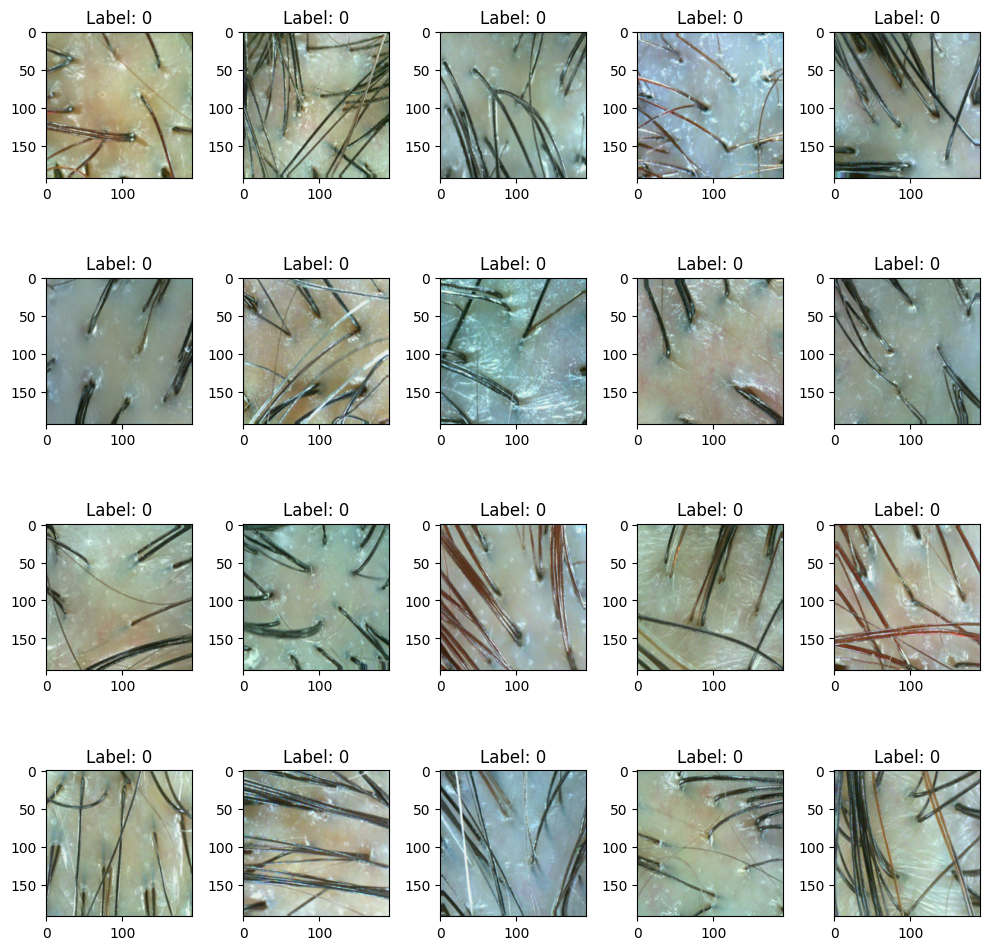

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# npz 파일 로드
data = np.load('0910_1mSebum_1.npz')

# 이미지 데이터와 라벨 데이터 추출
x = data['x']
y = data['y']

# 라벨 0의 인덱스 추출
label_0_indices = np.where(y == 0)[0]

plt.figure(figsize=(10,10))

# 라벨 0의 이미지 샘플을 시각화
for i in range(20):
    plt.subplot(4, 5, i+1)
    index = label_0_indices[i]
    image = x[index]
    label = y[index]

    plt.imshow(image.astype("uint8"))
    plt.title(f'Label: {label}')
    
plt.tight_layout()    
plt.show()

# **3. 데이터셋 구분 및 실행**

In [5]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental.preprocessing import Normalization

# npz 파일을 불러와 데이터셋 구분
def preprocessing(file, hairClass):
    global shape, x_train, y_train, x_val, y_val, x_test, y_test
    rows = 192                 # 이미지 너비
    cols = 192                 # 이미지 높이
    color = 3                  # 이미지 색공간
    shape = (rows, cols, color)
    hairClass = hairClass      # 출력 데이터 수
    
    # 사진 데이터 읽기
    # 데이터를 읽은 후 해당 파일의 x(이미지)는 x에  y(라벨 0,1,2,3)은 y에 넣는다.
    photo = np.load(file)
    x = photo['x']
    y = photo['y']
    
    # 데이터 1차원에서 3차원 배열로 변환 및 정규화
    x = x.reshape(-1, rows, cols, color)
    x = x.astype('float32') / 255
    
    # 레이블 One-Hot Encoding 변환
    y = to_categorical(y.astype('int32'), hairClass)
    
    # 전체 데이터셋 -> 학습 데이터셋과 테스트 데이터셋으로 구분
    x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                        test_size=0.1, random_state=42)
    
    # 훈련 데이터셋 -> 학습 데이터셋과 검증 데이터셋으로 구분
    # 만약 train_test_split의 test_size속성이 생략되어 있다면 해당 default값은 0.25이다.
    # 만약 train_test_split의 shuffle속성이 생략되어 있다면 해당 default값은 True이다.
    # 즉 데이터셋를 알아서 섞게 된다.
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                      test_size=0.2, random_state=42)
    
    # 데이터셋 확인
    print(x_train.shape, y_train.shape)
    print(x_val.shape, y_val.shape)
    print(x_test.shape, y_test.shape)

# 데이터셋 구분 실행
# preprocessing을 통해 
preprocessing('0910_1mSebum_1.npz', 4)

(28800, 192, 192, 3) (28800, 4)
(7200, 192, 192, 3) (7200, 4)
(4000, 192, 192, 3) (4000, 4)


# **4. ImageNet: 모델 정의**
### Xception 66부터 해제

In [6]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet101, InceptionV3, Xception, EfficientNetB2

from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, BatchNormalization, Activation
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras import regularizers

# trainable 속성을 False로 설정하면 Imagenet 모델의 사전 학습된 가중치를 사용하여 모델의 예측을 생성한다.
# trainable 속성을 True로 설정하면 fine tuning을 수행할 수 있다.

# include_top 속성을 False로 설정하면 기존 Imagenet 모델의 Fully Connected Layer를 제외하고 가져온다.
# include_top 속성을 True로 설정하면 Fully Connected Layer를 포함한 Imagenet 모델을 전부 가져온다.

# VGG16 모델
def def_VGG16(shape, hairClass):
    pre_trained_VGG16 = VGG16(weights='imagenet', include_top=False, input_shape=shape)

    # 전체 동결 해제
    pre_trained_VGG16.trainable = True
    
    # 참조해온 모델 레이어 훈련 여부 확인
    print("VGG16 모델 레이어 체크(전 레이어 동결 해제)")
    for i in pre_trained_VGG16.layers[:]:
        print(i.name, i.trainable)
    
    # 학습 범위 설정 10 ~ 끝까지
    end_layer = 10 # setting N (int) 
    print("\n학습 범위: " + str(end_layer) + " ~ 끝까지")

    # end_layer까지의 레이어는 다시 동결시킴
    for i in pre_trained_VGG16.layers[:end_layer]:
        i.trainable = False
    
    # 최종: 레이어 훈련 여부 확인
    print("\nVGG16 모델 레이어 체크(일부 레이어 동결)")
    for i in pre_trained_VGG16.layers[:]:
        print(i.name, i.trainable)
  
    model = Sequential()
    model.add(pre_trained_VGG16)

    # 레이어 추가(재정의)
    model.add(GlobalAveragePooling2D())
    model.add(Flatten())
    model.add(Dense(hairClass, activation='softmax'))
  
    # 최종 모델 요약
    print("\n")
    model.summary()

    # 모델 컴파일 
    model.compile(loss='categorical_crossentropy', 
                  optimizer=Adam(learning_rate=0.0001), 
                  metrics=['accuracy'])
  
    return model

# InceptionV3 모델
def def_InceptionV3(shape, hairClass):
    pre_trained_inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=shape)
    
    # 전체 동결 해제
    pre_trained_inceptionv3.trainable = True
    
    # 참조해온 모델 레이어 훈련 여부 확인
    print("InceptionV3 모델 레이어 체크(전 레이어 동결 해제)")
    layercount = 0
    for i in pre_trained_inceptionv3.layers[:]:
        print(layercount, ': ', i.name, ',', i.trainable)
        layercount+=1
    
    # 학습 범위 설정 250 ~ 끝까지
    end_layer = 250 # setting N (int) 
    print("\n학습 범위: " + str(end_layer) + " ~ 끝까지")

    # end_layer까지의 레이어는 다시 동결시킴
    for i in pre_trained_inceptionv3.layers[:end_layer]:
        i.trainable = False
    
    # 최종: 레이어 훈련 여부 확인
    print("\nInceptionV3 모델 레이어 체크(일부 레이어 동결)")
    layercount2 = 0
    for i in pre_trained_inceptionv3.layers[:]:
        print(layercount2, ': ', i.name, ',', i.trainable)
        layercount2+=1
    
    model = Sequential()
    model.add(pre_trained_inceptionv3)

    # 레이어 추가(재정의)
    model.add(GlobalAveragePooling2D())
    model.add(Flatten())
    model.add(Dense(hairClass, activation='softmax'))
  
    # 최종 모델 요약
    print("\n")
    model.summary()

    # 모델 컴파일
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.0001),
                  metrics=['accuracy'])
  
    return model

# Xception 모델
def def_Xception(shape, hairClass):
    pre_trained_Xception = Xception(weights='imagenet', include_top=False, input_shape=shape)
    
    # 전체 동결 해제
    pre_trained_Xception.trainable = True
    
    # 참조해온 모델 레이어 훈련 여부 확인
    print("Xception 모델 레이어 체크(전 레이어 동결 해제)")
    layercount = 0
    for i in pre_trained_Xception.layers[:]:
        print(layercount, ': ', i.name, ',', i.trainable)
        layercount+=1
    
    # 학습 범위 설정 66 ~ 끝까지
    end_layer = 66 # setting N (int) 
    print("\n학습 범위: " + str(end_layer) + " ~ 끝까지")

    # end_layer까지의 레이어는 다시 동결시킴
    for i in pre_trained_Xception.layers[:end_layer]:
        i.trainable = False
    
    # 최종: 레이어 훈련 여부 확인
    print("\nXception 모델 레이어 체크(일부 레이어 동결)")
    layercount2 = 0
    for i in pre_trained_Xception.layers[:]:
        print(layercount2, ': ', i.name, ',', i.trainable)
        layercount2+=1
    
    model = Sequential()
    model.add(pre_trained_Xception)

    # 레이어 추가(재정의)
    model.add(GlobalAveragePooling2D())
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(hairClass, activation='softmax'))
  
    # 최종 모델 요약
    print("\n")
    model.summary()

    # 모델 컴파일
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.0001),
                  metrics=['accuracy'])
  
    return model

# EfficientNetB2 모델
def def_EfficientNetB2(shape, hairClass):
    pre_trained_EfficientNetB2 = EfficientNetB2(weights='imagenet', include_top=False, input_shape=shape)
    pre_trained_EfficientNetB2.trainable = False
    model = Sequential()
    model.add(pre_trained_EfficientNetB2)

    # 레이어 추가(재정의)
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(0.3))
    model.add(Dense(hairClass, activation='softmax'))

    # 모델 요약 
    model.summary() 

    # 모델 컴파일
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=1e-5),
                  metrics=['accuracy'])
  
    return model

### **4-1. 모델 학습, 저장 정의**

In [7]:
import tensorflow as tf
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

def model_train(x_train, y_train, x_val, y_val, modelFunc, modelName):
    # 모델 생성
    # shape는 데이터셋 구분시 초기화된 변수이다. -> (256, 256, 3)
    model = modelFunc(shape, 4)

    # 모델이 저장될 경로 체크
    model_dir = './model'

    if not os.path.exists(model_dir): # 해당 위치에 경로(폴더)가 없으면
        os.mkdir(model_dir) # 변수명 model_dir로 생성시킴

    # 폴더 경로 변경
    os.chdir('C:/jupyter/capston/bald/sebum/model')

    # 콜백 함수 설정
    # ModelCheckpoint란 모델을 저장할 때 사용하는 콜백 함수이다.
    # filepath -> 모델 저장 경로
    # monitor -> 모델 저장 시 기준이 되는 값으로 해당 코드에서는 val_loss을 저장하게 된다
    # verbose -> 1=저장되었다는 코맨트 0=코맨트 없음
    # save_besr_only -> monitor되는 값을 기준으로 가장 좋은 값을 저장한다.
    checkpoint = ModelCheckpoint(f'0910_1mSebum_{modelName}_1.h5', monitor='val_loss', verbose=1, save_best_only=True)

    # EarlyStopping이란 특정 시점에서 훈련을 멈추는 콜백 함수이다.
    # monitor -> 모니터링할 값
    # mode -> 관찰항목에 대해 개선이 없다고 판단하기 위한 기준을 설정한다. 
    # monitor에서 설정한 항목이 val_loss 이면 값이 감소되지 않을 때 종료하여야 하므로 min을 설정한다. 입력하지 않으면 auto로 설정해 알아서 판단해준다.
    # patience -> 20번 이상 변동 없으면 중지시킨다. -> 일단 다 출력해본다.
    early_stopping = EarlyStopping(monitor='val_loss', patience=20)

    # 모델 훈련
    with tf.device("/device:GPU:0"):
        history = model.fit(x_train, y_train,
                            batch_size=16, 
                            epochs=30,
                            verbose=1,
                            validation_data=(x_val, y_val))
        
  
    # 모델 저장
    model.save(f'0910_1mSebum_{modelName}_1.h5')

    return model, history

### **모델 생성 및 훈련**

### Xception 모델 체크

In [8]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet101, InceptionV3, Xception, EfficientNetB2

pre_trained_Xception = Xception(weights='imagenet', include_top=False, input_shape=shape)

layers = pre_trained_Xception.layers

# 레이어 수 세기
num_layers = len(layers)
print("Number of layers in Xception:", num_layers)
print("\n")

pre_trained_Xception.summary()

Number of layers in Xception: 132


Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 192, 192, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 95, 95, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 95, 95, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 95, 95, 32)   0           block1_conv1_bn[0][0]            
_______________________________________________________

### **Xception 모델 생성 및 훈련**

In [9]:
import os
model_Xception, history_Xception = model_train(x_train, y_train, x_val, y_val, def_Xception, 'Xception')

Xception 모델 레이어 체크(전 레이어 동결 해제)
0 :  input_2 , True
1 :  block1_conv1 , True
2 :  block1_conv1_bn , True
3 :  block1_conv1_act , True
4 :  block1_conv2 , True
5 :  block1_conv2_bn , True
6 :  block1_conv2_act , True
7 :  block2_sepconv1 , True
8 :  block2_sepconv1_bn , True
9 :  block2_sepconv2_act , True
10 :  block2_sepconv2 , True
11 :  block2_sepconv2_bn , True
12 :  conv2d_4 , True
13 :  block2_pool , True
14 :  batch_normalization_4 , True
15 :  add_12 , True
16 :  block3_sepconv1_act , True
17 :  block3_sepconv1 , True
18 :  block3_sepconv1_bn , True
19 :  block3_sepconv2_act , True
20 :  block3_sepconv2 , True
21 :  block3_sepconv2_bn , True
22 :  conv2d_5 , True
23 :  block3_pool , True
24 :  batch_normalization_5 , True
25 :  add_13 , True
26 :  block4_sepconv1_act , True
27 :  block4_sepconv1 , True
28 :  block4_sepconv1_bn , True
29 :  block4_sepconv2_act , True
30 :  block4_sepconv2 , True
31 :  block4_sepconv2_bn , True
32 :  conv2d_6 , True
33 :  block4_pool , True
34 : 

Epoch 1/30
1800/1800 [==============================] - 222s 119ms/step - loss: 0.7910 - accuracy: 0.6633 - val_loss: 0.5501 - val_accuracy: 0.7676
Epoch 2/30
1800/1800 [==============================] - 216s 120ms/step - loss: 0.3607 - accuracy: 0.8596 - val_loss: 0.4494 - val_accuracy: 0.8325
Epoch 3/30
1800/1800 [==============================] - 216s 120ms/step - loss: 0.1591 - accuracy: 0.9407 - val_loss: 0.5069 - val_accuracy: 0.8462
Epoch 4/30
1800/1800 [==============================] - 216s 120ms/step - loss: 0.1082 - accuracy: 0.9618 - val_loss: 0.4460 - val_accuracy: 0.8681
Epoch 5/30
1800/1800 [==============================] - 216s 120ms/step - loss: 0.0864 - accuracy: 0.9700 - val_loss: 0.5071 - val_accuracy: 0.8546
Epoch 6/30
1800/1800 [==============================] - 217s 120ms/step - loss: 0.0723 - accuracy: 0.9741 - val_loss: 0.4926 - val_accuracy: 0.8656
Epoch 7/30
1800/1800 [==============================] - 218s 121ms/step - loss: 0.0644 - accuracy: 0.9781 - val_

C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


### **4-2. history 확인**

In [10]:
# 나머지 모델 또한 동일함

print(history_Xception.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### **5. 그래프 정의**

In [11]:
import matplotlib.pyplot as plt

def model_plot(history, modelName):
    # loss
    y_loss = history.history['loss']
    y_vloss = history.history['val_loss']
  
    x_len = range(1,len(y_loss) + 1)

    fig = plt.figure(figsize=(10, 4))
    ax = fig.add_subplot(1, 2, 1)

    ax.plot(x_len, y_loss, marker='.', c='blue', label='train_set_loss')
    ax.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title(modelName + ': train&val loss')
    ax.legend()

    # accuracy
    y_acc = history.history['accuracy']
    y_vacc = history.history['val_accuracy']
  
    x_len = range(1, len(y_acc) + 1)
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(x_len, y_acc, marker='.', c='blue', label='train_set_acc')
    ax.plot(x_len, y_vacc, marker='.', c='red', label='val_set_acc')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title(modelName + ': train&val accuracy')
    ax.legend()

    plt.tight_layout()
    plt.show()

### **5-1. 그래프 출력**

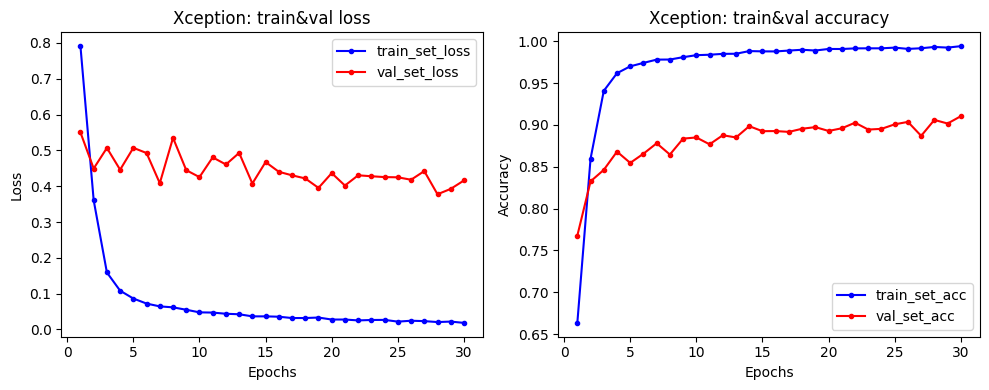

In [12]:
model_plot(history_Xception, 'Xception')

### **6. 혼돈행렬 정의**

In [13]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# history와 model을 이용한 방법
def confusionMatrix_model(model, modelName, x_test, y_test):
    # 모델을 이용해 테스트 데이터셋에 대한 예측 수행
    y_pred = model.predict(x_test)

    # softmax 확률 출력을 가장 높은 확률을 가진 클래스로 변환
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Labeling
    label = ['normal', 'mild', 'moderate', 'severe']
    
    # 혼동 행렬 생성
    cm = confusion_matrix(y_true, y_pred_classes)

    # 혼동 행렬 시각화
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label, yticklabels=label)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(modelName + ' confusionMatrix')
    plt.show()

    # 분류 보고서 출력
    print(classification_report(y_true, y_pred_classes))

    
# 생성된 .h5 파일을 이용하여 생성
def confusionMatrix_h5(model_path, modelName, x_test, y_test):
    
    # 모델 로드
    model = load_model(model_path)

    # 테스트 데이터셋에 대한 예측 수행
    y_pred = model.predict(x_test)

    # 예측 결과를 가장 높은 확률을 가진 클래스로 변환
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # 혼동 행렬 생성
    cm = confusion_matrix(y_true, y_pred_classes)

    # 혼동 행렬 시각화
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(modelName + ' confusionMatrix')
    plt.show()

### **6-1. 혼돈행렬 출력**

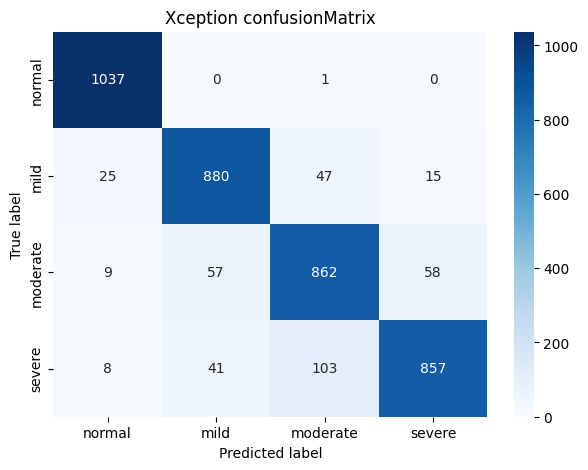

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1038
           1       0.90      0.91      0.90       967
           2       0.85      0.87      0.86       986
           3       0.92      0.85      0.88      1009

    accuracy                           0.91      4000
   macro avg       0.91      0.91      0.91      4000
weighted avg       0.91      0.91      0.91      4000



In [14]:
with tf.device("/device:CPU:0"):
    confusionMatrix_model(model_Xception, 'Xception', x_test, y_test)

# **7. 모델 evaluate 정의**

In [15]:
def model_evaluate(model, x_test, y_test):
    test_result = model.evaluate(x_test, y_test, verbose=1)
    print("acc: ", test_result[1], 'loss: ', test_result[0])

    return test_result[1], test_result[0]

# **7-1. 모델 evaluate 출력**

In [16]:
with tf.device("/device:CPU:0"):
    accuracy_Xception, loss_Xception = model_evaluate(model_Xception, x_test, y_test)

125/125 [==============================] - 99s 789ms/step - loss: 0.4338 - accuracy: 0.9090
acc:  0.9089999794960022 loss:  0.4338145852088928
